In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import seaborn as sns
import plotly.express as px

%matplotlib inline

In [ ]:
# Set DPI for fugures

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [ ]:
plt.rcParams['font.size'] = 20

In [ ]:
# Drive connection

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing Dataset
train = pd.read_csv('/content/drive/Shareddrives/Best Shared Drive Ever/EEG/DEAP-Dataset/EEG-Final/Data/train_df.csv')
test = pd.read_csv('/content/drive/Shareddrives/Best Shared Drive Ever/EEG/DEAP-Dataset/EEG-Final/Data/test_df.csv')

In [ ]:
# Rename the column 'Dominance' to 'Dominancencoded_e'
train.rename(columns={'Domain': 'Dominance'}, inplace=True)
test.rename(columns={'Domain': 'Dominance'}, inplace=True)

In [ ]:
# Rename the column 'Liking' to 'Liking'
train.rename(columns={'Like': 'Liking'}, inplace=True)
test.rename(columns={'Like': 'Liking'}, inplace=True)

### Two class

In [ ]:
# Copy the original dataset
encoded_train = train.copy()

# List of columns to modify
# columns_to_modify = ['Valence', 'Arousal', 'Dominance', 'Liking']
columns_to_modify = ['Valence']

# Apply the transformation: 1-4.99 becomes 0, everything else becomes 1
encoded_train[columns_to_modify] = encoded_train[columns_to_modify].applymap(
    lambda x: 0 if 1 <= x <= 4.99 else 1
)

<ipython-input-8-71f80eed8014>:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  encoded_train[columns_to_modify] = encoded_train[columns_to_modify].applymap(


In [ ]:
# Replace 9 with 8.99 in specified columns
columns_to_update = ['Arousal', 'Dominance', 'Liking']
encoded_train[columns_to_update] = encoded_train[columns_to_update].replace(9, 8.99)

In [ ]:
# Copy
encoded_test = test.copy()

# List of columns to modify
#columns_to_modify = ['Valence', 'Arousal', 'Dominance', 'Liking']
columns_to_modify = ['Valence']

# Apply the transformation: 1-4.99 becomes 0, 5-9 becomes 1
encoded_test[columns_to_modify] = encoded_test[columns_to_modify].applymap(
    lambda x: 0 if 1 <= x <= 4.99 else 1
)

<ipython-input-10-874960b9dd8c>:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  encoded_test[columns_to_modify] = encoded_test[columns_to_modify].applymap(


In [ ]:
# Replace 9 with 8.99 in specified columns
columns_to_update = ['Arousal', 'Dominance', 'Liking']
encoded_test[columns_to_update] = encoded_test[columns_to_update].replace(9, 8.99)

## Train-Test Split

### Valence

In [ ]:
# Labeling
X_train = encoded_train.drop(['Valence', 'Arousal', 'Dominance', 'Liking'], axis=1) # Input features
Y_train = encoded_train['Valence'] # Target label

x_test = encoded_test.drop(['Valence', 'Arousal', 'Dominance', 'Liking'], axis=1) # Input features
y_test = encoded_test['Valence'] # Target label

## Machine Learning Algorithms

In [ ]:
# Fit the train and test data with StandarScaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
x_test = scaler.fit_transform(x_test)

## KNN

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.89     67832
           1       0.91      0.92      0.91     88328

    accuracy                           0.90    156160
   macro avg       0.90      0.90      0.90    156160
weighted avg       0.90      0.90      0.90    156160

Confusion Matrix:
[[59580  8252]
 [ 7190 81138]]


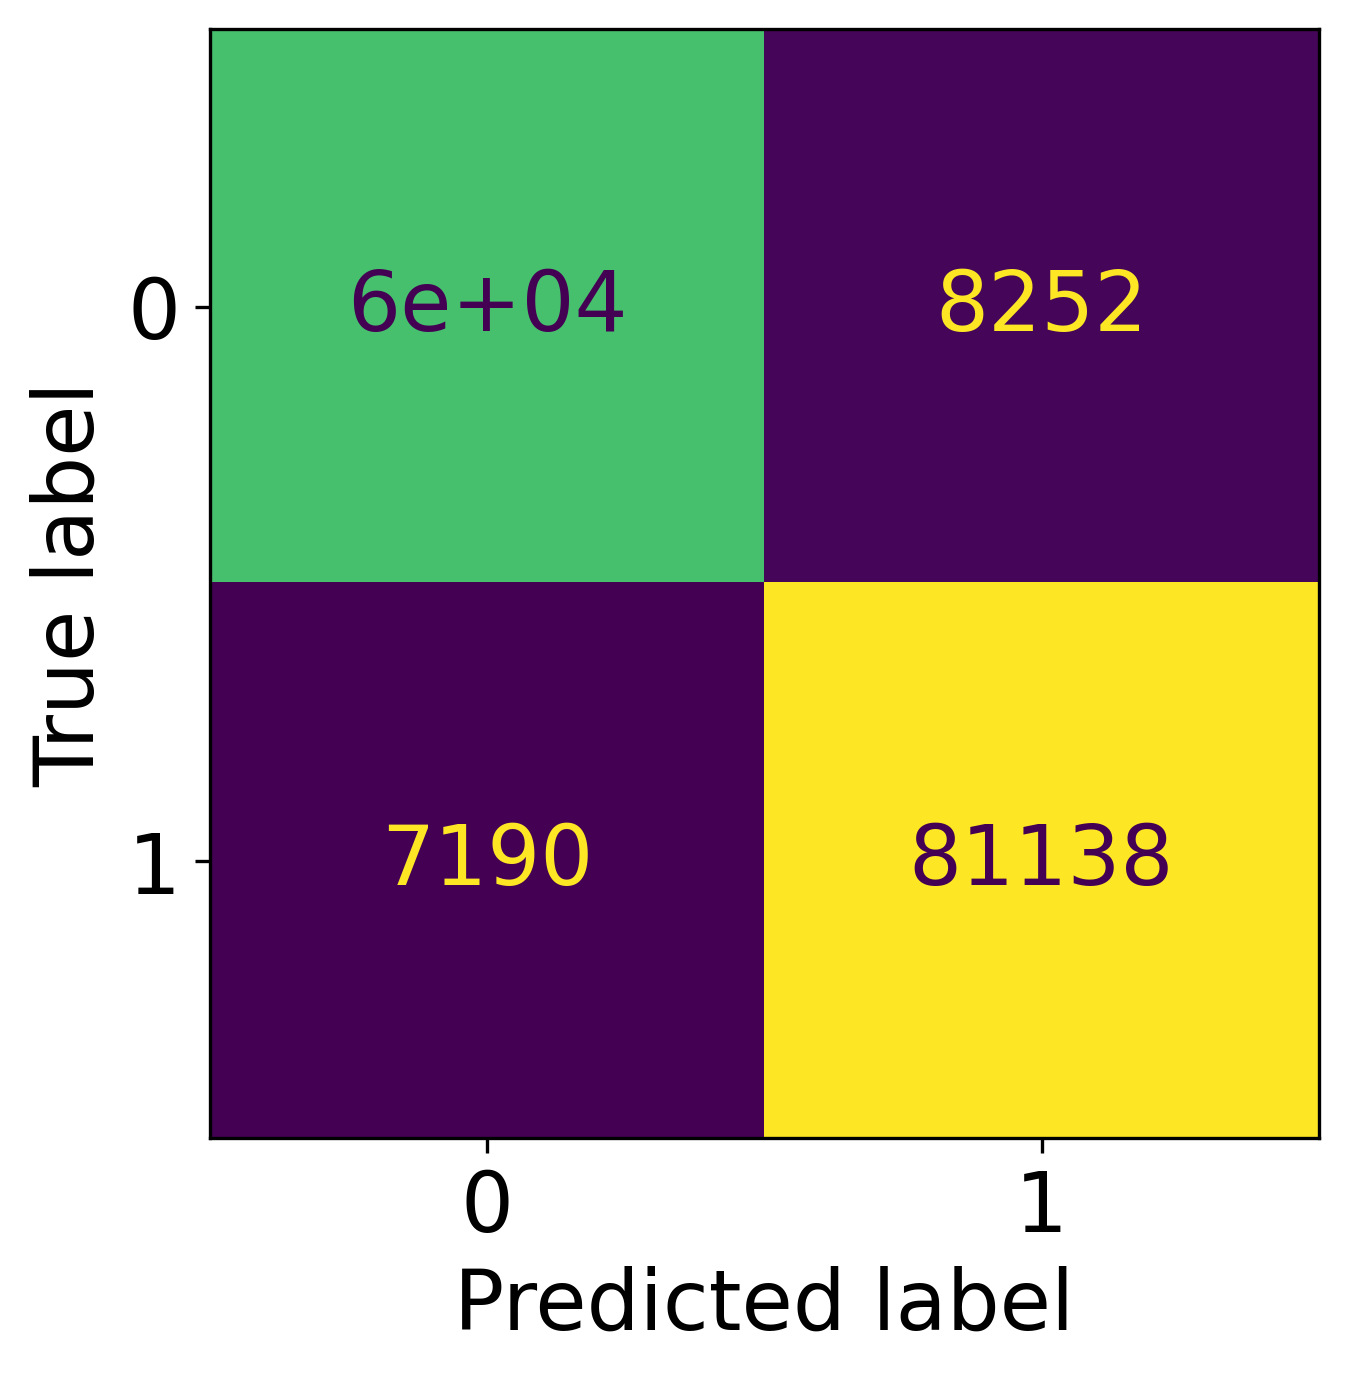

Test Accuracy: 0.90
Normalized Confusion Matrix:
[[0.8783465  0.1216535 ]
 [0.08140114 0.91859886]]


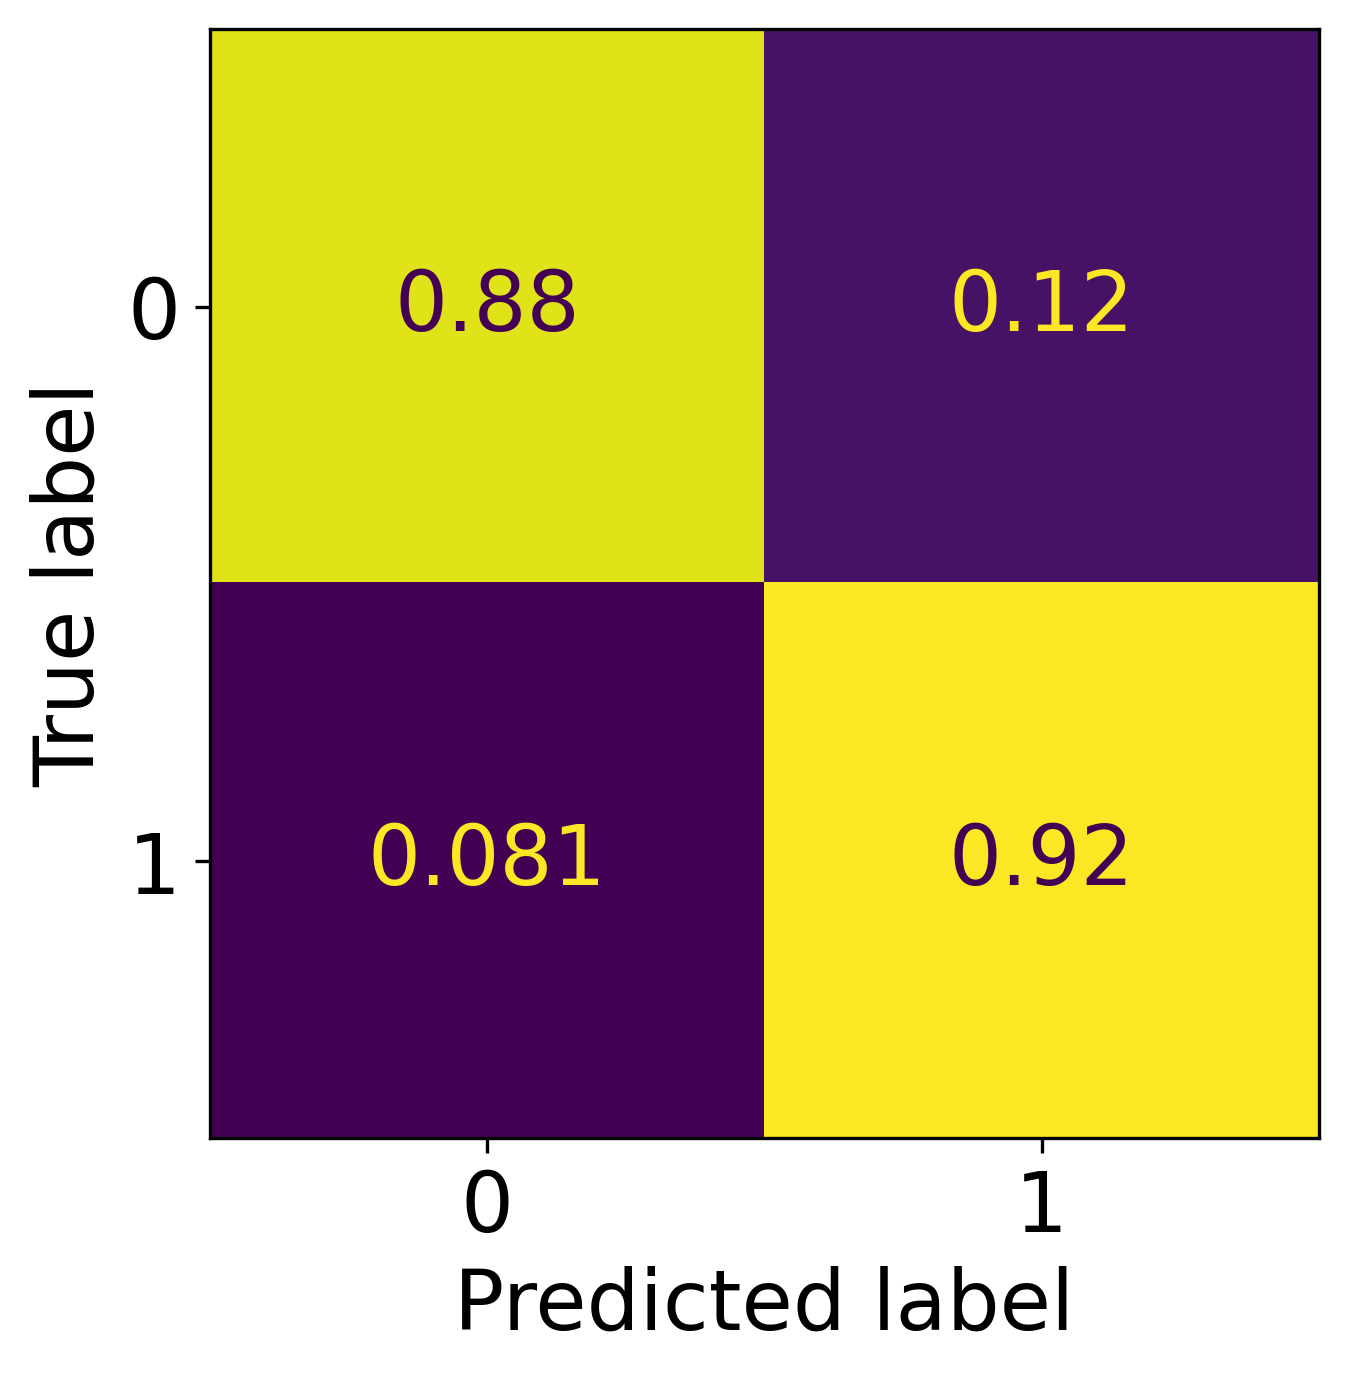

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

# Applying KNN Classifier
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, Y_train)

# Predictions
y_pred = knn.predict(x_test)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plotting confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap='viridis', colorbar=False)
plt.show()

# Test accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Normalized confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print("Normalized Confusion Matrix:")
print(cm_normalized)

# Plotting normalized confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=knn.classes_)
disp.plot(cmap='viridis', colorbar=False)
plt.show()

In [ ]:
import joblib

# Save the model
model_filename = "/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/Model/Other/KNN.pkl"
joblib.dump(knn, model_filename)

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/Model/Other/KNN.pkl']

In [ ]:
# Load the model
model_filename = "/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/Model/Other/KNN.pkl"
KNN = joblib.load(model_filename)

## LR

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.46      0.52     67832
           1       0.65      0.78      0.71     88328

    accuracy                           0.64    156160
   macro avg       0.63      0.62      0.62    156160
weighted avg       0.64      0.64      0.63    156160

Confusion Matrix:
[[30965 36867]
 [19201 69127]]


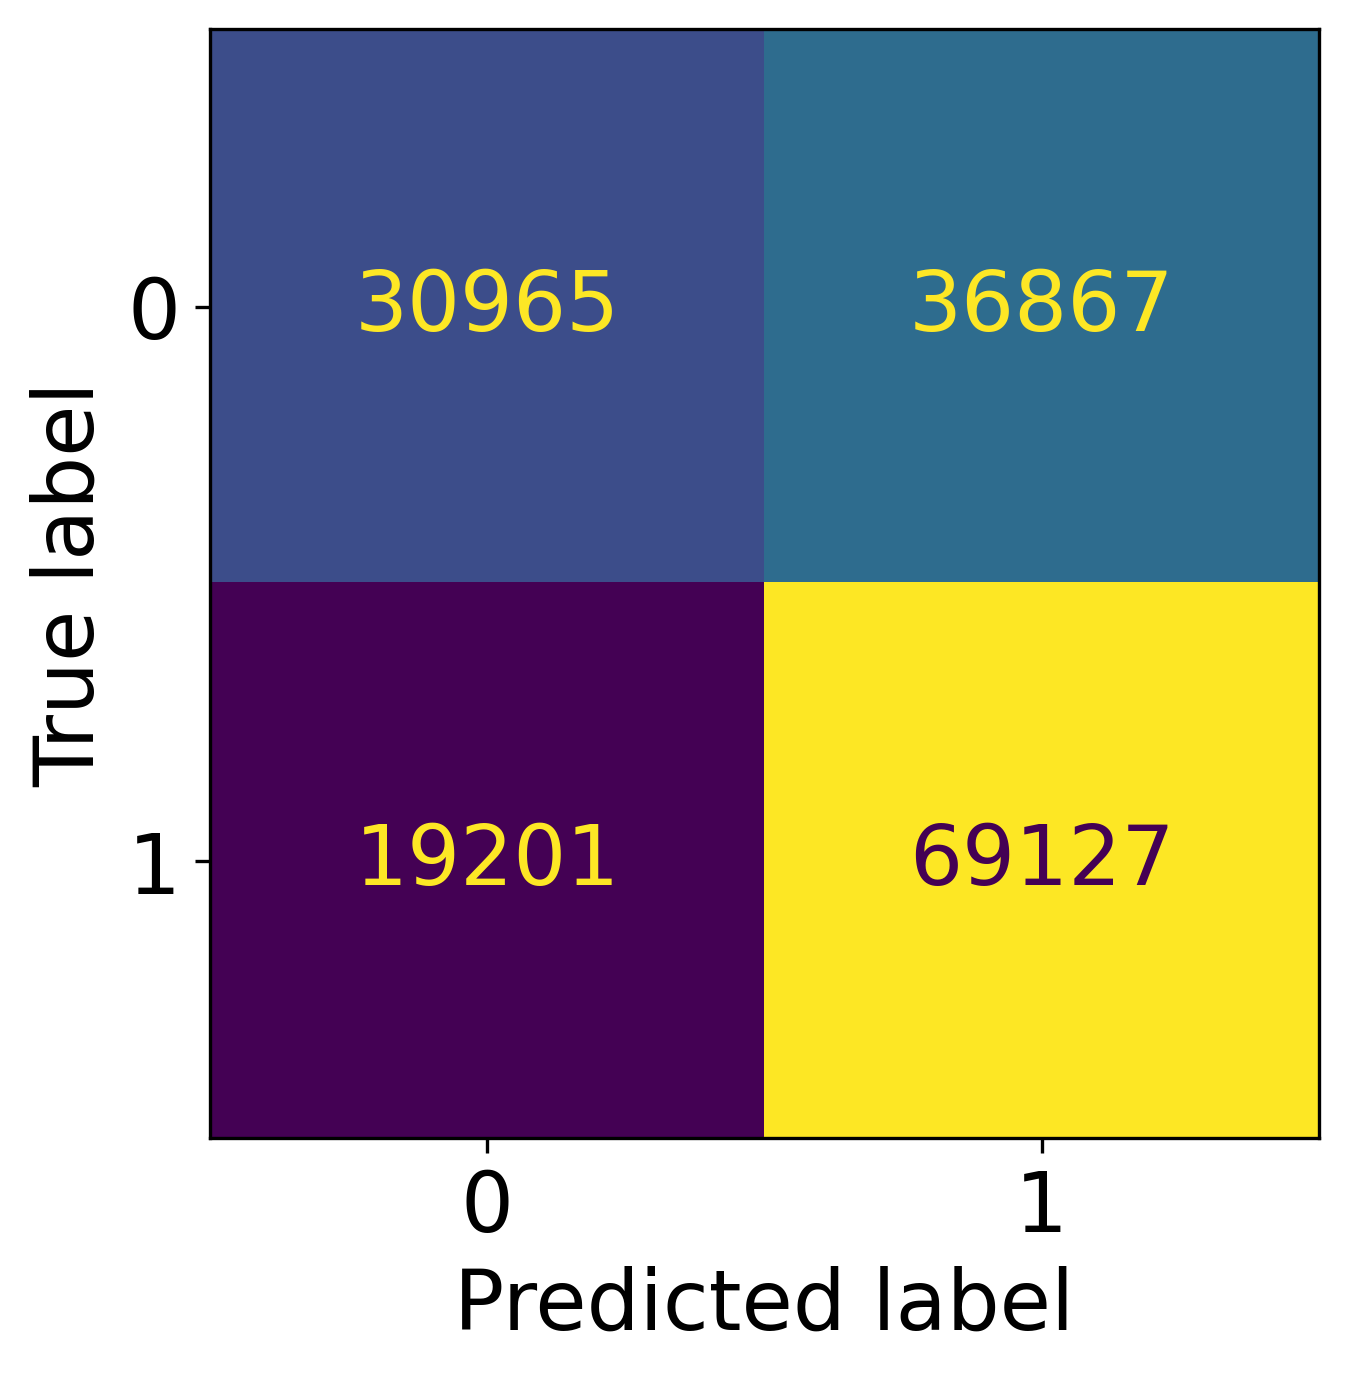

Test Accuracy: 0.64
Normalized Confusion Matrix:
[[0.45649546 0.54350454]
 [0.21738294 0.78261706]]


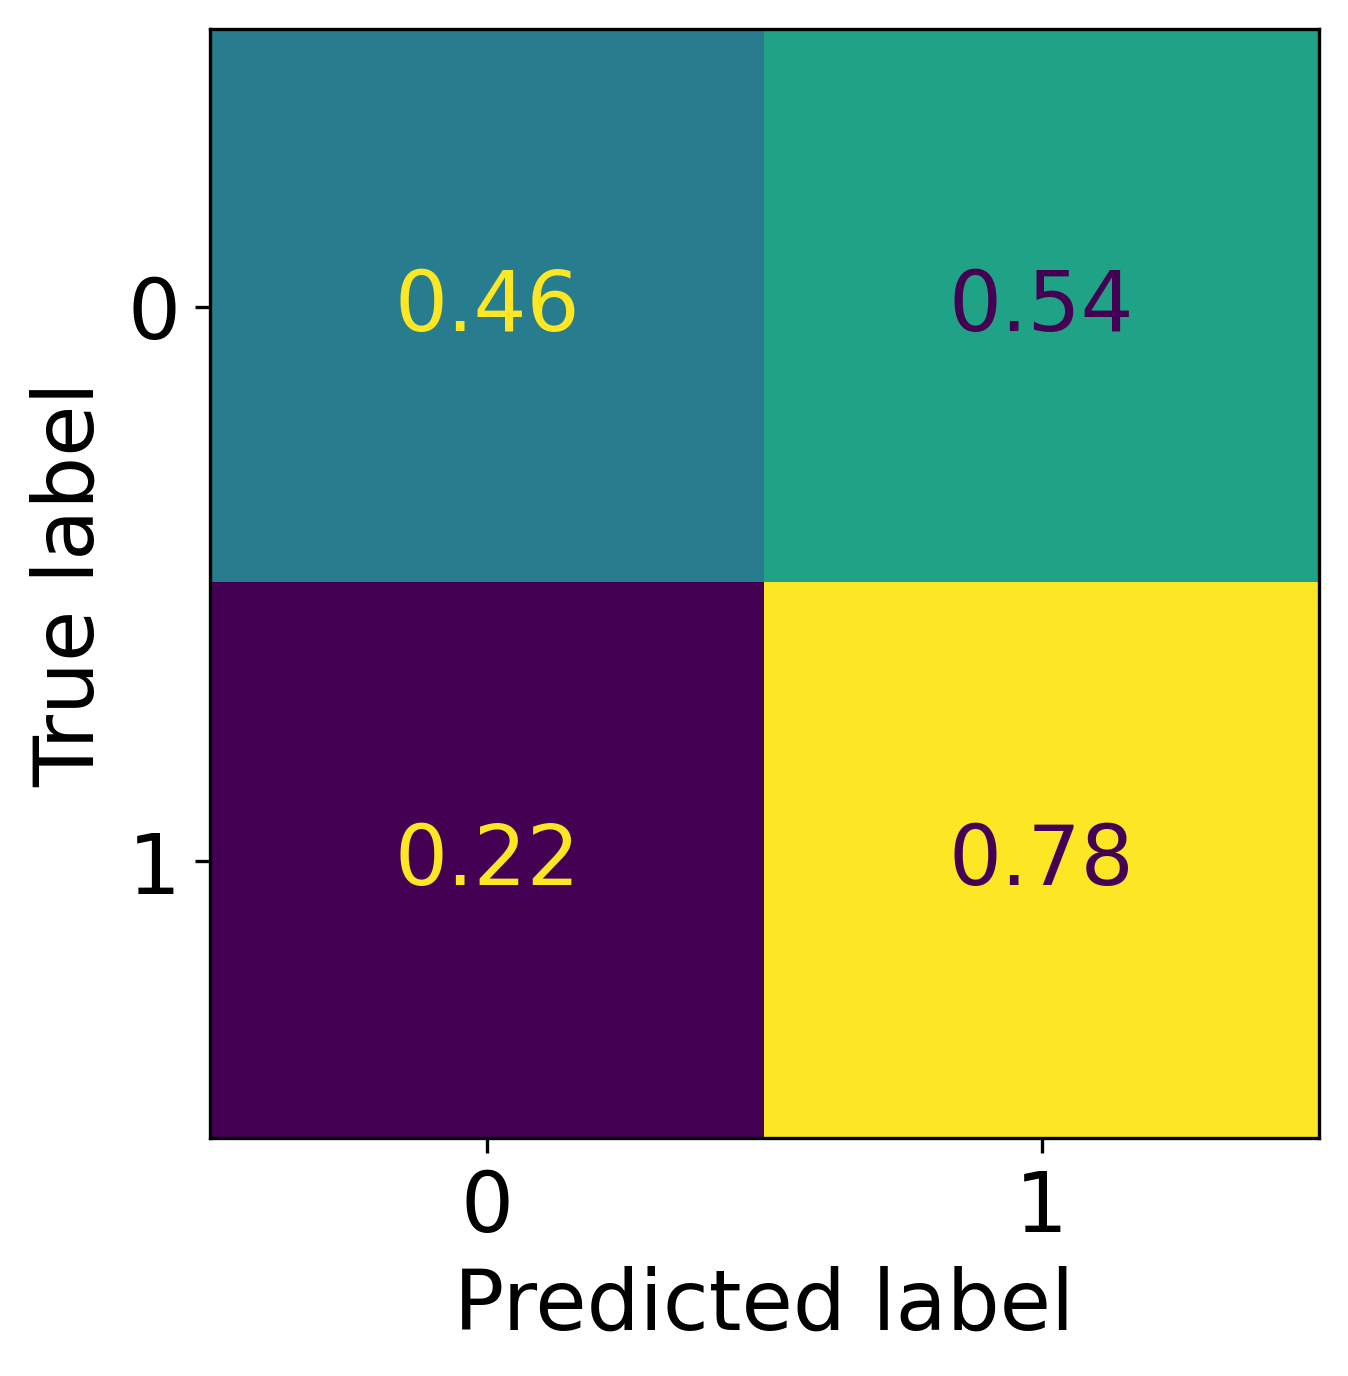

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

# Applying Logistic Regression
lr = LogisticRegression(max_iter=1000)  # Increase max_iter if needed for convergence
lr.fit(X_train, Y_train)

# Predictions
y_pred = lr.predict(x_test)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plotting confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot(cmap='viridis', colorbar=False)
plt.show()

# Test accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Normalized confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print("Normalized Confusion Matrix:")
print(cm_normalized)

# Plotting normalized confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=lr.classes_)
disp.plot(cmap='viridis', colorbar=False)
plt.show()

In [ ]:
import joblib

# Save the model
model_filename = "/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/Model/Other/LR.pkl"
joblib.dump(lr, model_filename)

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/Model/Other/LR.pkl']

In [ ]:
# Load the model
model_filename = "/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/Model/Other/LR.pkl"
LR = joblib.load(model_filename)

## DT

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.78      0.78     67832
           1       0.83      0.83      0.83     88328

    accuracy                           0.81    156160
   macro avg       0.80      0.80      0.80    156160
weighted avg       0.81      0.81      0.81    156160

Confusion Matrix:
[[52631 15201]
 [15030 73298]]


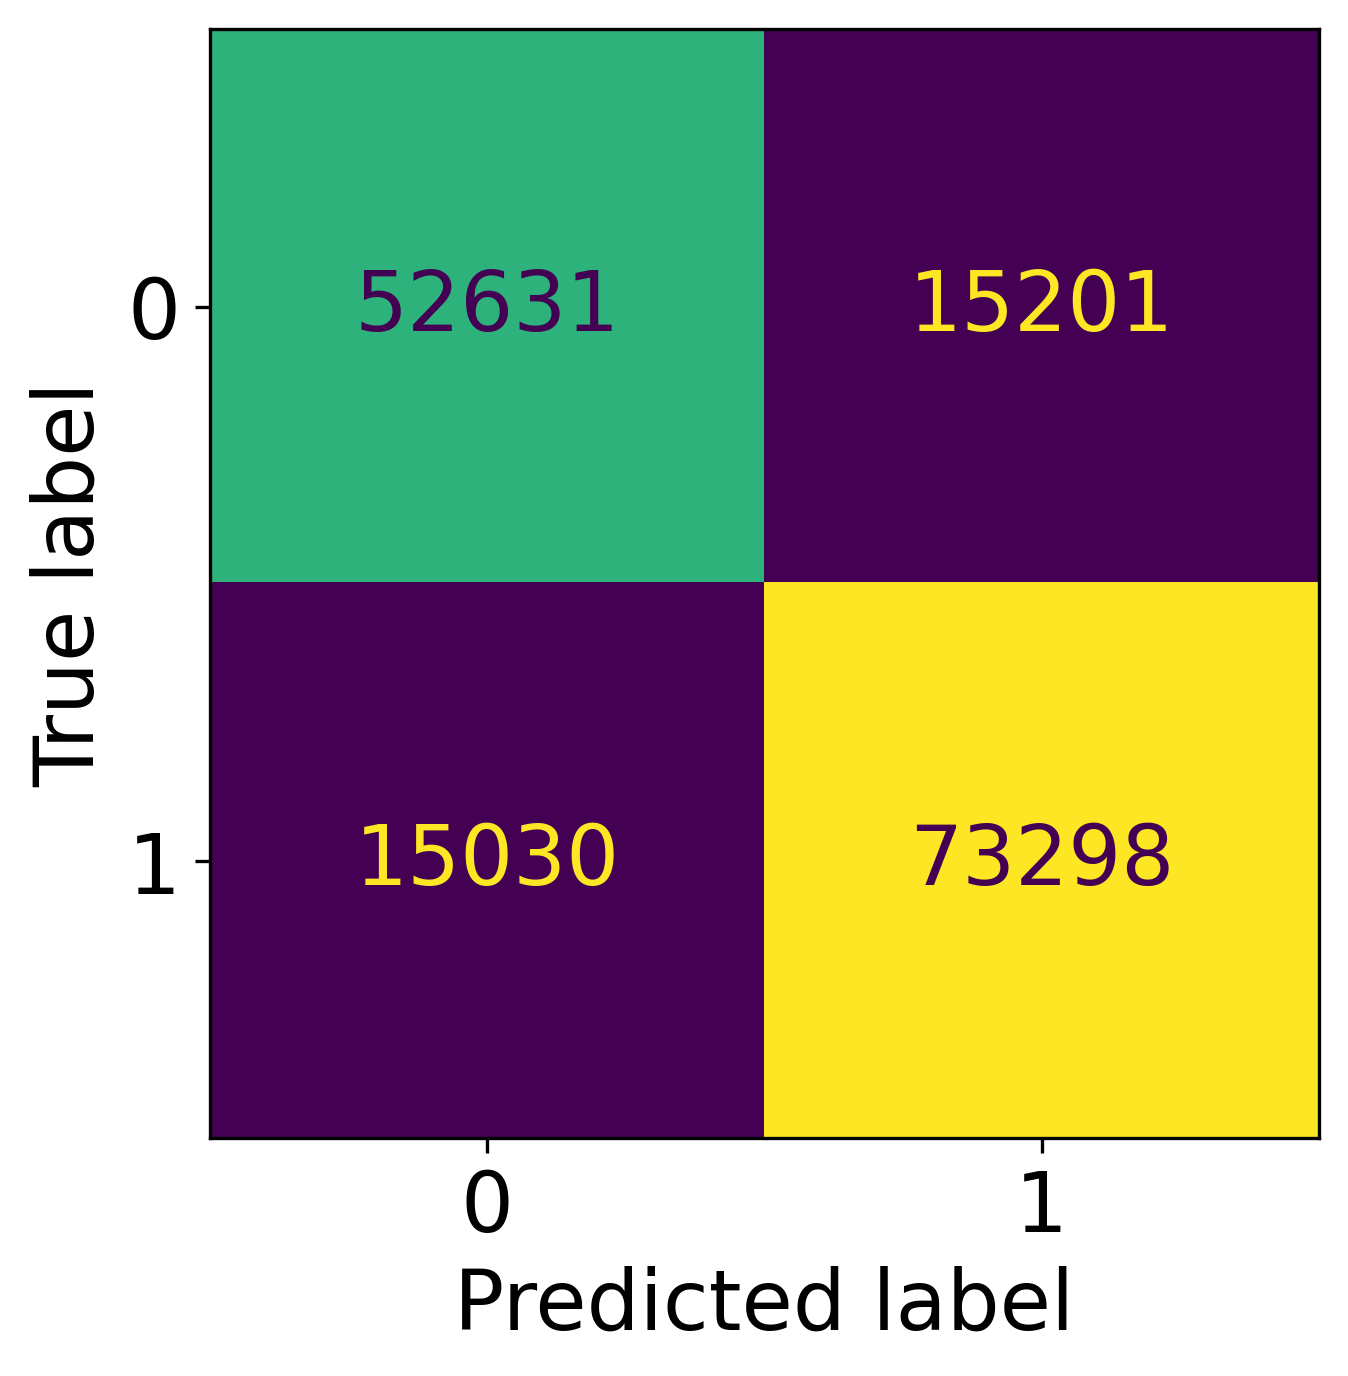

Test Accuracy: 0.81
Normalized Confusion Matrix:
[[0.77590223 0.22409777]
 [0.17016122 0.82983878]]


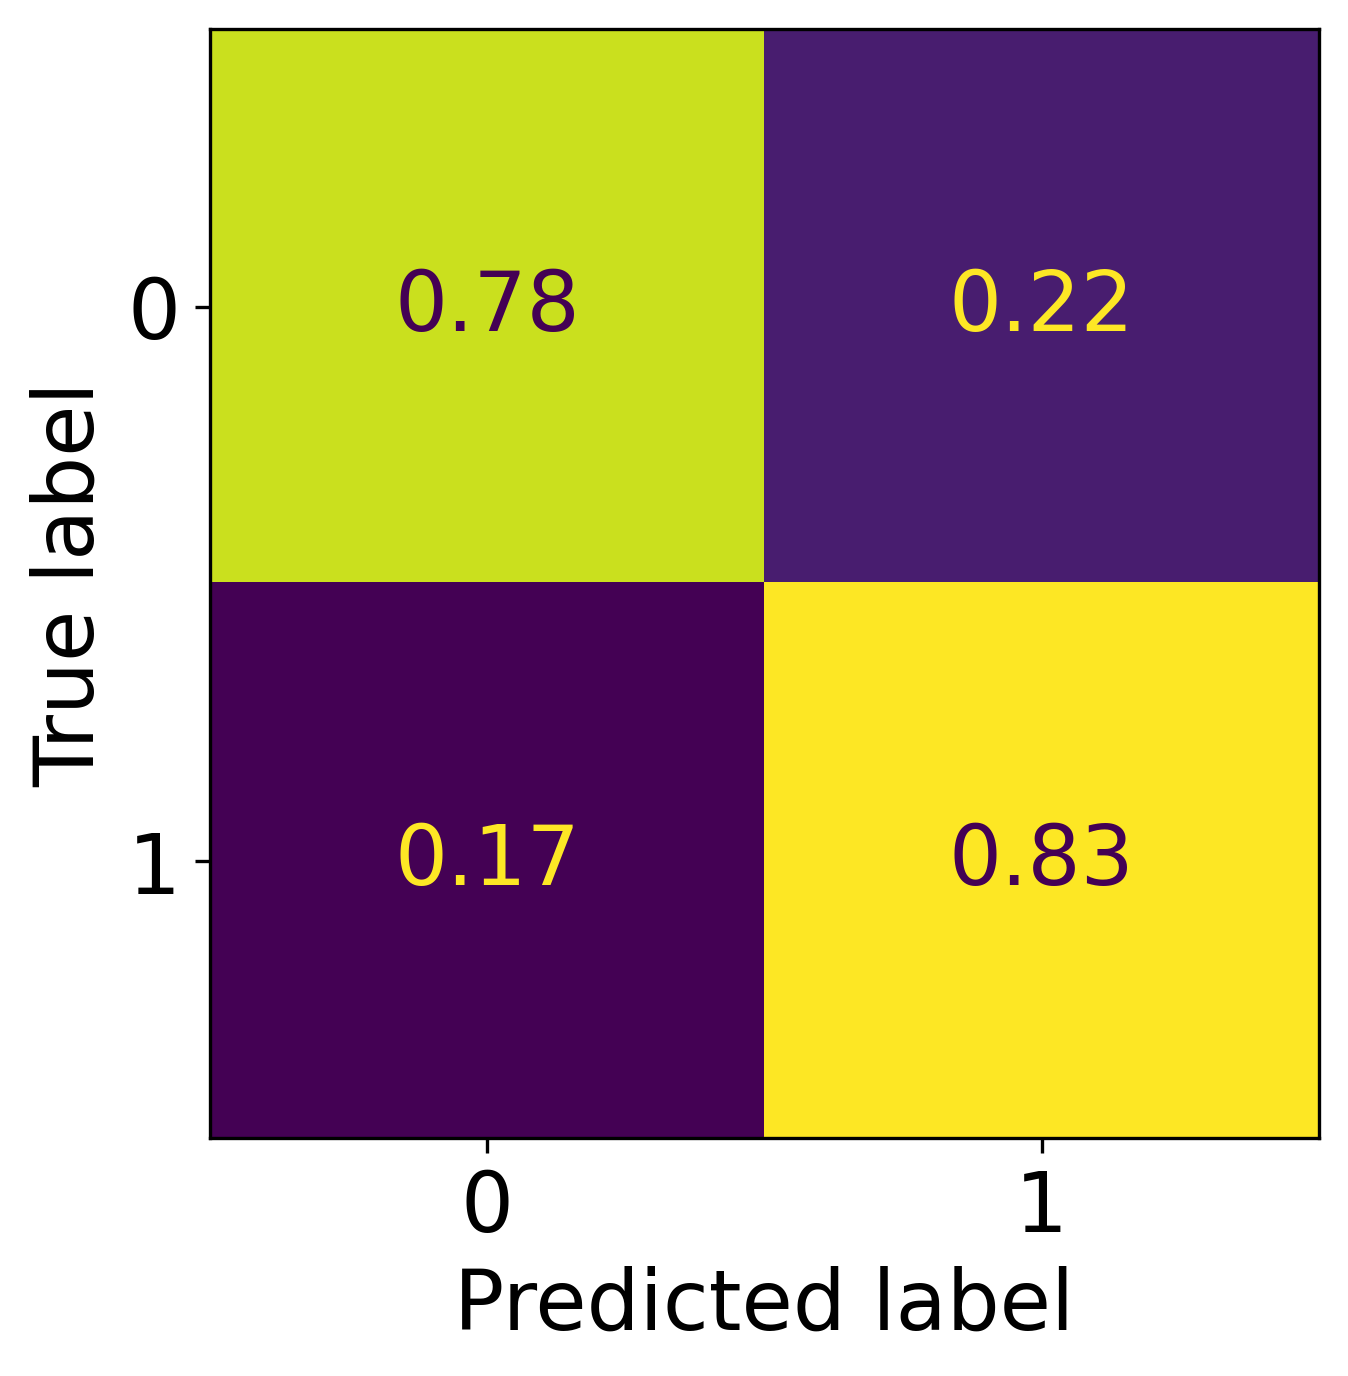

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

# Applying Decision Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)

# Predictions
y_pred = dt.predict(x_test)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plotting confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
disp.plot(cmap='viridis', colorbar=False)
plt.show()

# Test accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Normalized confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print("Normalized Confusion Matrix:")
print(cm_normalized)

# Plotting normalized confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=dt.classes_)
disp.plot(cmap='viridis', colorbar=False)
plt.show()

In [ ]:
# Save the model
model_filename = "/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/Model/Other/DT.pkl"
joblib.dump(dt, model_filename)

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/Model/Other/DT.pkl']

In [ ]:
import joblib

# Load the model
model_filename = "/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/Model/Other/DT.pkl"
DT = joblib.load(model_filename)

# GBM

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.50      0.58     67832
           1       0.68      0.83      0.75     88328

    accuracy                           0.68    156160
   macro avg       0.69      0.66      0.66    156160
weighted avg       0.69      0.68      0.67    156160

Confusion Matrix:
[[34017 33815]
 [15448 72880]]


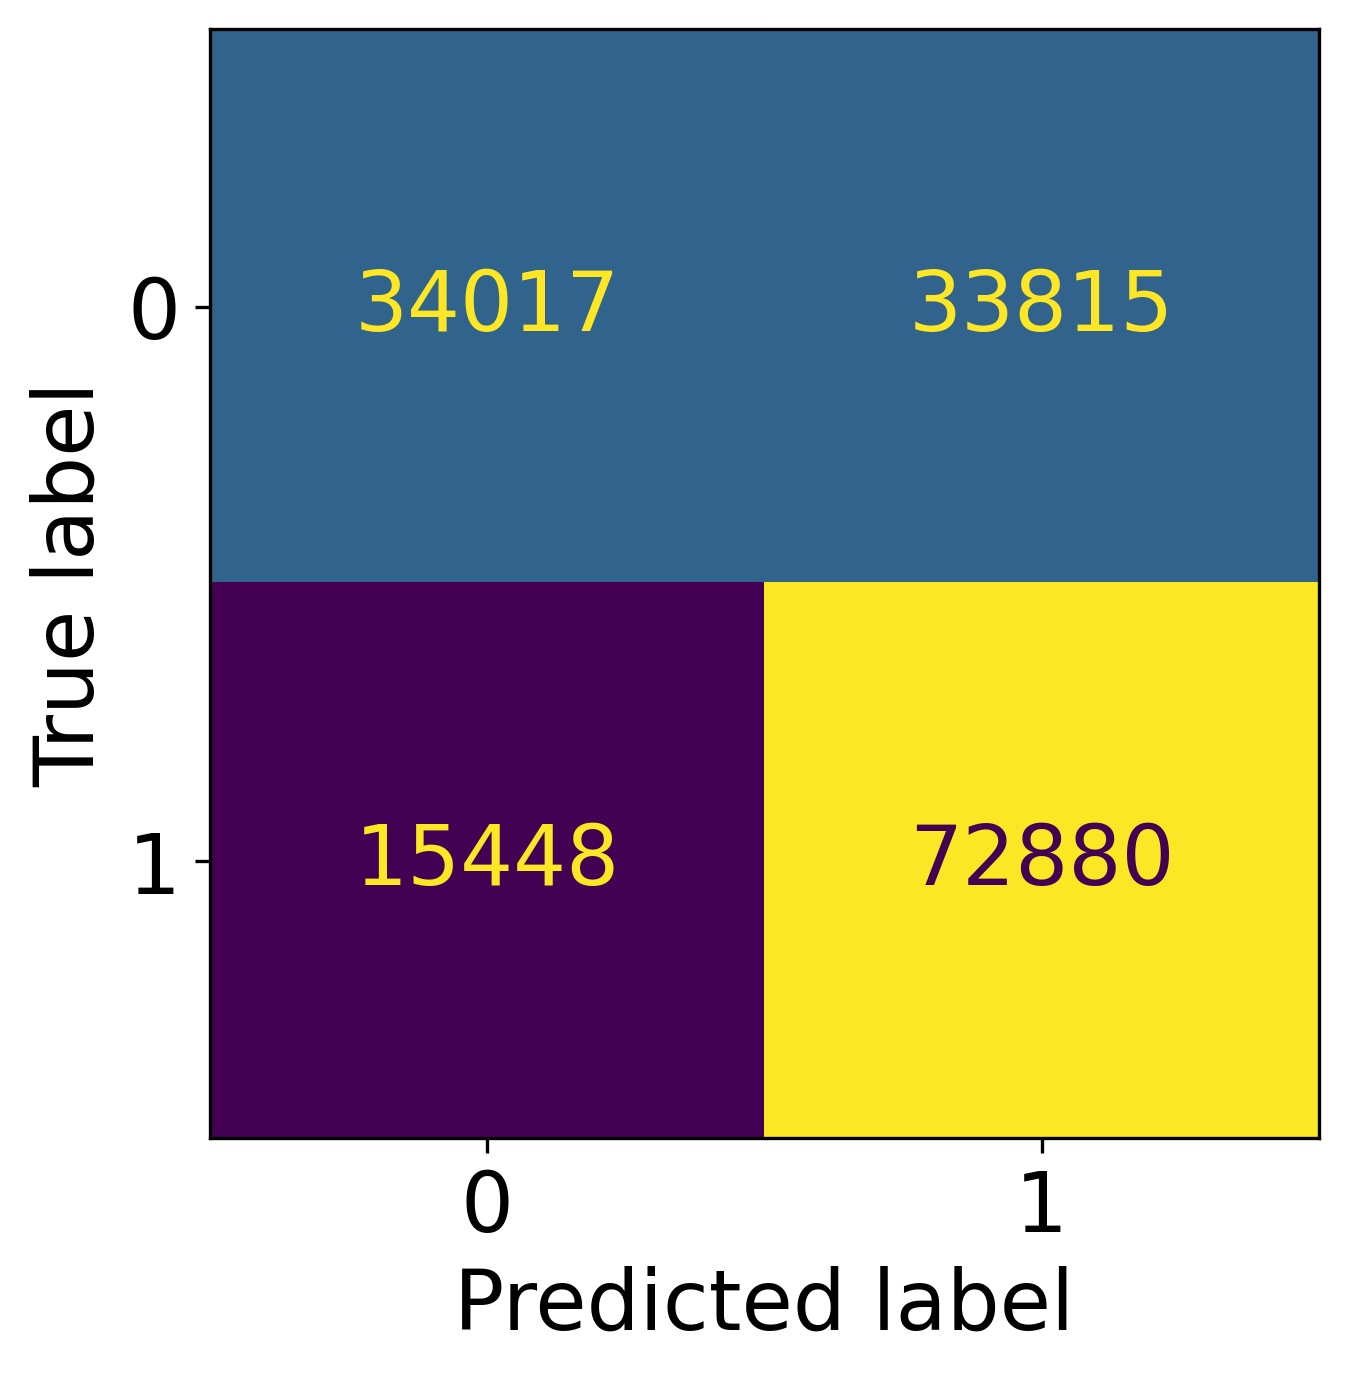

Test Accuracy: 0.68
Normalized Confusion Matrix:
[[0.50148897 0.49851103]
 [0.17489358 0.82510642]]


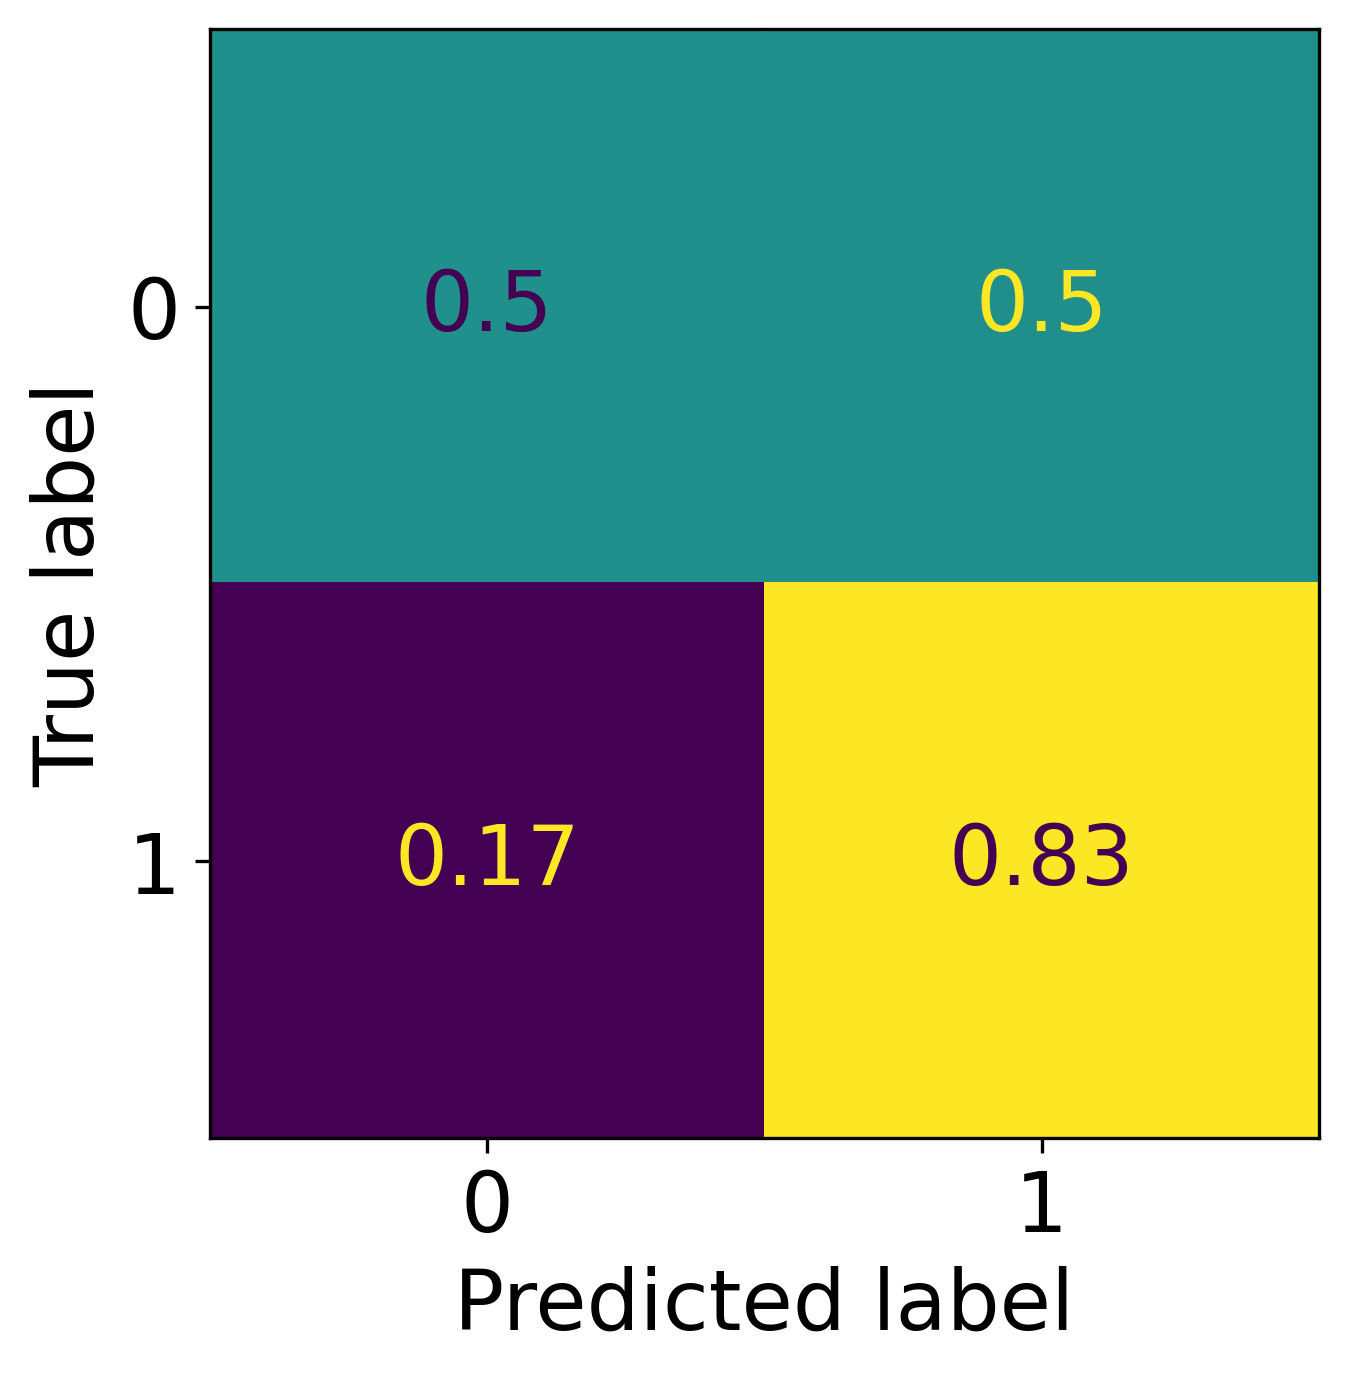

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

# Applying Gradient Boosting Classifier
gbm = GradientBoostingClassifier()
gbm.fit(X_train, Y_train)

# Predictions
y_pred = gbm.predict(x_test)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plotting confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gbm.classes_)
disp.plot(cmap='viridis', colorbar=False)
plt.show()

# Test accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Normalized confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print("Normalized Confusion Matrix:")
print(cm_normalized)

# Plotting normalized confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=gbm.classes_)
disp.plot(cmap='viridis', colorbar=False)
plt.show()

In [ ]:
import joblib

# Save the model
model_filename = "/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/Model/Other/GBM.pkl"
joblib.dump(gbm, model_filename)

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/Model/Other/GBM.pkl']

In [ ]:
# Load the model
model_filename = "/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/Model/Other/GBM.pkl"
GBM = joblib.load(model_filename)

## CATBoost

In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 22.7 MB/s eta 0:00:00


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.70      0.77     67832
           1       0.80      0.90      0.85     88328

    accuracy                           0.81    156160
   macro avg       0.82      0.80      0.81    156160
weighted avg       0.82      0.81      0.81    156160

Confusion Matrix:
[[47542 20290]
 [ 8822 79506]]


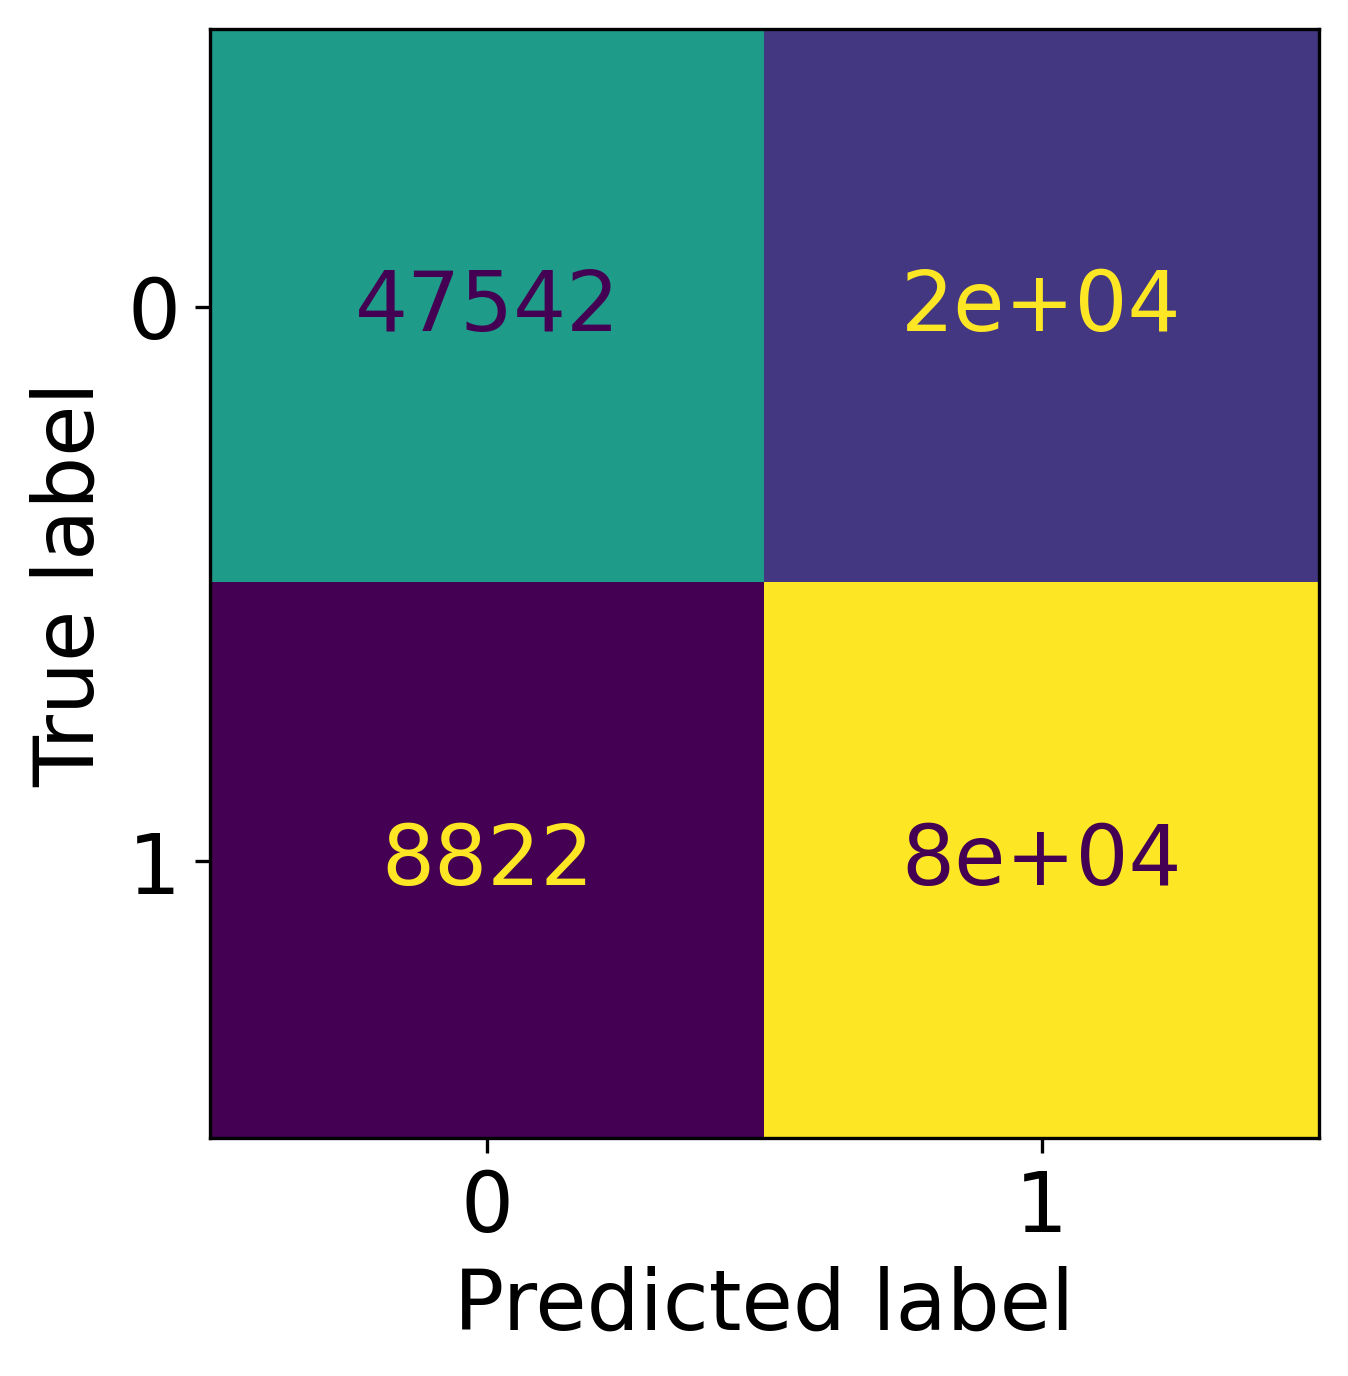

Test Accuracy: 0.81
Normalized Confusion Matrix:
[[0.70087864 0.29912136]
 [0.09987773 0.90012227]]


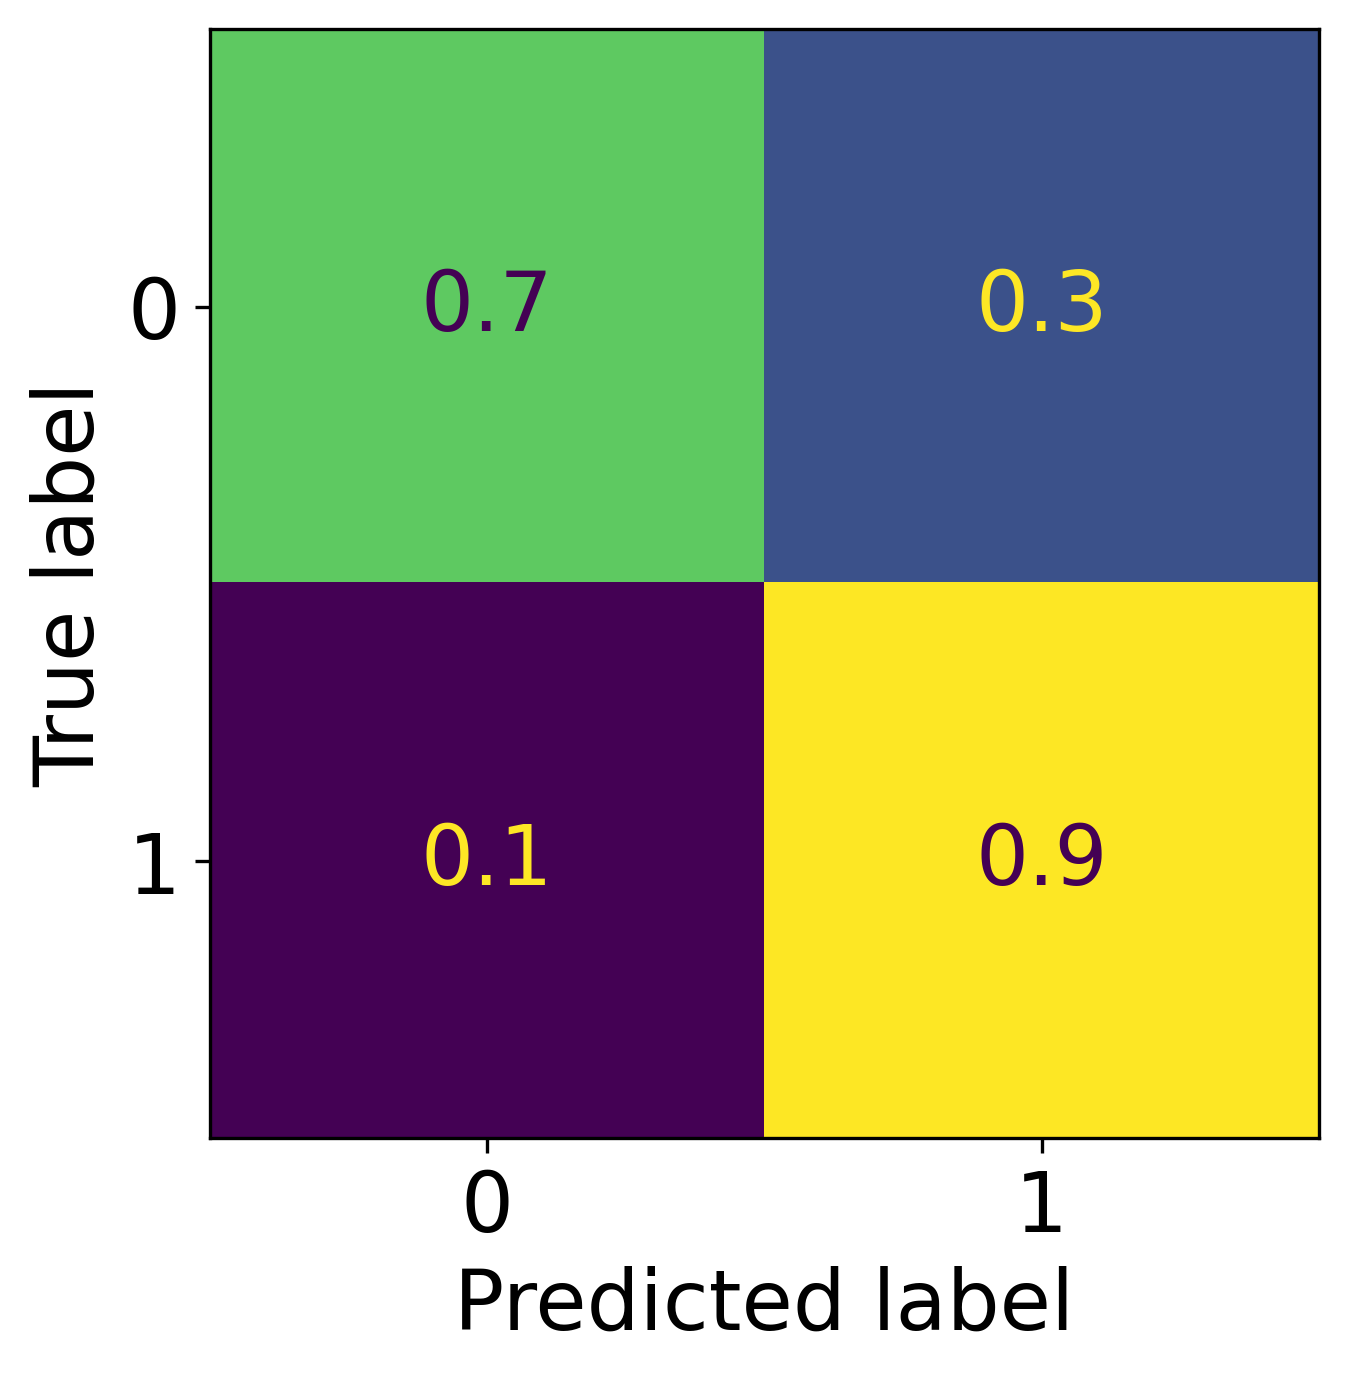

In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

# Applying CatBoost Classifier
catboost = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, verbose=0)  # Adjust hyperparameters as needed
catboost.fit(X_train, Y_train)

# Predictions
y_pred = catboost.predict(x_test)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plotting confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=catboost.classes_)
disp.plot(cmap='viridis', colorbar=False)
plt.show()

# Test accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Normalized confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print("Normalized Confusion Matrix:")
print(cm_normalized)

# Plotting normalized confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=catboost.classes_)
disp.plot(cmap='viridis', colorbar=False)
plt.show()

In [ ]:
import joblib

# Save the model
model_filename = "/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/Model/Other/CatBoost.pkl"
catboost.save_model(model_filename)

In [ ]:
# Load the model
model_filename = "/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/Model/Other/CatBoost.pkl"
CatBoost = CatBoostClassifier()
CatBoost.load_model(model_filename)

## GNB

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.36      0.42     67832
           1       0.59      0.73      0.65     88328

    accuracy                           0.57    156160
   macro avg       0.55      0.54      0.54    156160
weighted avg       0.55      0.57      0.55    156160

Confusion Matrix:
[[24136 43696]
 [24137 64191]]


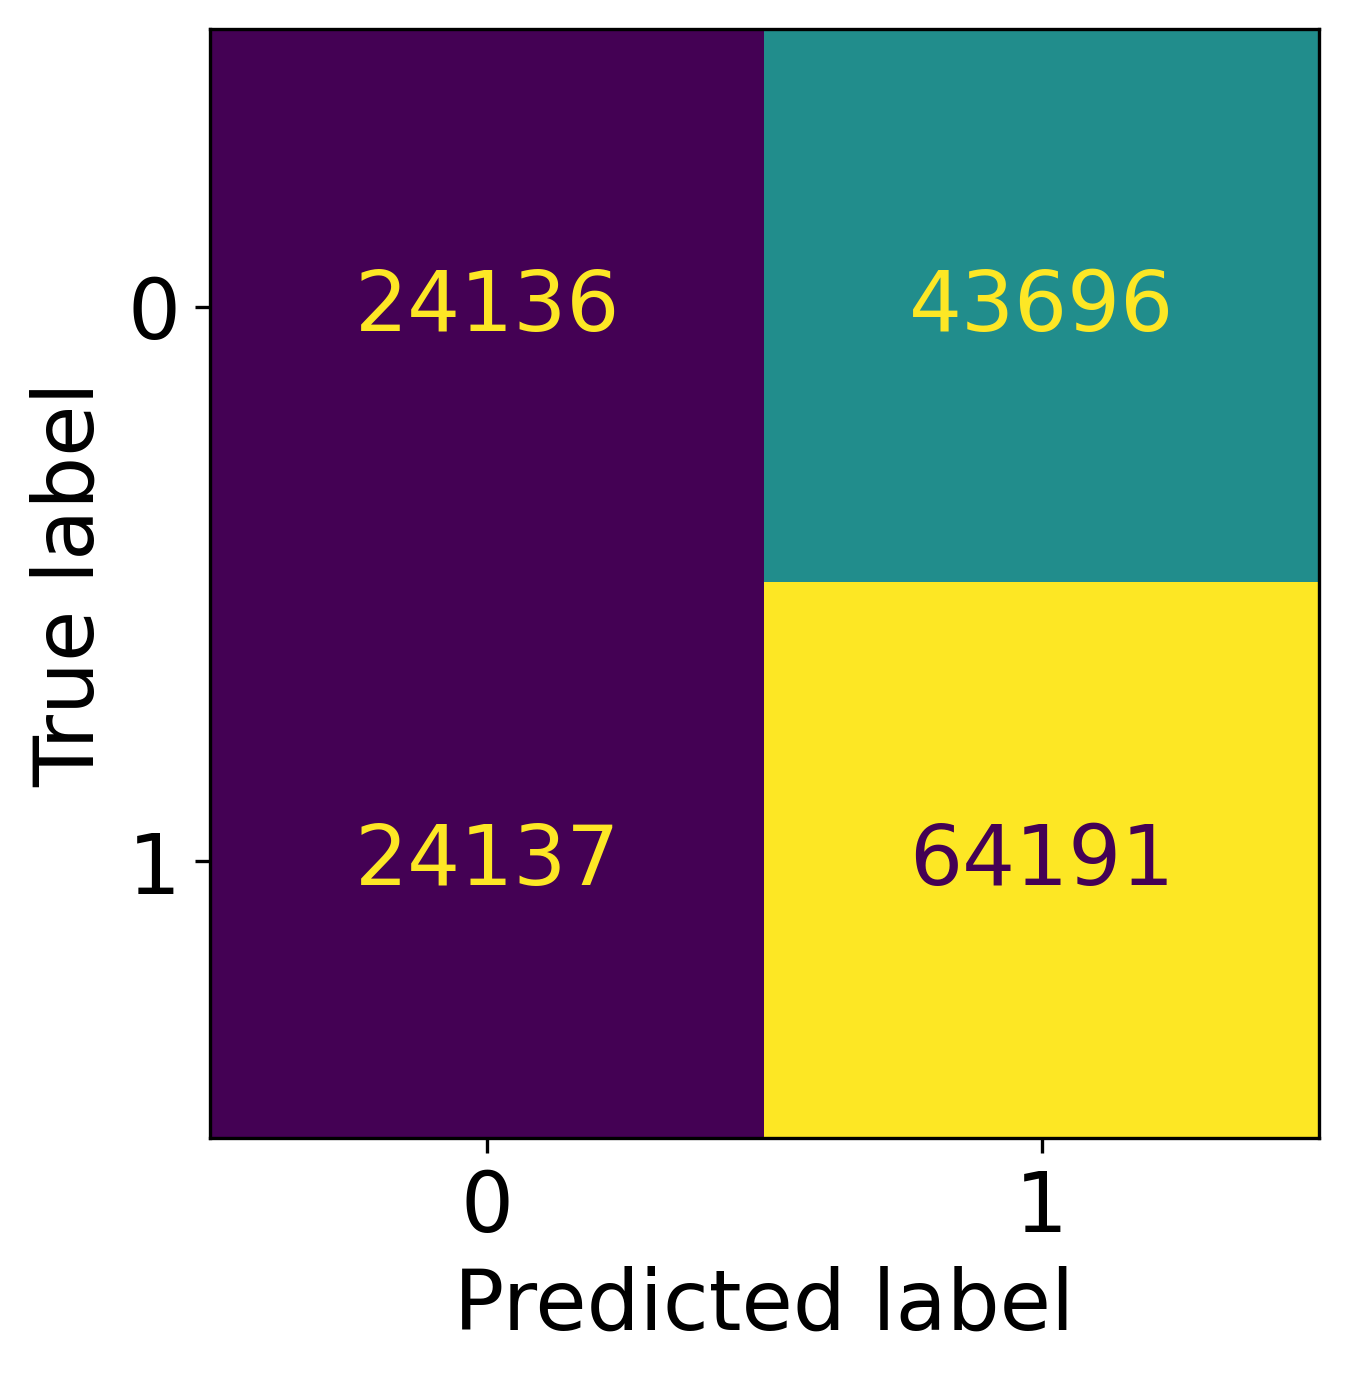

Test Accuracy: 0.57
Normalized Confusion Matrix:
[[0.35582026 0.64417974]
 [0.27326556 0.72673444]]


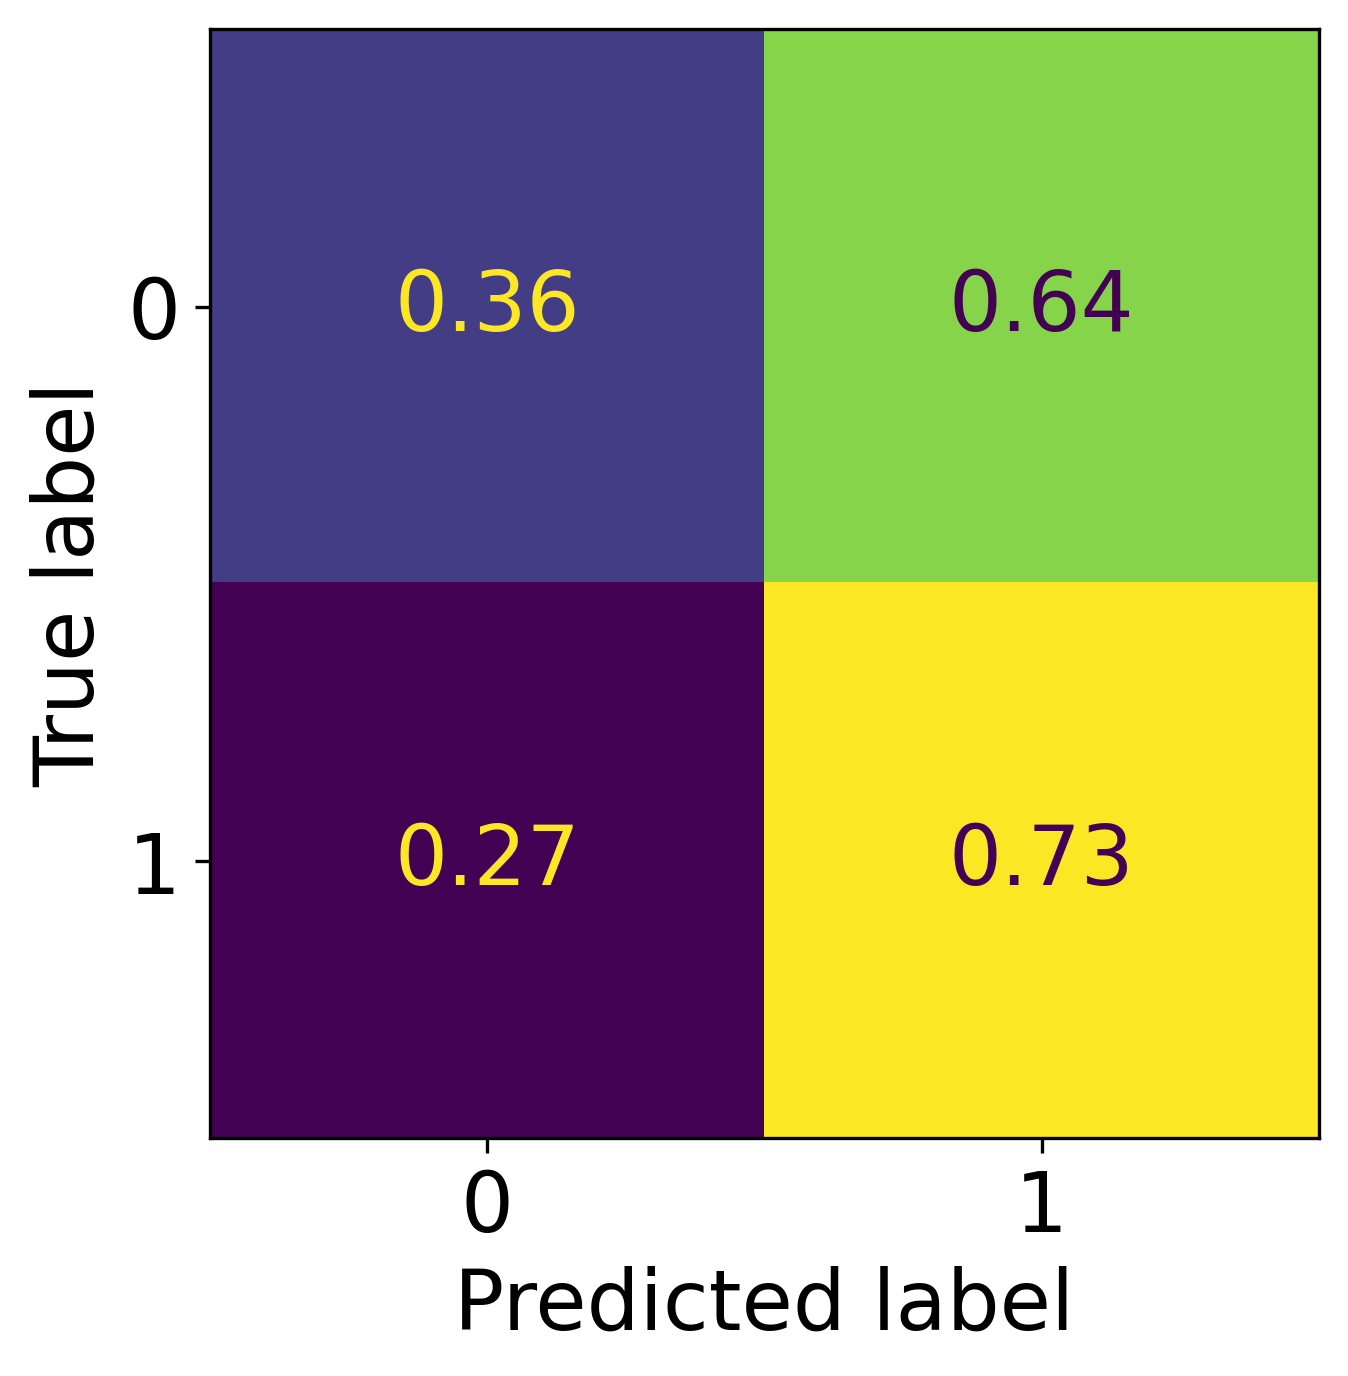

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

# Applying Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, Y_train)

# Predictions
y_pred = gnb.predict(x_test)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plotting confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gnb.classes_)
disp.plot(cmap='viridis', colorbar=False)
plt.show()

# Test accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Normalized confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print("Normalized Confusion Matrix:")
print(cm_normalized)

# Plotting normalized confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=gnb.classes_)
disp.plot(cmap='viridis', colorbar=False)
plt.show()

In [ ]:
import joblib

# Save the model
model_filename = "/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/Model/Other/GNB.pkl"
joblib.dump(gnb, model_filename)

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/Model/Other/GNB.pkl']

In [ ]:
# Load the model
model_filename = "/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/Model/Other/GNB.pkl"
GNB = joblib.load(model_filename)

## XGB

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:07:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.73      0.76     67832
           1       0.80      0.86      0.83     88328

    accuracy                           0.80    156160
   macro avg       0.80      0.79      0.80    156160
weighted avg       0.80      0.80      0.80    156160

Confusion Matrix:
[[49194 18638]
 [12025 76303]]


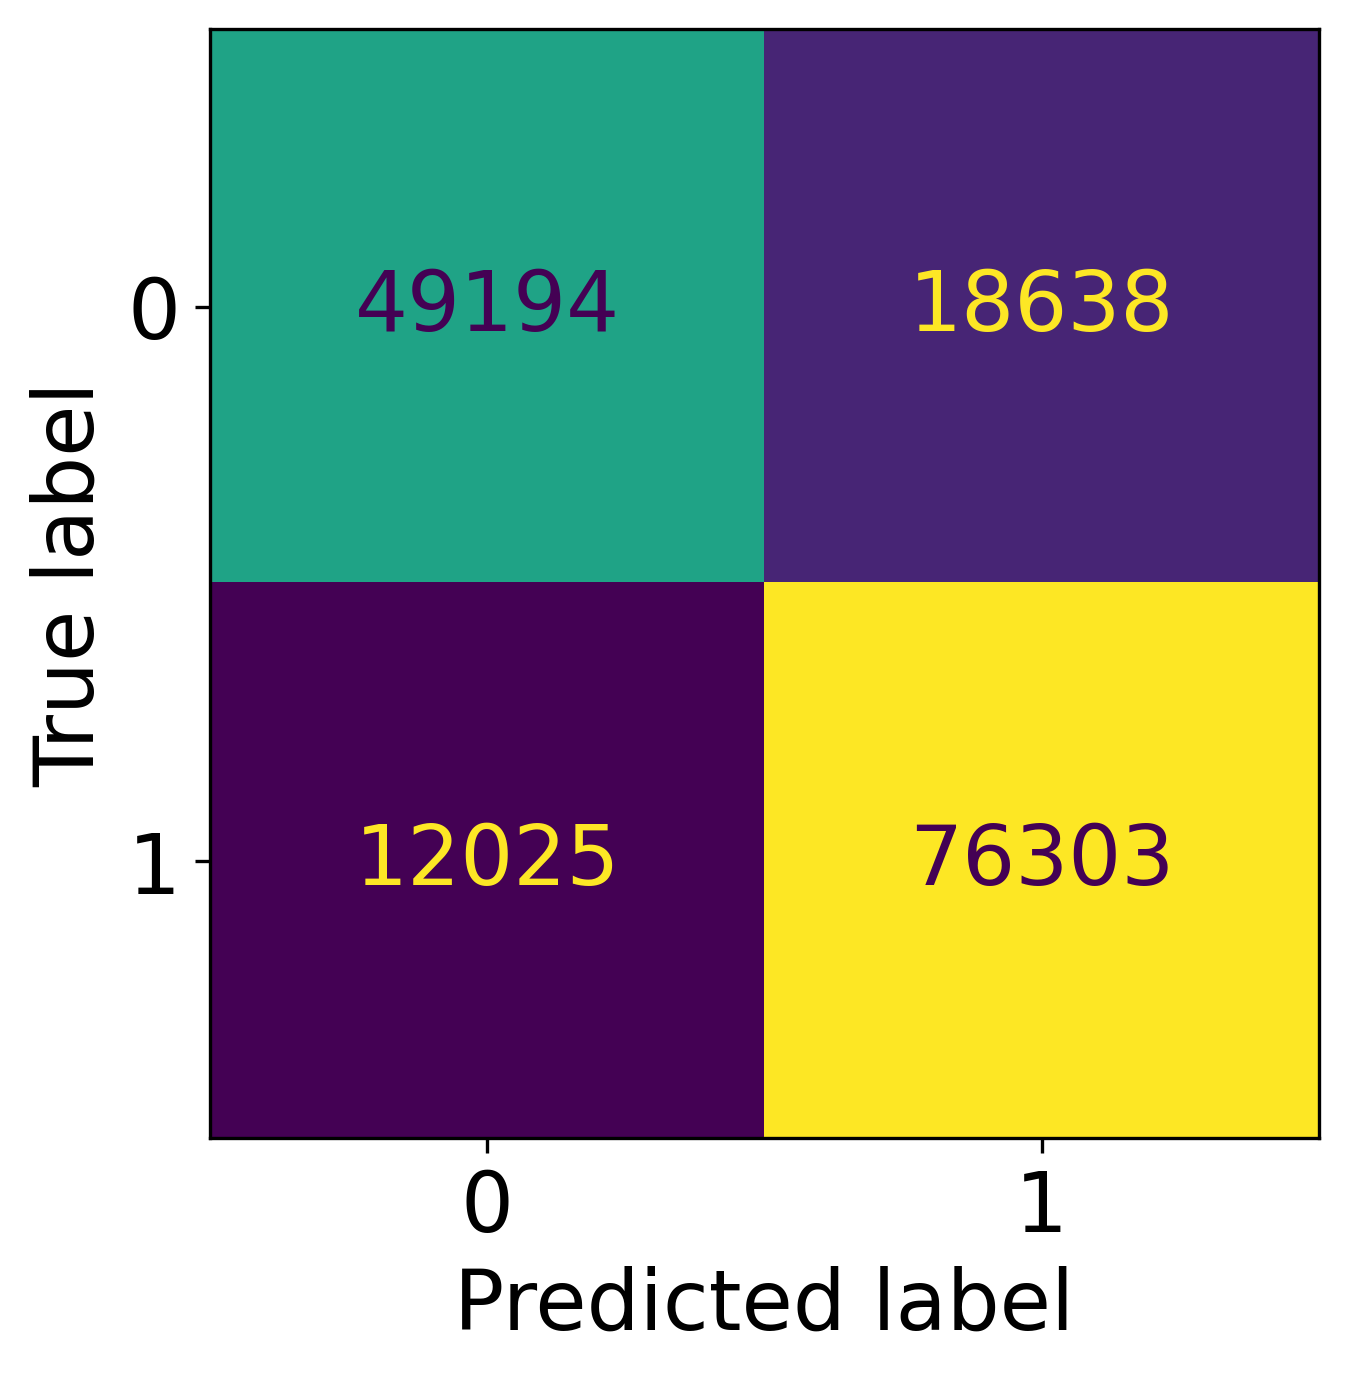

Test Accuracy: 0.80
Normalized Confusion Matrix:
[[0.72523293 0.27476707]
 [0.1361403  0.8638597 ]]


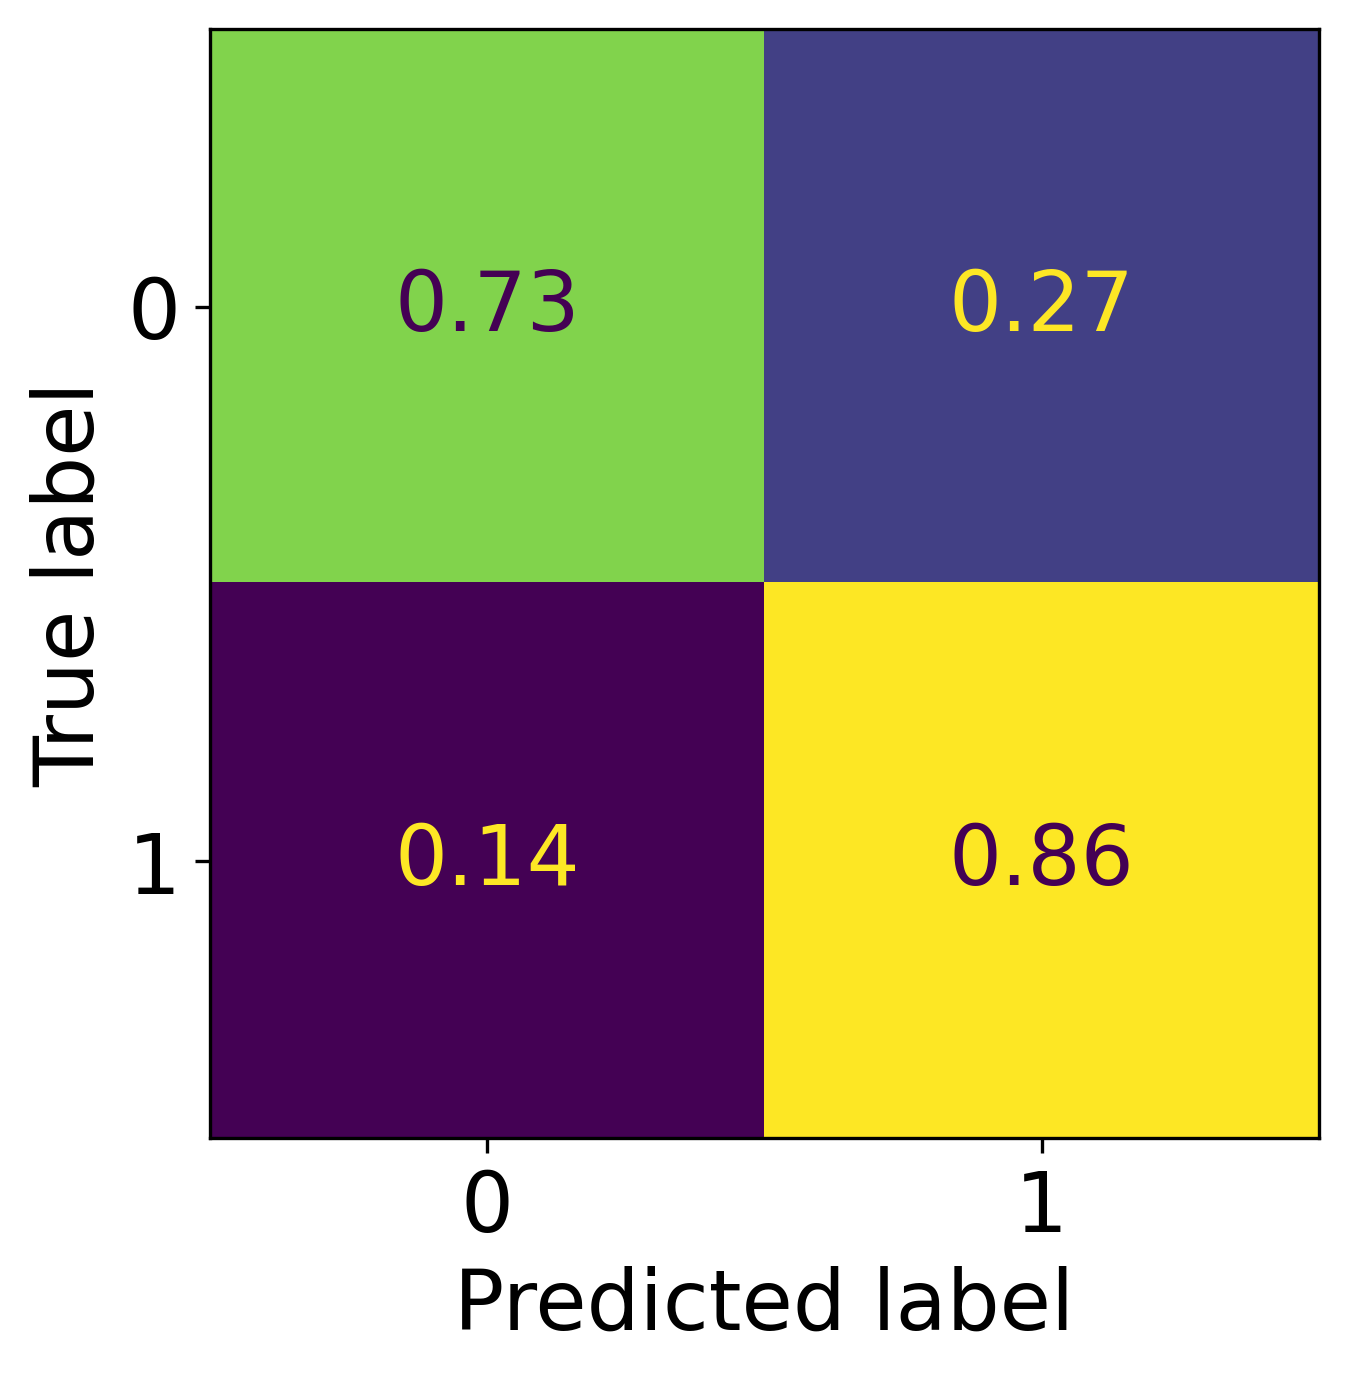

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

# Applying XGBoost Classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')  # `use_label_encoder=False` avoids a warning
xgb.fit(X_train, Y_train)

# Predictions
y_pred = xgb.predict(x_test)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plotting confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb.classes_)
disp.plot(cmap='viridis', colorbar=False)
plt.show()

# Test accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Normalized confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print("Normalized Confusion Matrix:")
print(cm_normalized)

# Plotting normalized confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=xgb.classes_)
disp.plot(cmap='viridis', colorbar=False)
plt.show()

In [ ]:
import joblib

# Save the model
model_filename = "/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/Model/Other/XGB.pkl"
joblib.dump(xgb, model_filename)

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/Model/Other/XGB.pkl']

In [ ]:
# Load the model
model_filename = "/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/Model/Other/XGB.pkl"
XGB = joblib.load(model_filename)

## RF

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.83      0.84     67832
           1       0.87      0.90      0.88     88328

    accuracy                           0.87    156160
   macro avg       0.87      0.86      0.86    156160
weighted avg       0.87      0.87      0.87    156160

Confusion Matrix:
[[56068 11764]
 [ 8980 79348]]


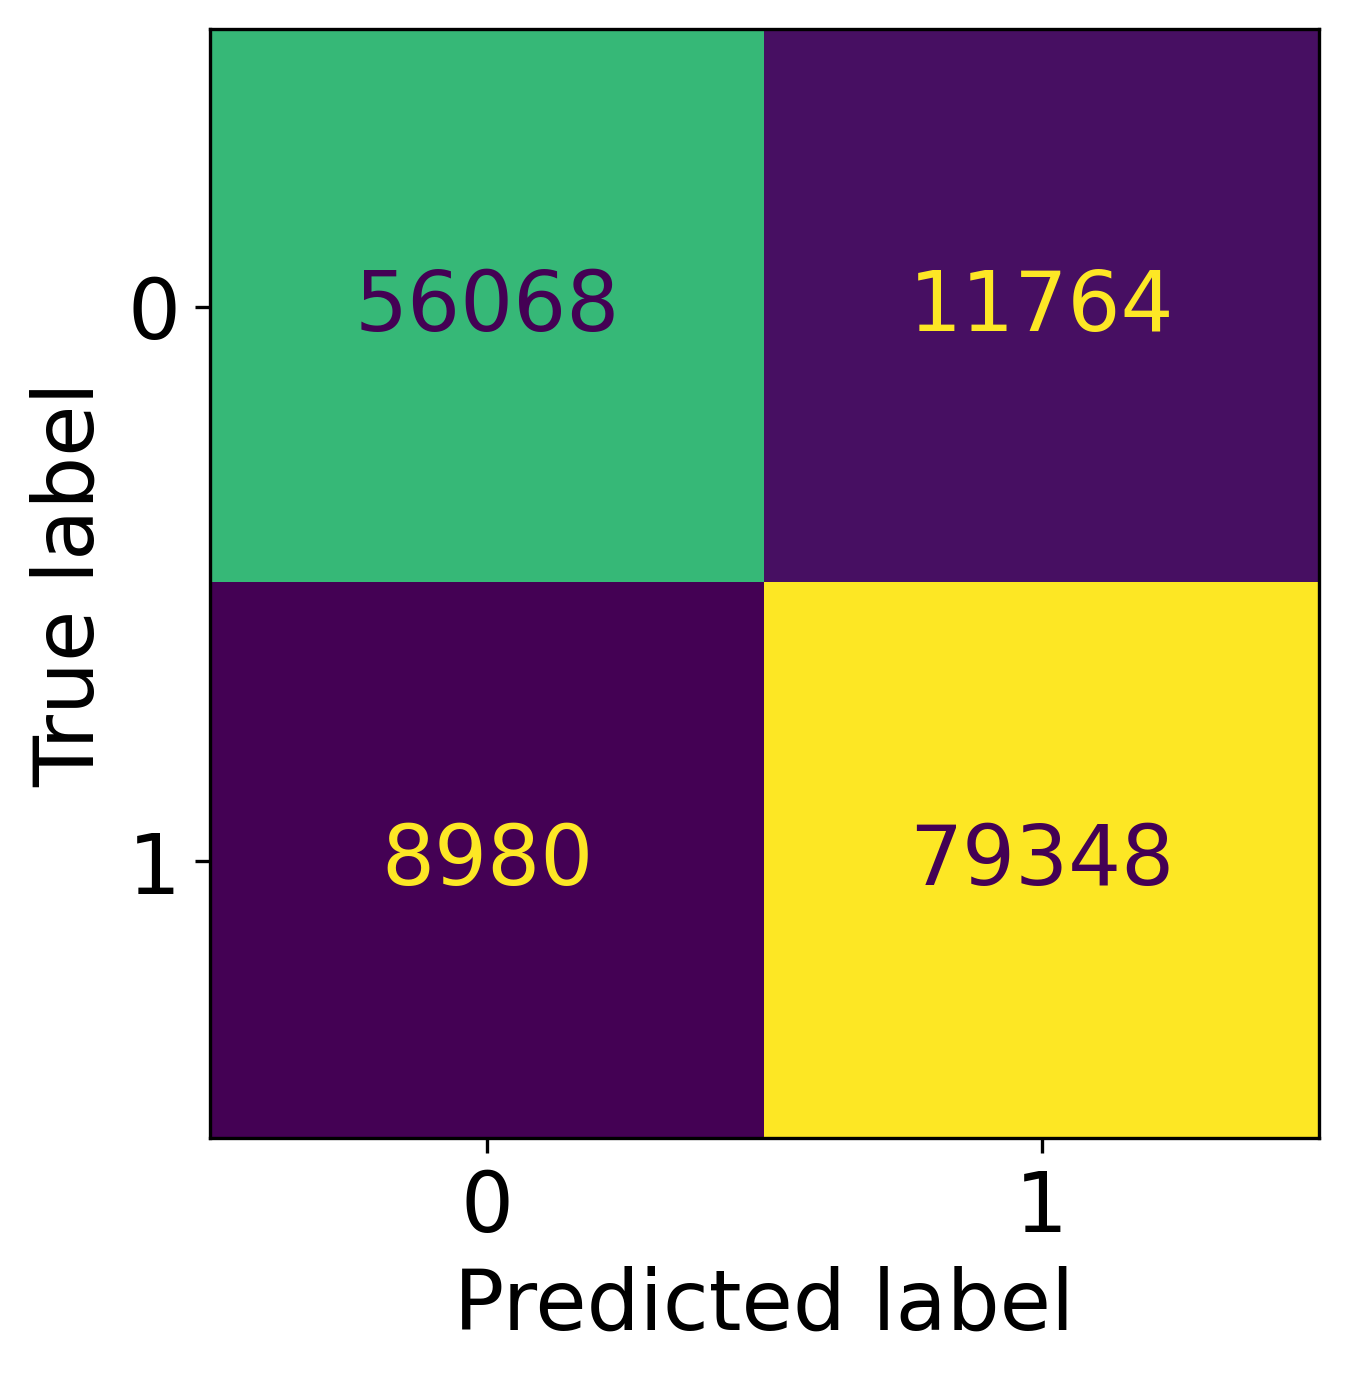

Test Accuracy: 0.87
Normalized Confusion Matrix:
[[0.82657153 0.17342847]
 [0.10166652 0.89833348]]


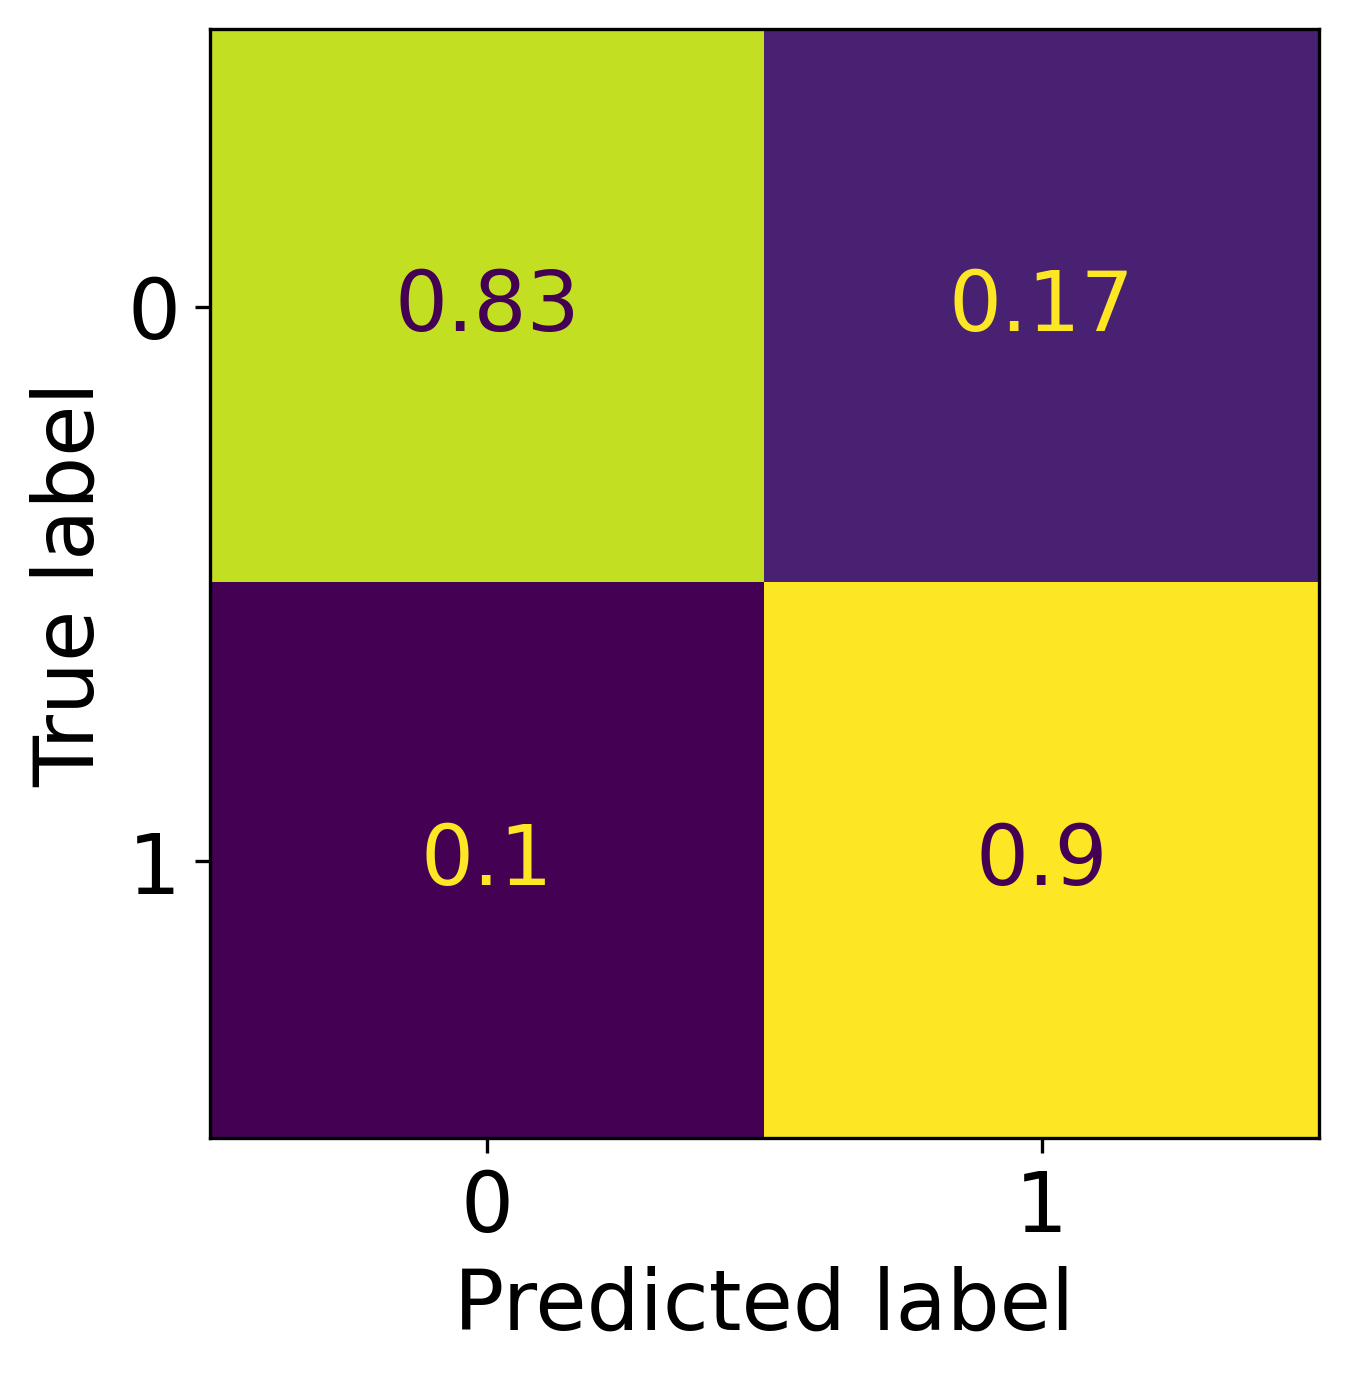

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

# Applying Random Forest Classifier
rf = RandomForestClassifier(n_estimators=5, max_depth=None, random_state=42)  # Use only 1 tree.
rf.fit(X_train, Y_train)

# Predictions
y_pred = rf.predict(x_test)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plotting confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap='viridis', colorbar=False)
plt.show()

# Test accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Normalized confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print("Normalized Confusion Matrix:")
print(cm_normalized)

# Plotting normalized confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=rf.classes_)
disp.plot(cmap='viridis', colorbar=False)
plt.show()

In [ ]:
import joblib

# Save the model
model_filename = "/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/Model/Other/RF.pkl"
joblib.dump(rf, model_filename)

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/Model/Other/RF.pkl']

In [ ]:
# Load the model
model_filename = "/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/Model/Other/RF.pkl"
RF = joblib.load(model_filename)

## AdaBoost

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.46      0.53     67832
           1       0.65      0.78      0.71     88328

    accuracy                           0.64    156160
   macro avg       0.64      0.62      0.62    156160
weighted avg       0.64      0.64      0.63    156160

Confusion Matrix:
[[31302 36530]
 [19183 69145]]


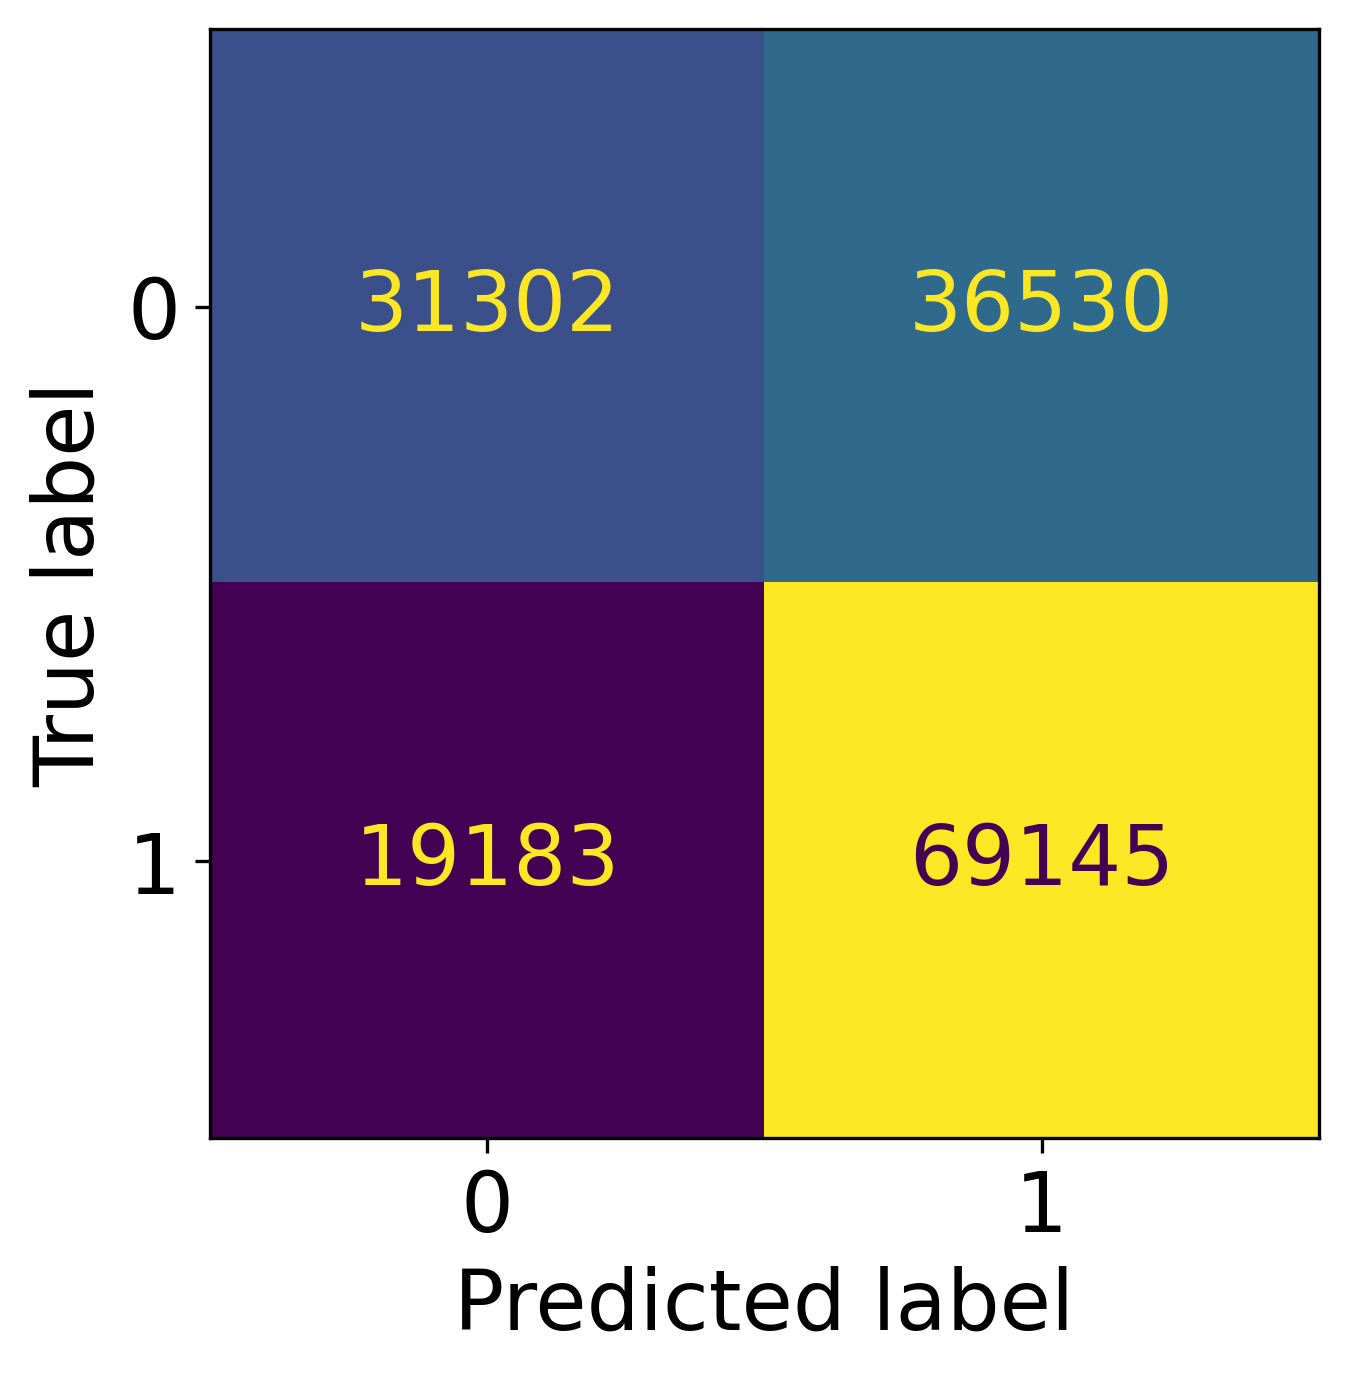

Test Accuracy: 0.64
Normalized Confusion Matrix:
[[0.46146362 0.53853638]
 [0.21717915 0.78282085]]


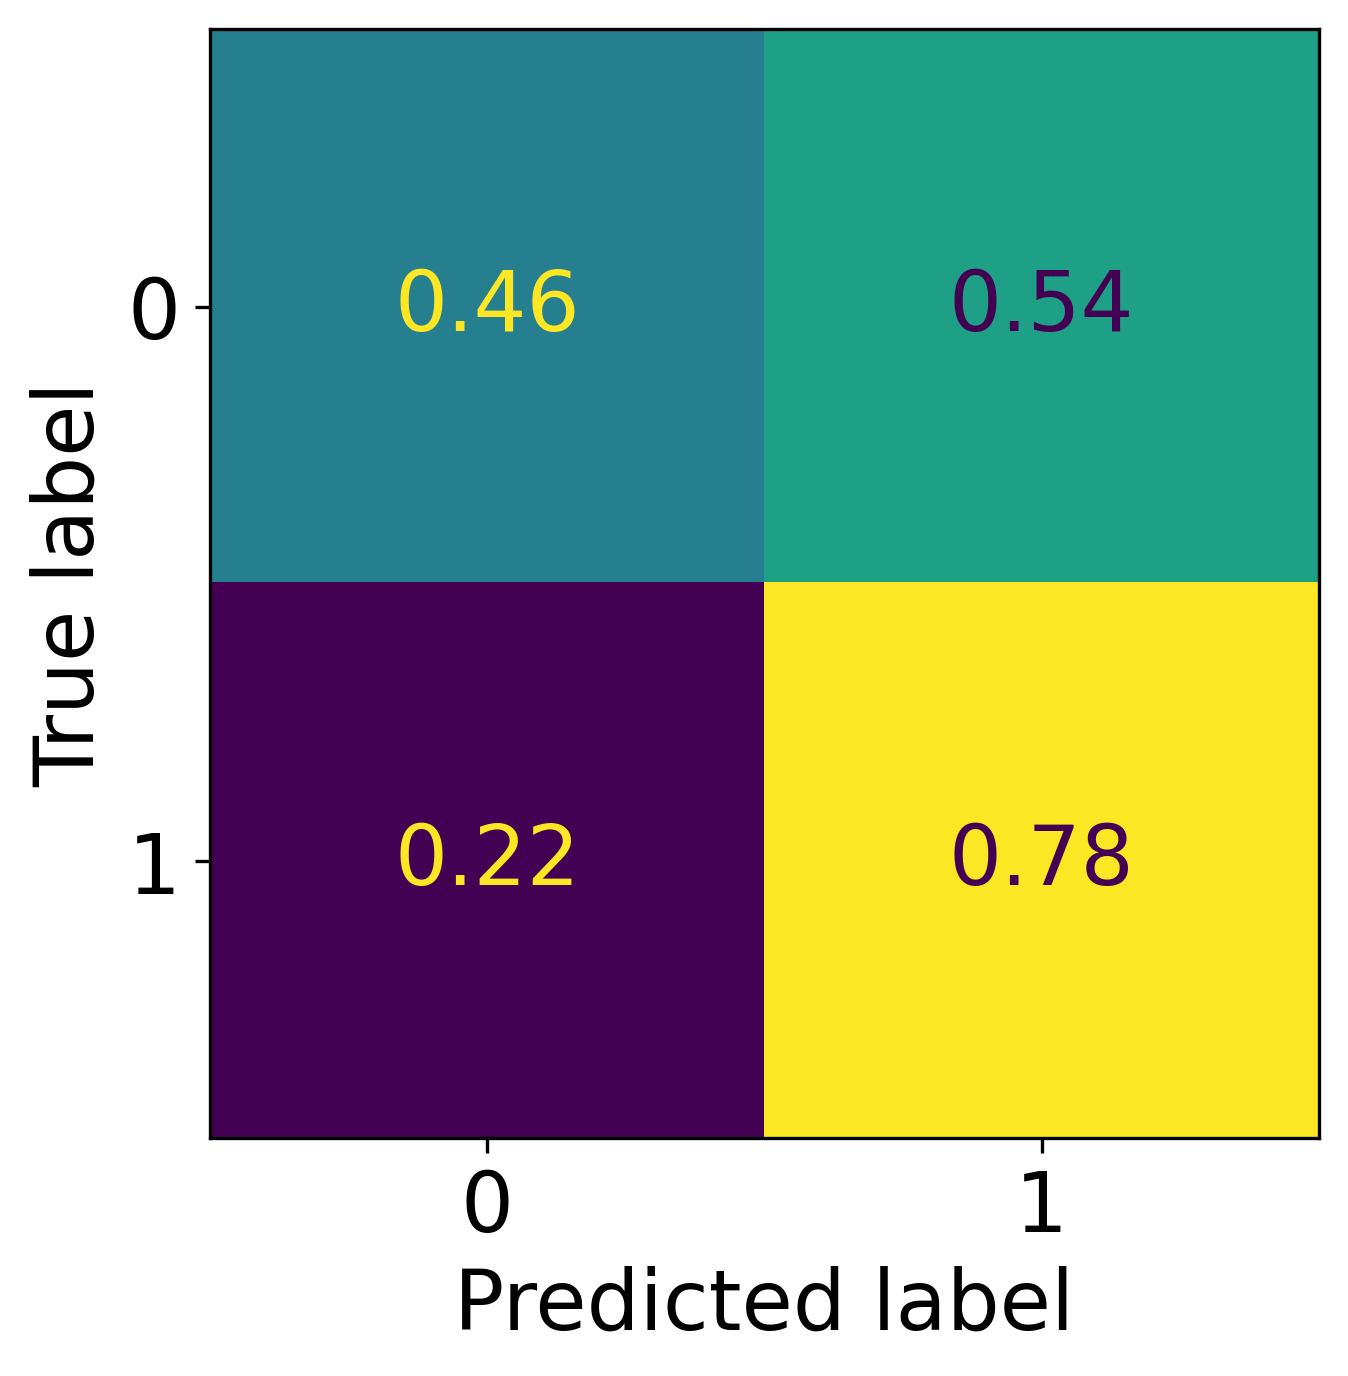

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

# Applying AdaBoost Classifier
adaboost = AdaBoostClassifier(n_estimators=100, learning_rate=1.0, random_state=42)
adaboost.fit(X_train, Y_train)

# Predictions
y_pred = adaboost.predict(x_test)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plotting confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=adaboost.classes_)
disp.plot(cmap='viridis', colorbar=False)
plt.show()

# Test accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Normalized confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print("Normalized Confusion Matrix:")
print(cm_normalized)

# Plotting normalized confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=adaboost.classes_)
disp.plot(cmap='viridis', colorbar=False)
plt.show()

In [ ]:
import joblib

# Save the model
model_filename = "/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/Model/Other/AdaBoost.pkl"
joblib.dump(adaboost, model_filename)

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/Model/Other/AdaBoost.pkl']

In [ ]:
# Load the model
model_filename = "/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/Model/Other/AdaBoost.pkl"
AdaBoost = joblib.load(model_filename)

## RUSBoost

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.20      0.29     67832
           1       0.58      0.85      0.69     88328

    accuracy                           0.57    156160
   macro avg       0.54      0.52      0.49    156160
weighted avg       0.55      0.57      0.51    156160

Confusion Matrix:
[[13514 54318]
 [13413 74915]]


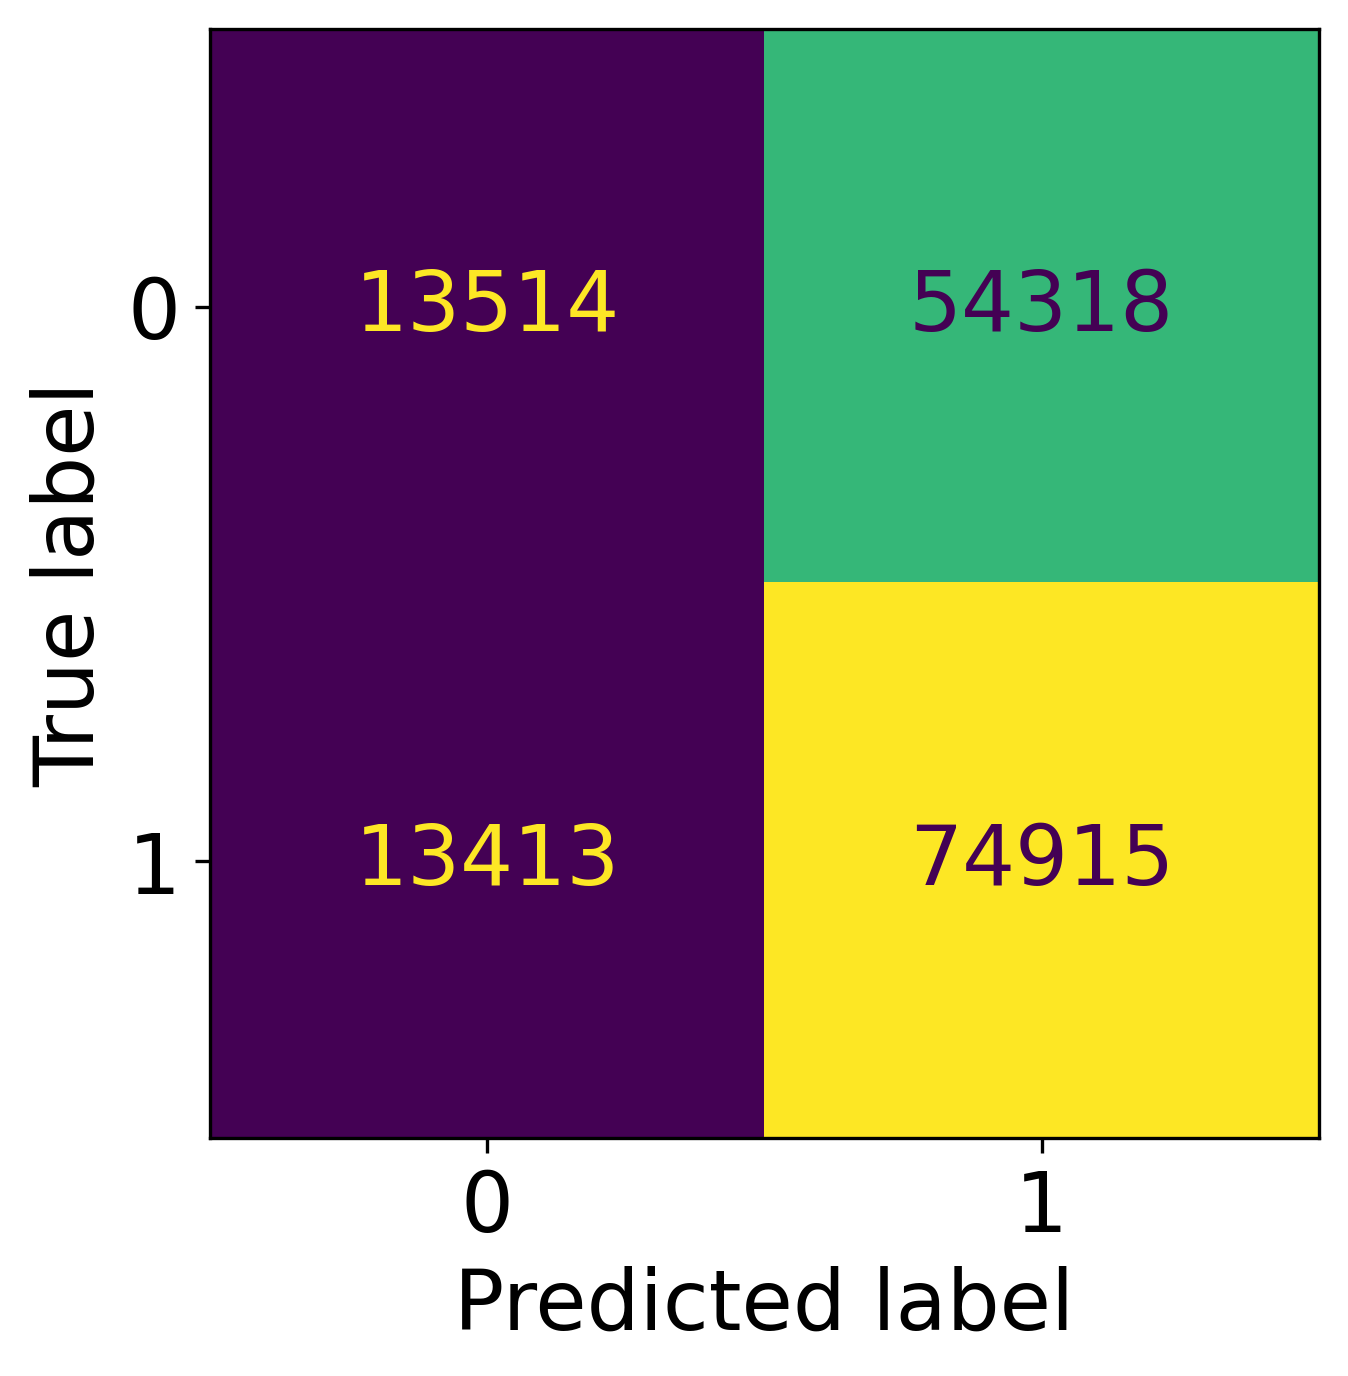

Test Accuracy: 0.57
Normalized Confusion Matrix:
[[0.1992275  0.8007725 ]
 [0.15185445 0.84814555]]


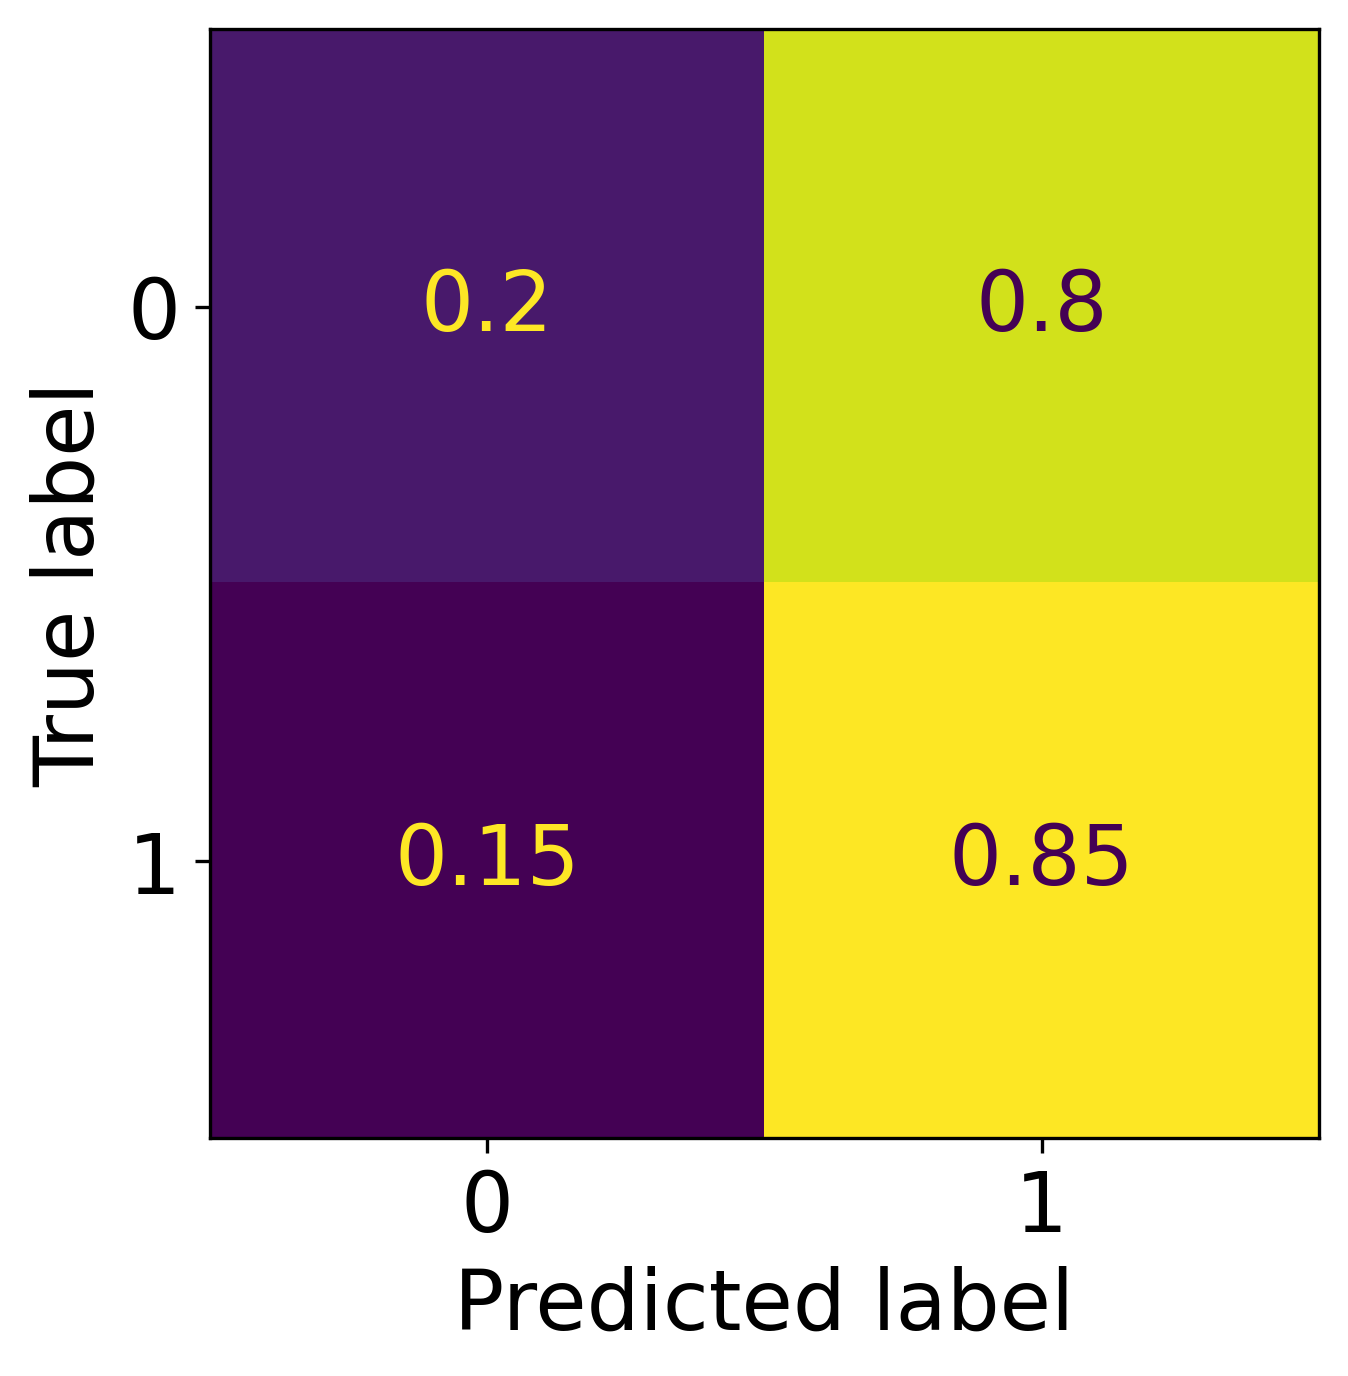

In [ ]:
from imblearn.ensemble import RUSBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

# Applying RUSBoost Classifier
rusboost = RUSBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),  # Base classifier
    n_estimators=100,
    random_state=42
)
rusboost.fit(X_train, Y_train)

# Predictions
y_pred = rusboost.predict(x_test)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plotting confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rusboost.classes_)
disp.plot(cmap='viridis', colorbar=False)
plt.show()

# Test accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Normalized confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print("Normalized Confusion Matrix:")
print(cm_normalized)

# Plotting normalized confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=rusboost.classes_)
disp.plot(cmap='viridis', colorbar=False)
plt.show()

In [ ]:
import joblib

# Save the model
model_filename = "/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/Model/Other/RUSBoost.pkl"
joblib.dump(rusboost, model_filename)

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/Model/Other/RUSBoost.pkl']

In [ ]:
# Load the model
model_filename = "/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/Model/Other/RUSBoost.pkl"
RUSBoost = joblib.load(model_filename)

## LGBM

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 264984, number of negative: 203496
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.226980 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 51000
[LightGBM] [Info] Number of data points in the train set: 468480, number of used features: 200
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.565625 -> initscore=0.264023
[LightGBM] [Info] Start training from score 0.264023


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.63      0.68     67832
           1       0.75      0.84      0.79     88328

    accuracy                           0.75    156160
   macro avg       0.75      0.73      0.74    156160
weighted avg       0.75      0.75      0.74    156160

Confusion Matrix:
[[42699 25133]
 [14294 74034]]


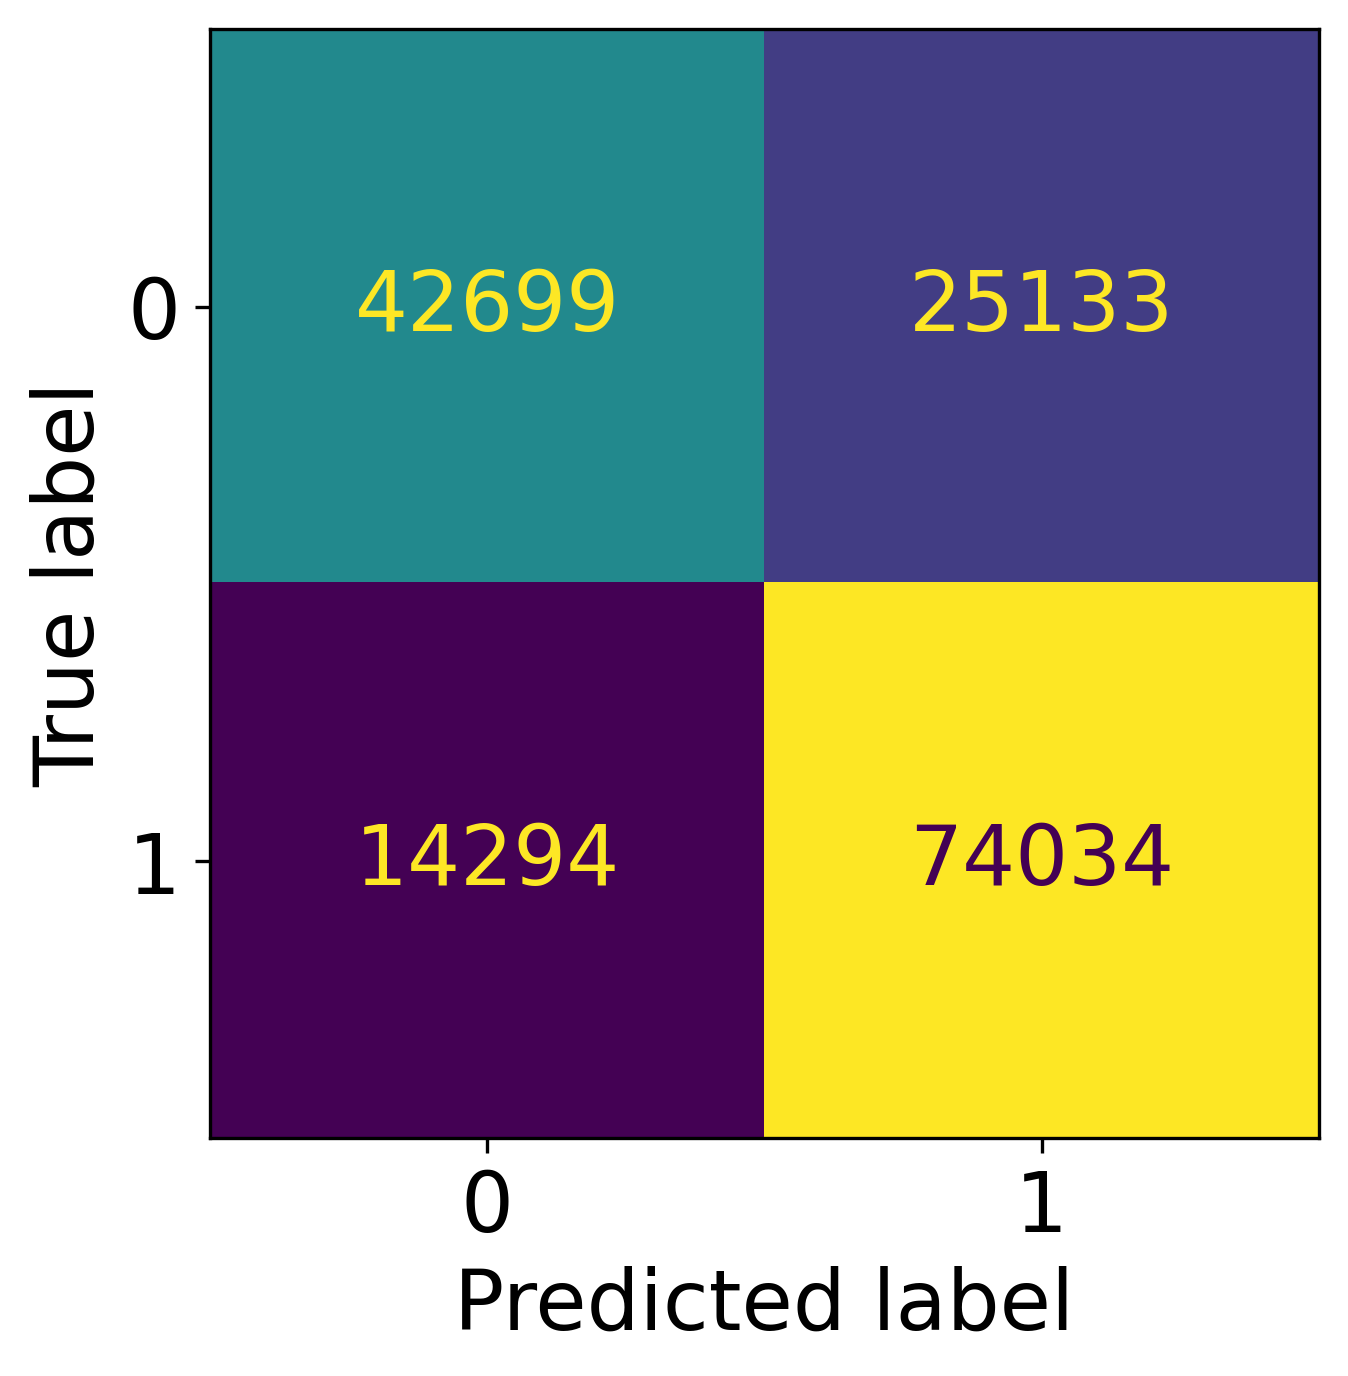

Test Accuracy: 0.75
Normalized Confusion Matrix:
[[0.62948166 0.37051834]
 [0.16182864 0.83817136]]


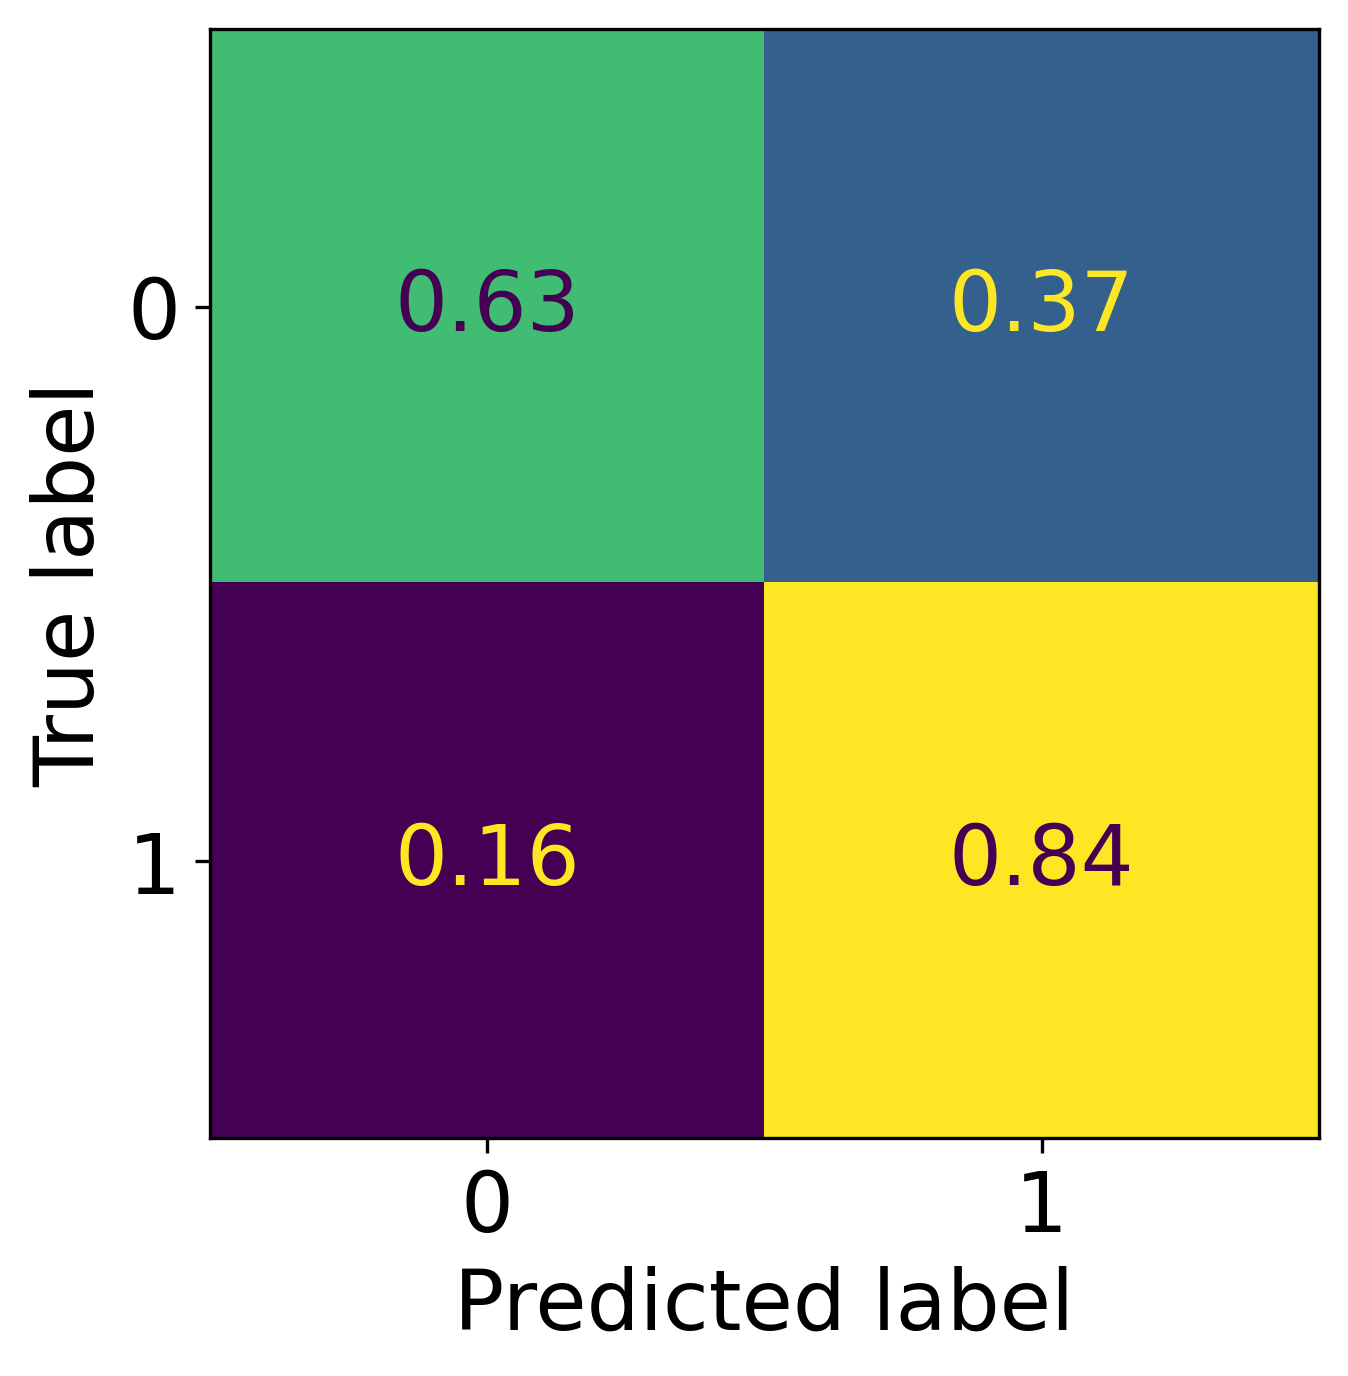

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

# Applying LightGBM Classifier
lgbm = LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=-1, random_state=42)
lgbm.fit(X_train, Y_train)

# Predictions
y_pred = lgbm.predict(x_test)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plotting confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lgbm.classes_)
disp.plot(cmap='viridis', colorbar=False)
plt.show()

# Test accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Normalized confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print("Normalized Confusion Matrix:")
print(cm_normalized)

# Plotting normalized confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=lgbm.classes_)
disp.plot(cmap='viridis', colorbar=False)
plt.show()

In [ ]:
import joblib

# Save the model
model_filename = "/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/Model/Other/LGBM.pkl"
joblib.dump(lgbm, model_filename)

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/Model/Other/LGBM.pkl']

In [ ]:
# Load the model
model_filename = "/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/Model/Other/LGBM.pkl"
LGBM = joblib.load(model_filename)

## MLP

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81     67832
           1       0.85      0.86      0.85     88328

    accuracy                           0.83    156160
   macro avg       0.83      0.83      0.83    156160
weighted avg       0.83      0.83      0.83    156160

Confusion Matrix:
[[54372 13460]
 [12569 75759]]


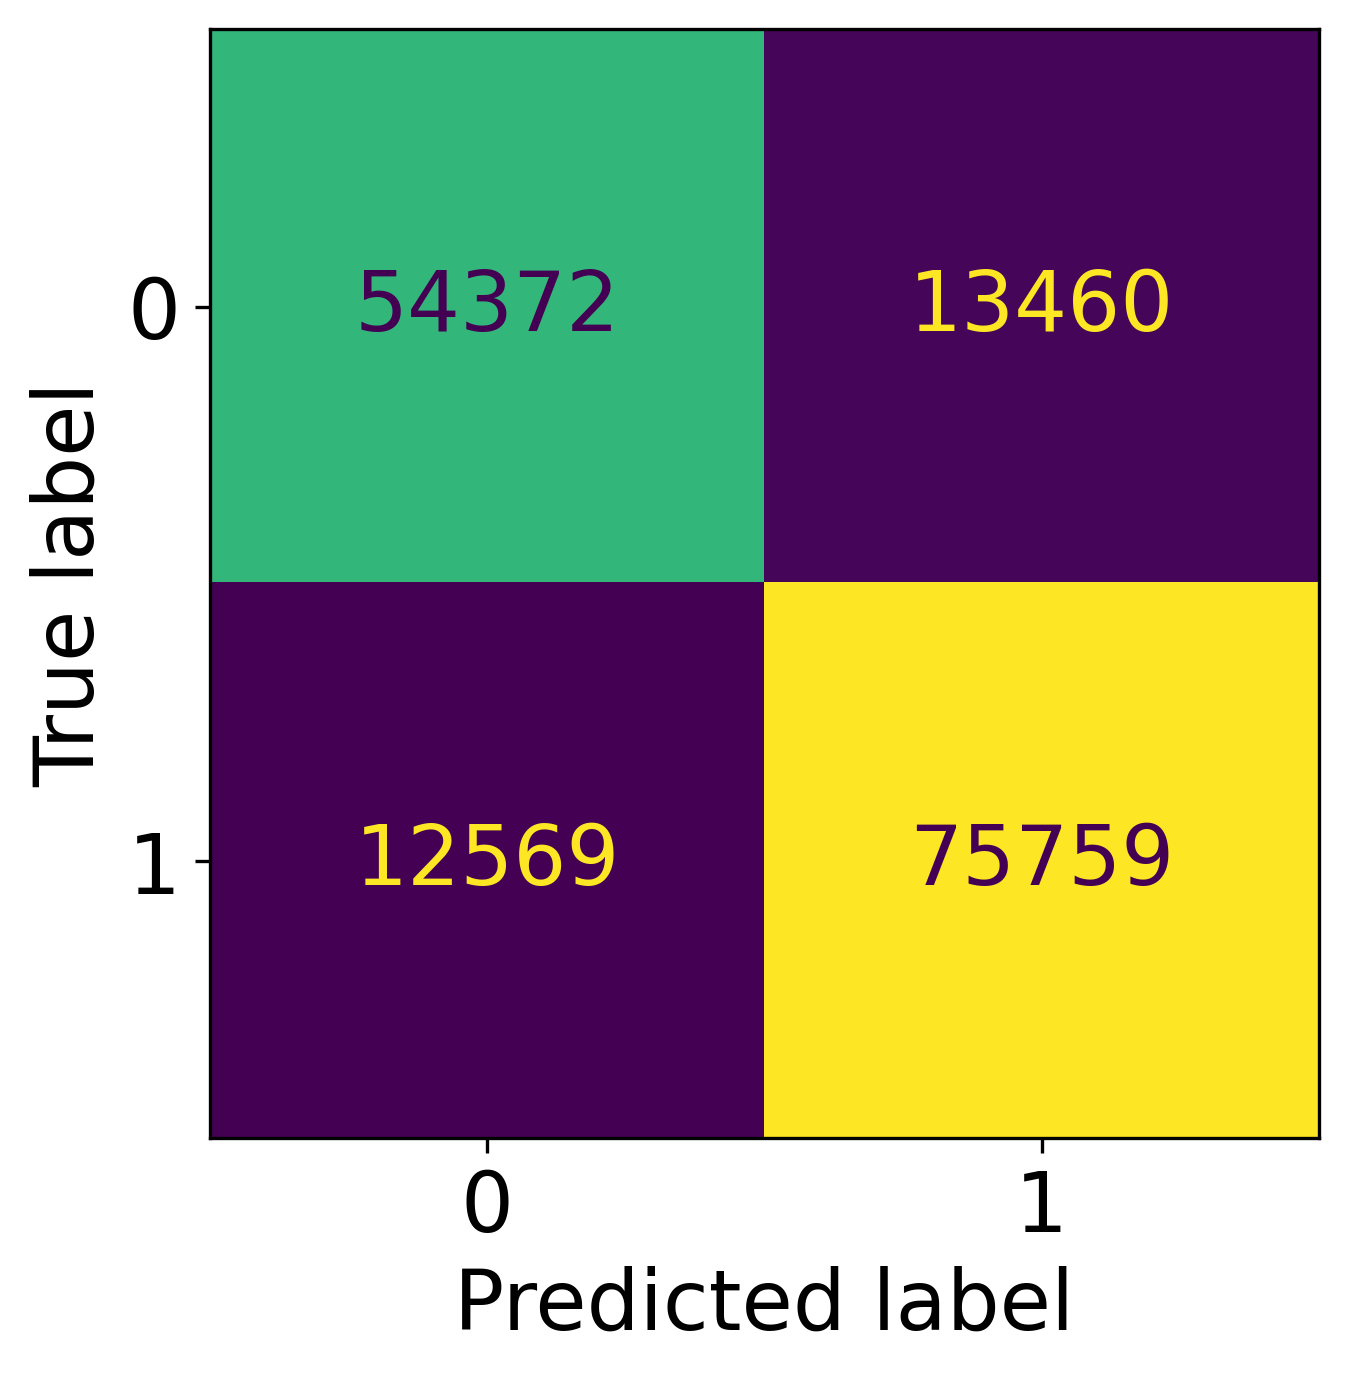

Test Accuracy: 0.83
Normalized Confusion Matrix:
[[0.80156858 0.19843142]
 [0.14229916 0.85770084]]


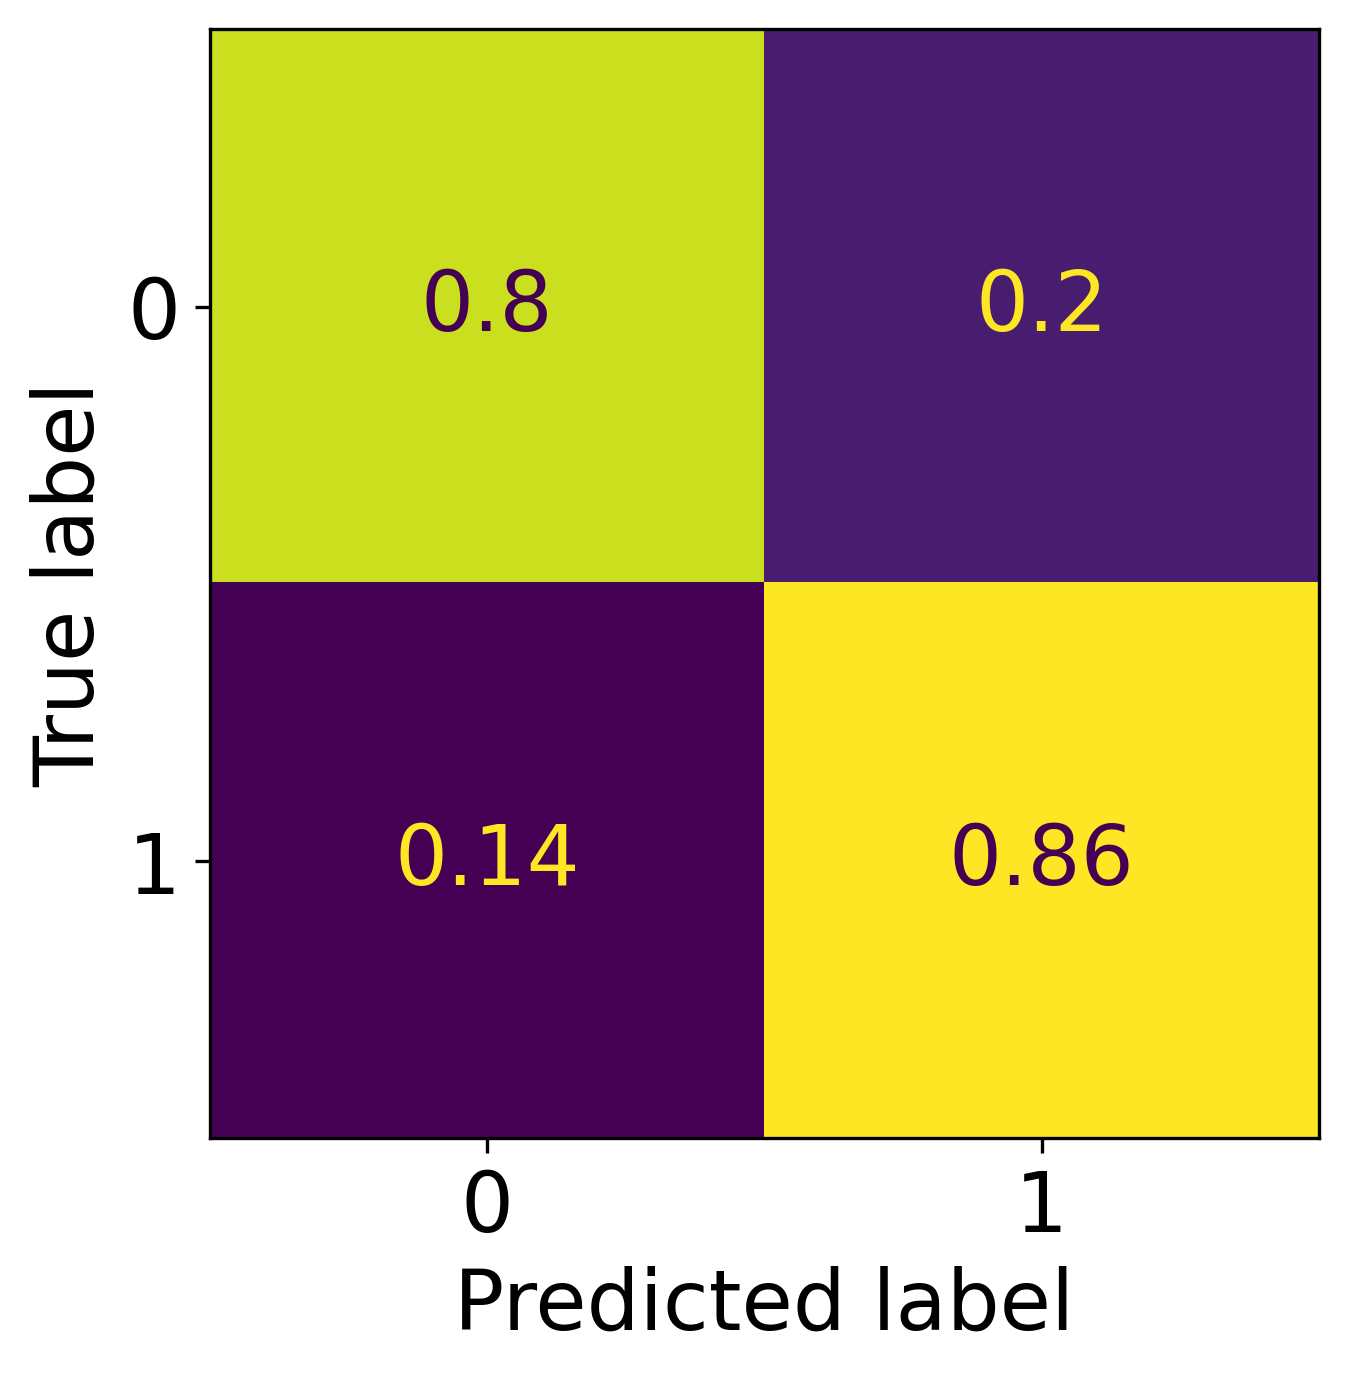

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

# Applying MLP Classifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=200, random_state=42)
mlp.fit(X_train, Y_train)

# Predictions
y_pred = mlp.predict(x_test)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plotting confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp.classes_)
disp.plot(cmap='viridis', colorbar=False)
plt.show()

# Test accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Normalized confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print("Normalized Confusion Matrix:")
print(cm_normalized)

# Plotting normalized confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=mlp.classes_)
disp.plot(cmap='viridis', colorbar=False)
plt.show()

In [ ]:
import joblib

# Save the model
model_filename = "/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/Model/Other/MLP.pkl"
joblib.dump(mlp, model_filename)

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/Model/Other/MLP.pkl']

In [ ]:
# Load the model
model_filename = "/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/Model/Other/MLP.pkl"
MLP = joblib.load(model_filename)

# Deep Learning Model

In [ ]:
from tensorflow.keras.utils import to_categorical

# Reshape the input data
X_train = np.expand_dims(X_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# One-hot encode the labels
Y_train = to_categorical(Y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

## ANN

In [ ]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

# Define input shape based on X_train
input_shape = (X_train.shape[1],)  # Flattened input shape for ANN

# Build a simple ANN model
model = Sequential()

# Input layer
model.add(Input(shape=input_shape))

# Dense hidden layers with minimal complexity
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(2, activation='softmax'))  # Assuming 2 output classes

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)

# Train the model
H = model.fit(
    X_train, Y_train,
    batch_size=100,
    epochs=20,
    verbose=1,
    validation_data=(x_test, y_test),
)

Epoch 1/20
4685/4685 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.6252 - loss: 0.6491 - val_accuracy: 0.6745 - val_loss: 0.5951
Epoch 2/20
4685/4685 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6674 - loss: 0.5985 - val_accuracy: 0.6882 - val_loss: 0.5753
Epoch 3/20
4685/4685 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6783 - loss: 0.5848 - val_accuracy: 0.6939 - val_loss: 0.5658
Epoch 4/20
4685/4685 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6875 - loss: 0.5737 - val_accuracy: 0.7004 - val_loss: 0.5538
Epoch 5/20
4685/4685 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6906 - loss: 0.5683 - val_accuracy: 0.7080 - val_loss: 0.5447
Epoch 6/20
4685/4685 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6964 - loss: 0.5603 - val_accuracy: 0.7128 - val_loss: 0.5392
Epoch 7/20
4685/4685 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7012 - loss: 0.5549 - val_accuracy: 0.7187 - val_loss: 0.5304
Epoch 8/20
4685/4685 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7027 - loss: 0.5524 -

In [ ]:

from keras.models import save_model

model.save("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/Model/Other/ANN.h5")


In [ ]:
from keras.models import load_model

ANN = load_model("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/Model/Other/ANN.h5")

In [ ]:
from keras.models import load_model

score = ANN.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4880/4880 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.7414 - loss: 0.4986
Test loss: 0.4980059564113617
Test accuracy: 0.7431800961494446


In [ ]:
y_true = np.array(y_test)
y_pred = ANN.predict(x_test)

4880/4880 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step


**Classification report of CNN model**

In [ ]:
y_pred = np.squeeze(y_pred)
y_pred = np.array(y_pred >= 0.5, dtype=int)  # Use 'int' instead of 'np.int'

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.62      0.68     67832
           1       0.74      0.84      0.79     88328

   micro avg       0.74      0.74      0.74    156160
   macro avg       0.74      0.73      0.73    156160
weighted avg       0.74      0.74      0.74    156160
 samples avg       0.74      0.74      0.74    156160



4880/4880 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step


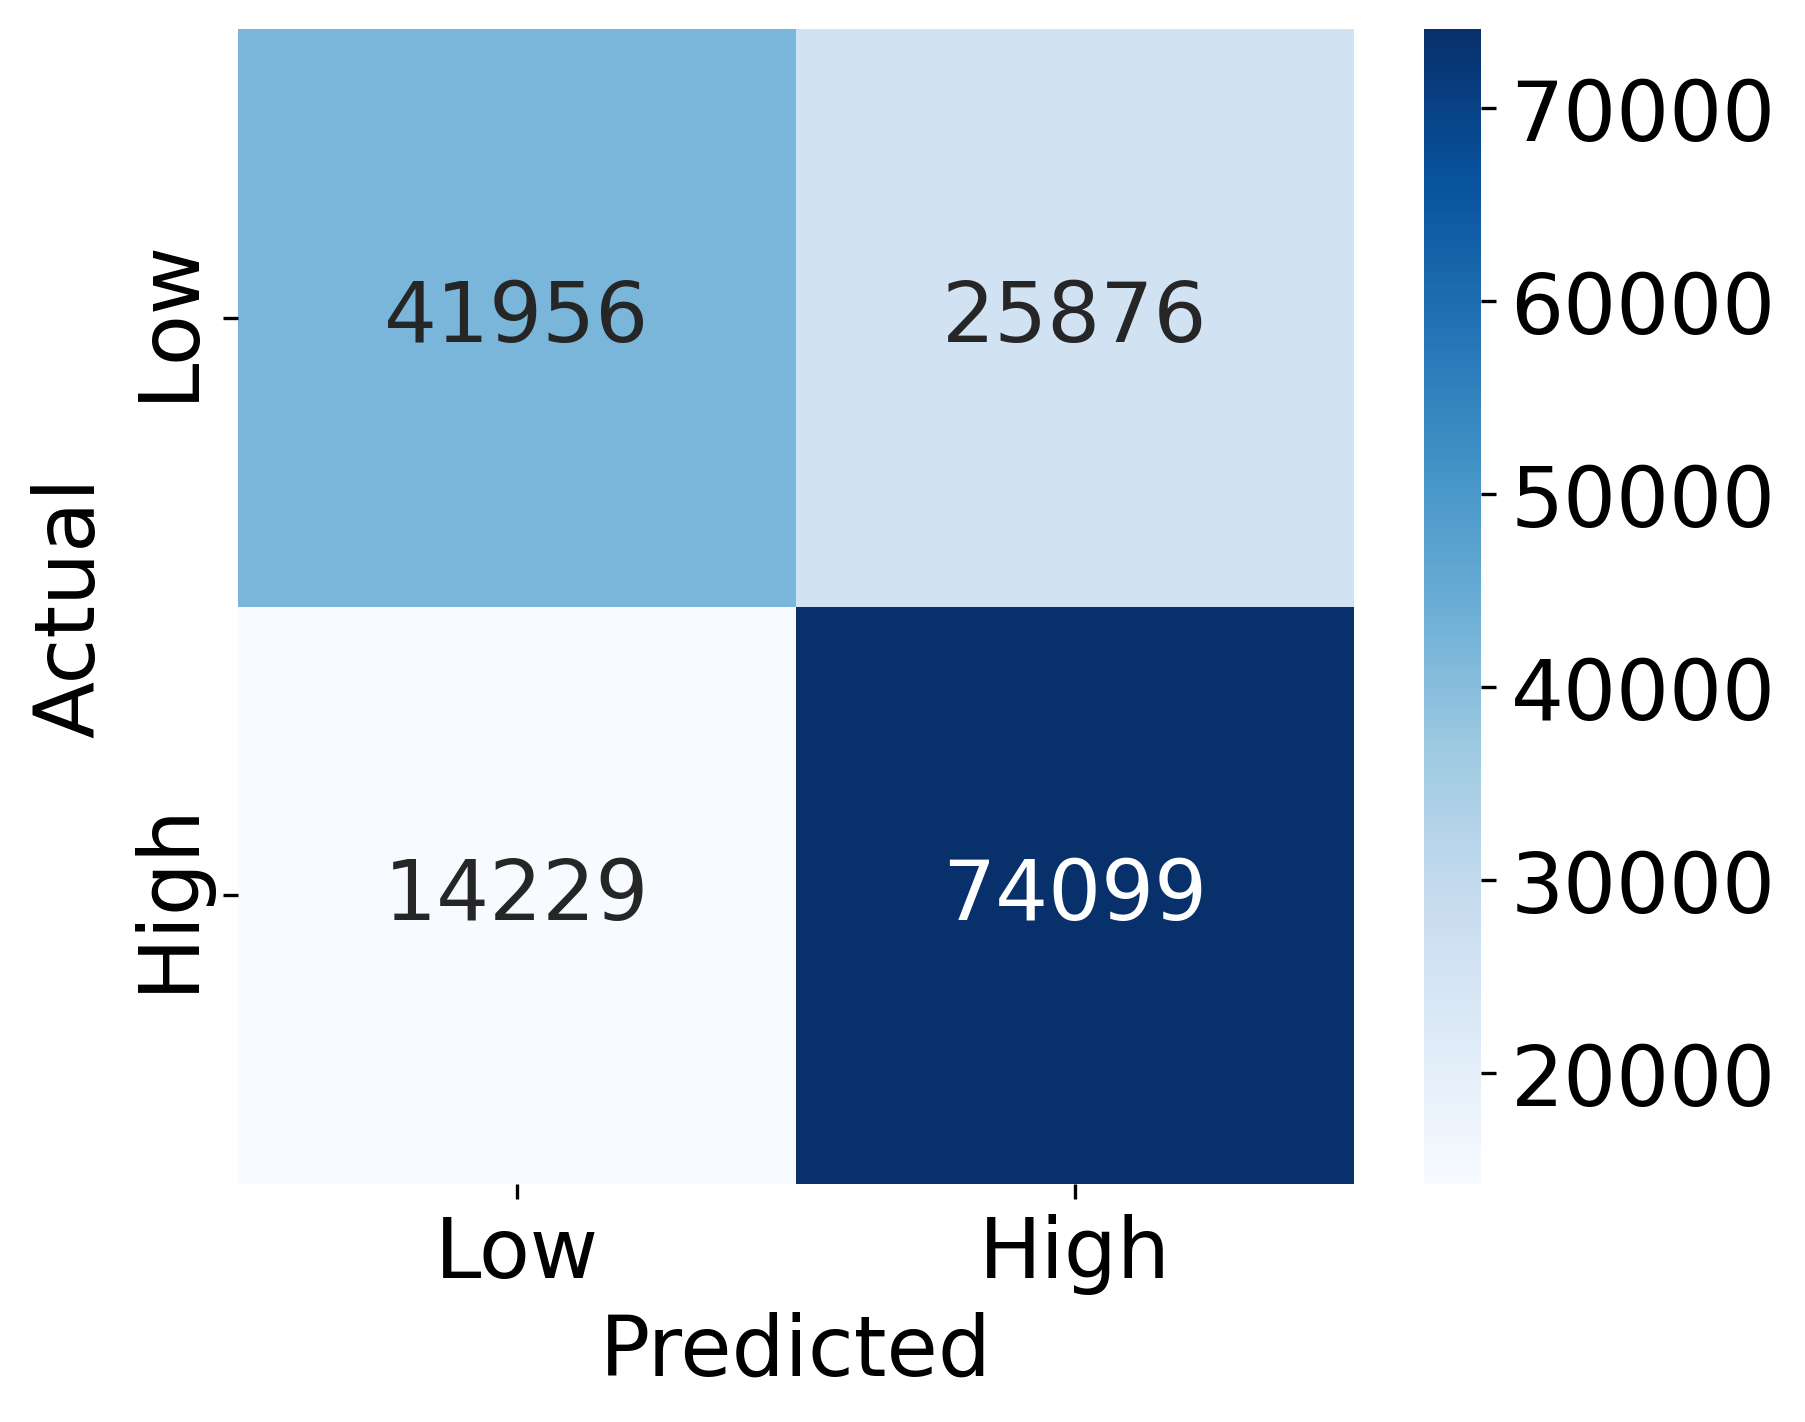

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_true and y_pred are already defined and possibly one-hot encoded
y_true = np.array(y_test)
y_pred = ANN.predict(x_test)

# If y_true or y_pred are one-hot encoded, flatten them
y_true = np.argmax(y_true, axis=1)  # Convert to label indices if one-hot encoded
y_pred = np.argmax(y_pred, axis=1)  # Convert to label indices if one-hot encoded

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix using Seaborn heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
# plt.title('Confusion Matrix')
plt.show()

4880/4880 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step


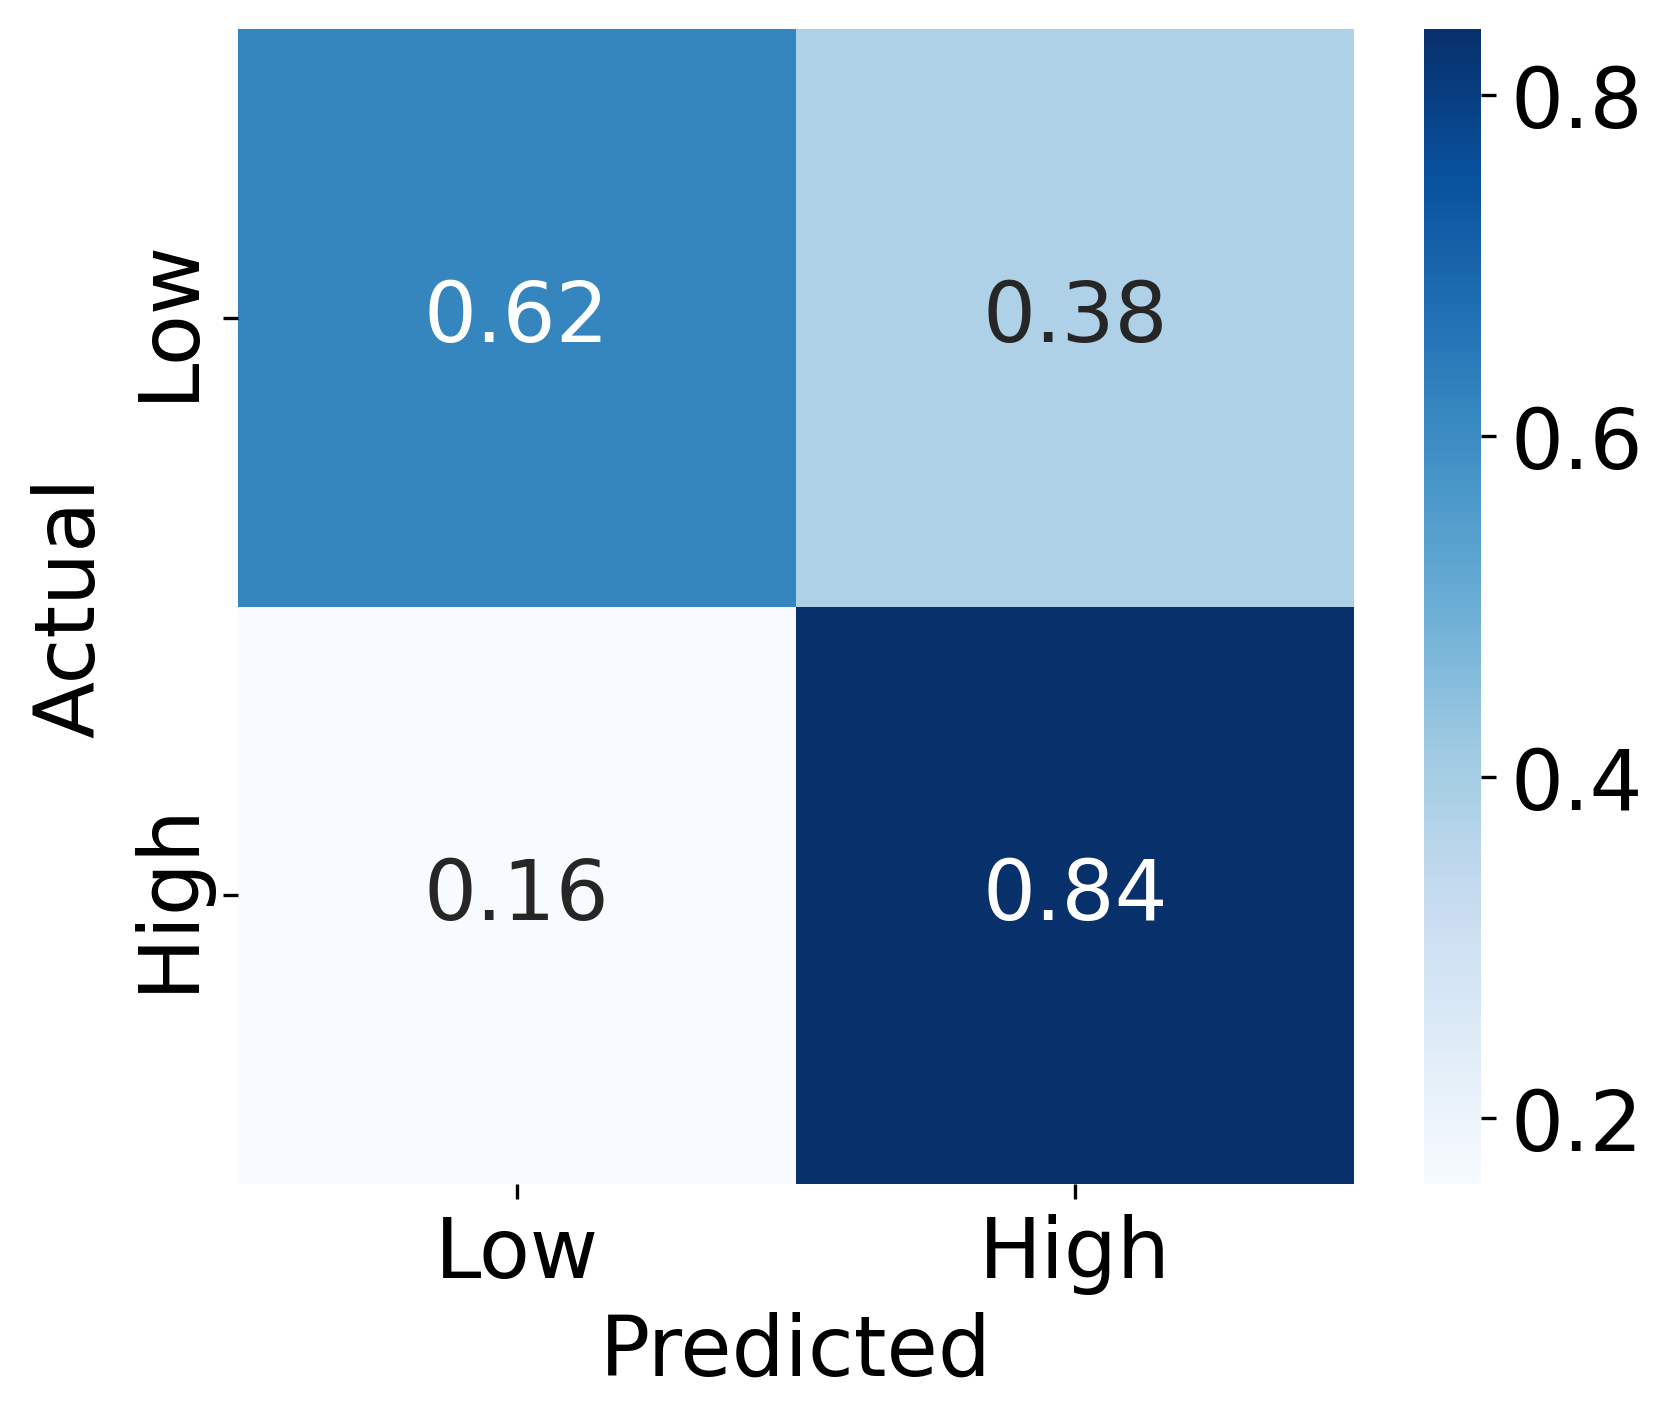

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_true and y_pred are already defined and possibly one-hot encoded
y_true = np.array(y_test)
y_pred = ANN.predict(x_test)

# If y_true or y_pred are one-hot encoded, flatten them
y_true = np.argmax(y_true, axis=1)  # Convert to label indices if one-hot encoded
y_pred = np.argmax(y_pred, axis=1)  # Convert to label indices if one-hot encoded

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot normalized confusion matrix using Seaborn heatmap
plt.figure(figsize=(6, 5))
ax = sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues',
                 xticklabels=['Low', 'High'],
                 yticklabels=['Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
#plt.title('Normalized Confusion Matrix')
plt.show()

## CNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define input shape based on X_train
input_shape = (X_train.shape[1], 1)  # Adding a single channel for CNN

# Build a simple CNN model
model = Sequential()

# Input layer with a convolutional block
model.add(Conv1D(16, kernel_size=3, activation='relu', input_shape=input_shape))
model.add(MaxPooling1D(pool_size=2))

# Flatten the features
model.add(Flatten())

# Dense hidden layer
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(2, activation='softmax'))  # Assuming 2 output classes

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)

# Train the model
H = model.fit(
    X_train, Y_train,
    batch_size=100,
    epochs=20,
    verbose=1,
    validation_data=(x_test, y_test),
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
4685/4685 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.6385 - loss: 0.6304 - val_accuracy: 0.6829 - val_loss: 0.5859
Epoch 2/20
4685/4685 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6758 - loss: 0.5899 - val_accuracy: 0.6951 - val_loss: 0.5668
Epoch 3/20
4685/4685 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6875 - loss: 0.5736 - val_accuracy: 0.7063 - val_loss: 0.5503
Epoch 4/20
4685/4685 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6957 - loss: 0.5610 - val_accuracy: 0.7082 - val_loss: 0.5434
Epoch 5/20
4685/4685 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7008 - loss: 0.5521 - val_accuracy: 0.7185 - val_loss: 0.5299
Epoch 6/20
4685/4685 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.7055 - loss: 0.5425 - val_accuracy: 0.7265 - val_loss: 0.5192
Epoch 7/20
4685/4685 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7077 - loss: 0.5364 - val_accuracy: 0.7287 - val_loss: 0.5128
Epoch 8/20
4685/4685 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.7101 - loss: 0.5320

In [ ]:

from keras.models import save_model

model.save("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/Model/Other/CNN.h5")


In [ ]:
from keras.models import load_model

CNN = load_model("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/Model/Other/CNN.h5")

In [ ]:
from keras.models import load_model

score = CNN.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4880/4880 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.7387 - loss: 0.4830
Test loss: 0.47036007046699524
Test accuracy: 0.7540791630744934


In [ ]:
y_true = np.array(y_test)
y_pred = CNN.predict(x_test)

4880/4880 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step


**Classification report of CNN model**

In [ ]:
y_pred = np.squeeze(y_pred)
y_pred = np.array(y_pred >= 0.5, dtype=int)  # Use 'int' instead of 'np.int'

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.80      0.74     67832
           1       0.82      0.72      0.77     88328

   micro avg       0.75      0.75      0.75    156160
   macro avg       0.75      0.76      0.75    156160
weighted avg       0.76      0.75      0.76    156160
 samples avg       0.75      0.75      0.75    156160



4880/4880 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step


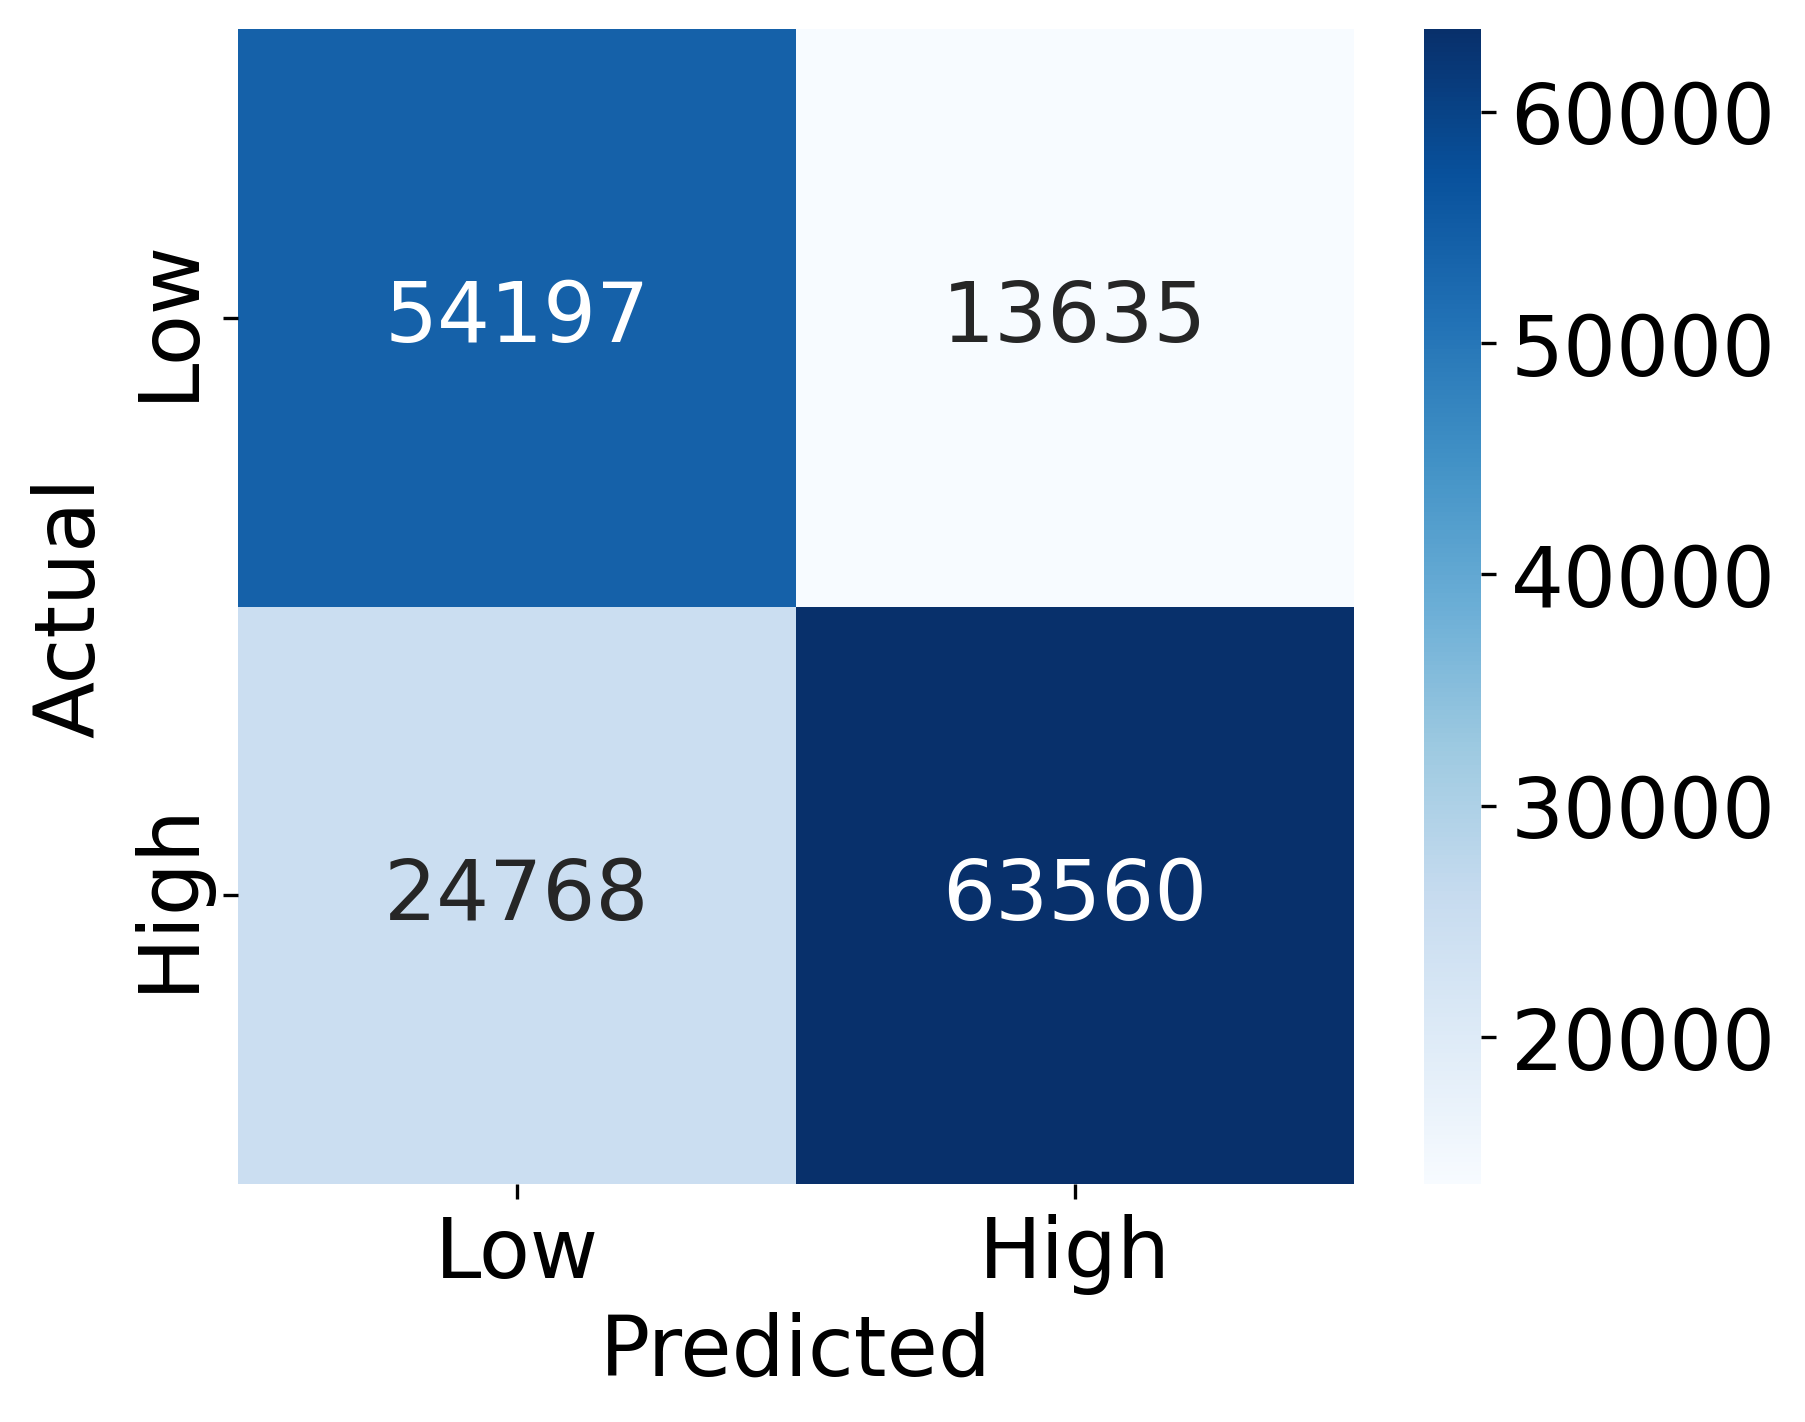

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_true and y_pred are already defined and possibly one-hot encoded
y_true = np.array(y_test)
y_pred = CNN.predict(x_test)

# If y_true or y_pred are one-hot encoded, flatten them
y_true = np.argmax(y_true, axis=1)  # Convert to label indices if one-hot encoded
y_pred = np.argmax(y_pred, axis=1)  # Convert to label indices if one-hot encoded

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix using Seaborn heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
# plt.title('Confusion Matrix')
plt.show()

4880/4880 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step


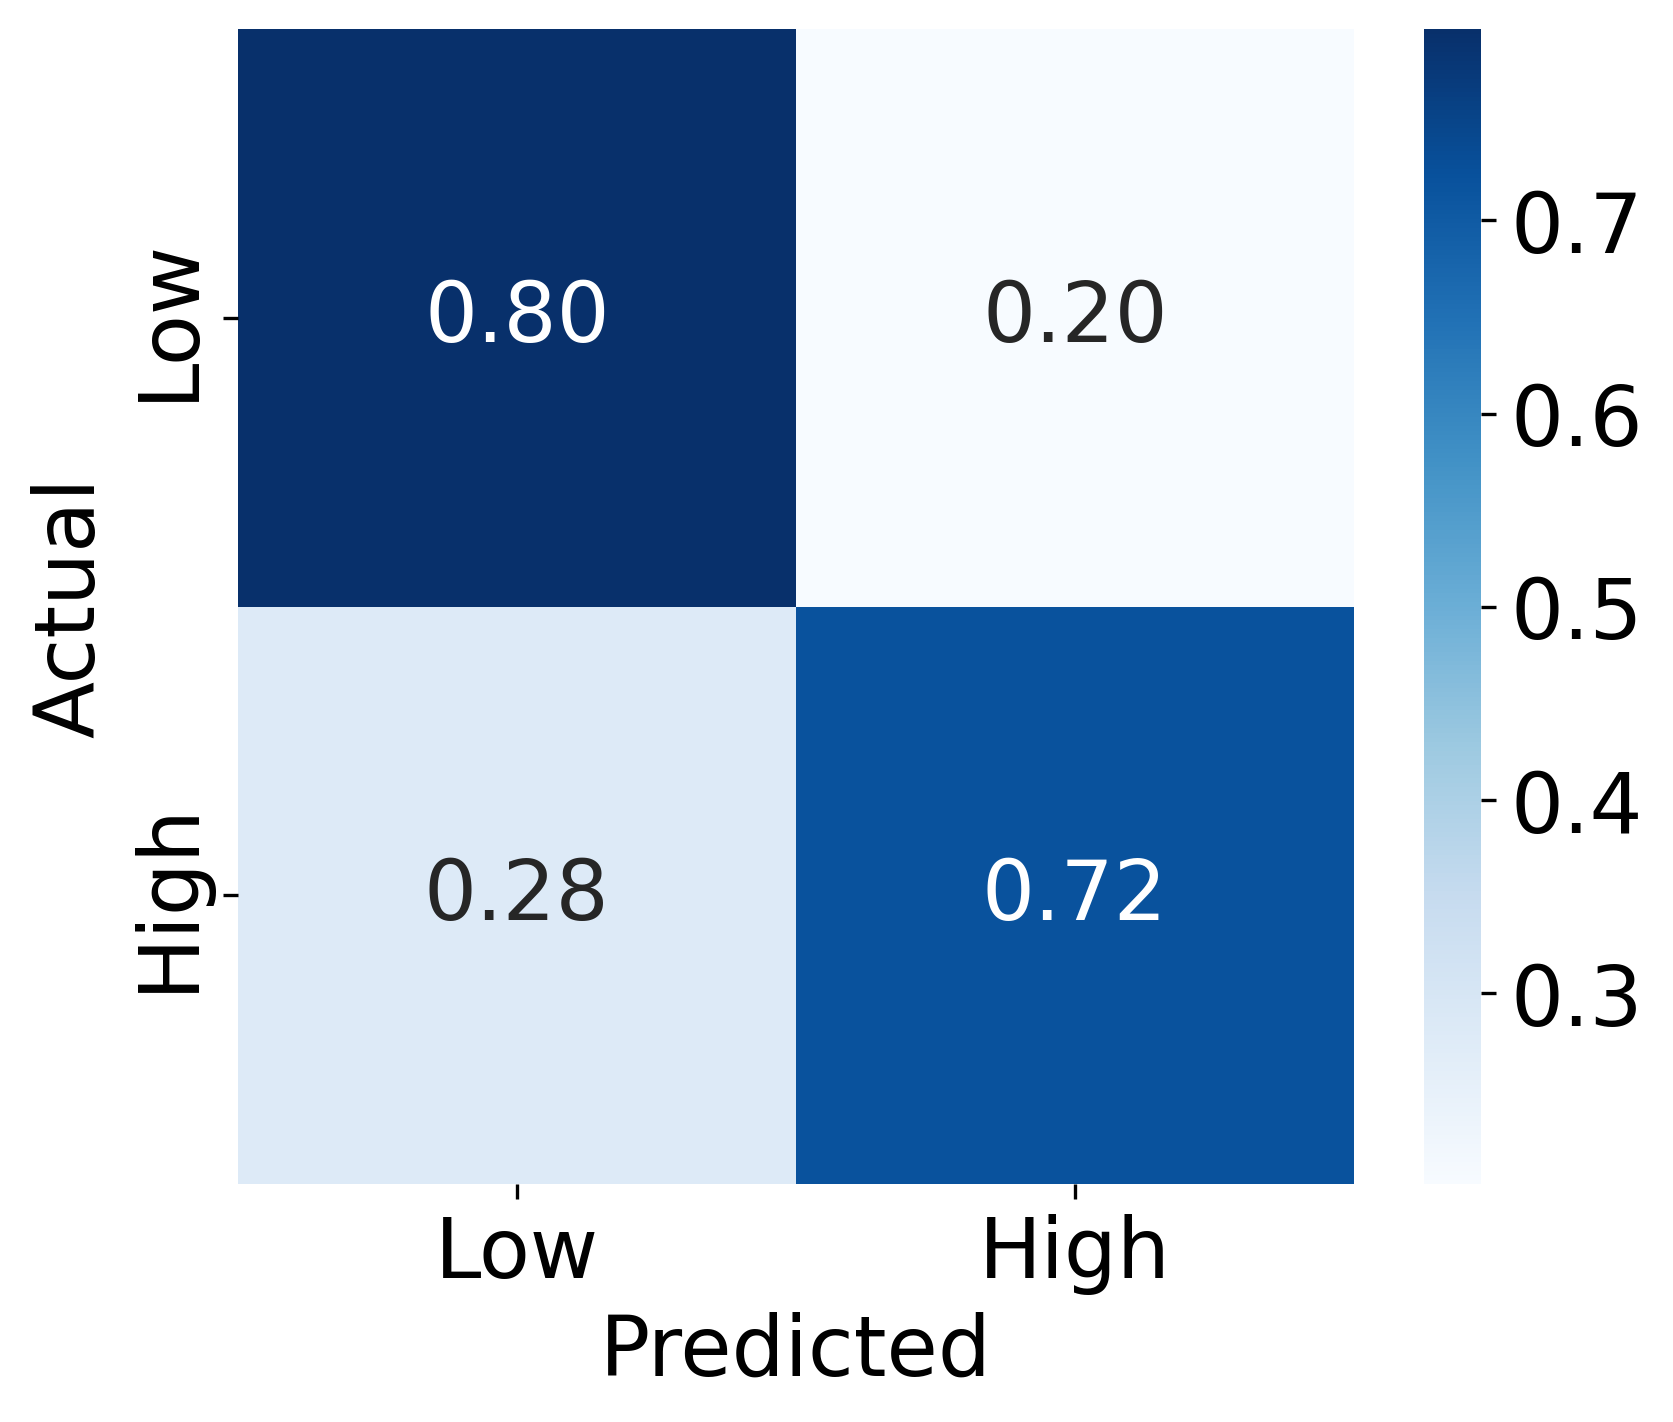

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_true and y_pred are already defined and possibly one-hot encoded
y_true = np.array(y_test)
y_pred = CNN.predict(x_test)

# If y_true or y_pred are one-hot encoded, flatten them
y_true = np.argmax(y_true, axis=1)  # Convert to label indices if one-hot encoded
y_pred = np.argmax(y_pred, axis=1)  # Convert to label indices if one-hot encoded

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot normalized confusion matrix using Seaborn heatmap
plt.figure(figsize=(6, 5))
ax = sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues',
                 xticklabels=['Low', 'High'],
                 yticklabels=['Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
#plt.title('Normalized Confusion Matrix')
plt.show()

## Atten-CNN

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Layer, Multiply
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K

# Define a custom attention layer
class AttentionLayer(Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(
            shape=(input_shape[-1], input_shape[-1]),
            initializer="glorot_uniform",
            trainable=True,
        )
        self.b = self.add_weight(
            shape=(input_shape[-1],),
            initializer="zeros",
            trainable=True,
        )
        self.u = self.add_weight(
            shape=(input_shape[-1], 1),
            initializer="glorot_uniform",
            trainable=True,
        )
        super(AttentionLayer, self).build(input_shape)

    def call(self, x):
        # Calculate the attention scores
        score = K.tanh(K.dot(x, self.W) + self.b)
        attention_weights = K.softmax(K.dot(score, self.u), axis=1)
        # Apply the attention weights to the input
        context_vector = attention_weights * x
        return K.sum(context_vector, axis=1)

# Define input shape based on X_train
input_shape = (X_train.shape[1], 1)  # Adding a single channel for CNN

# Input layer
inputs = Input(shape=input_shape)

# Convolutional Block
x = Conv1D(16, kernel_size=3, activation="relu")(inputs)
x = MaxPooling1D(pool_size=2)(x)

# Apply Attention Mechanism
attention_output = AttentionLayer()(x)

# Dense hidden layer
x = Dense(32, activation="relu")(attention_output)
x = Dropout(0.2)(x)

# Output layer
outputs = Dense(2, activation="softmax")(x)  # Assuming 2 output classes

# Build the model
model = Model(inputs, outputs)

# Compile the model
model.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(),
    metrics=["accuracy"],
)

# Train the model
H = model.fit(
    X_train,
    Y_train,
    batch_size=100,
    epochs=20,
    verbose=1,
    validation_data=(x_test, y_test),
)

Epoch 1/20
4685/4685 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.5127 - loss: 143.0191 - val_accuracy: 0.5656 - val_loss: 0.6853
Epoch 2/20
4685/4685 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.5515 - loss: 0.7041 - val_accuracy: 0.5659 - val_loss: 0.6839
Epoch 3/20
4685/4685 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.5661 - loss: 0.6844 - val_accuracy: 0.5656 - val_loss: 0.6845
Epoch 4/20
4685/4685 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.5648 - loss: 0.6848 - val_accuracy: 0.5656 - val_loss: 0.6845
Epoch 5/20
4685/4685 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.5652 - loss: 0.6847 - val_accuracy: 0.5656 - val_loss: 0.6845
Epoch 6/20
4685/4685 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.5658 - loss: 0.6845 - val_accuracy: 0.5656 - val_loss: 0.6845
Epoch 7/20
4685/4685 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.5655 - loss: 0.6845 - val_accuracy: 0.5656 - val_loss: 0.6845
Epoch 8/20
4685/4685 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.5660 - loss:

In [ ]:

from keras.models import save_model

model.save("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/Model/Other/Attn_CNN.h5")


In [ ]:
from keras.models import load_model

score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4880/4880 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.5639 - loss: 0.6850
Test loss: 0.6845805048942566
Test accuracy: 0.565625011920929


In [ ]:
y_true = np.array(y_test)
y_pred = model.predict(x_test)

4880/4880 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step


**Classification report of CNN model**

In [ ]:
y_pred = np.squeeze(y_pred)
y_pred = np.array(y_pred >= 0.5, dtype=int)  # Use 'int' instead of 'np.int'

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     67832
           1       0.57      1.00      0.72     88328

   micro avg       0.57      0.57      0.57    156160
   macro avg       0.28      0.50      0.36    156160
weighted avg       0.32      0.57      0.41    156160
 samples avg       0.57      0.57      0.57    156160



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


4880/4880 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step


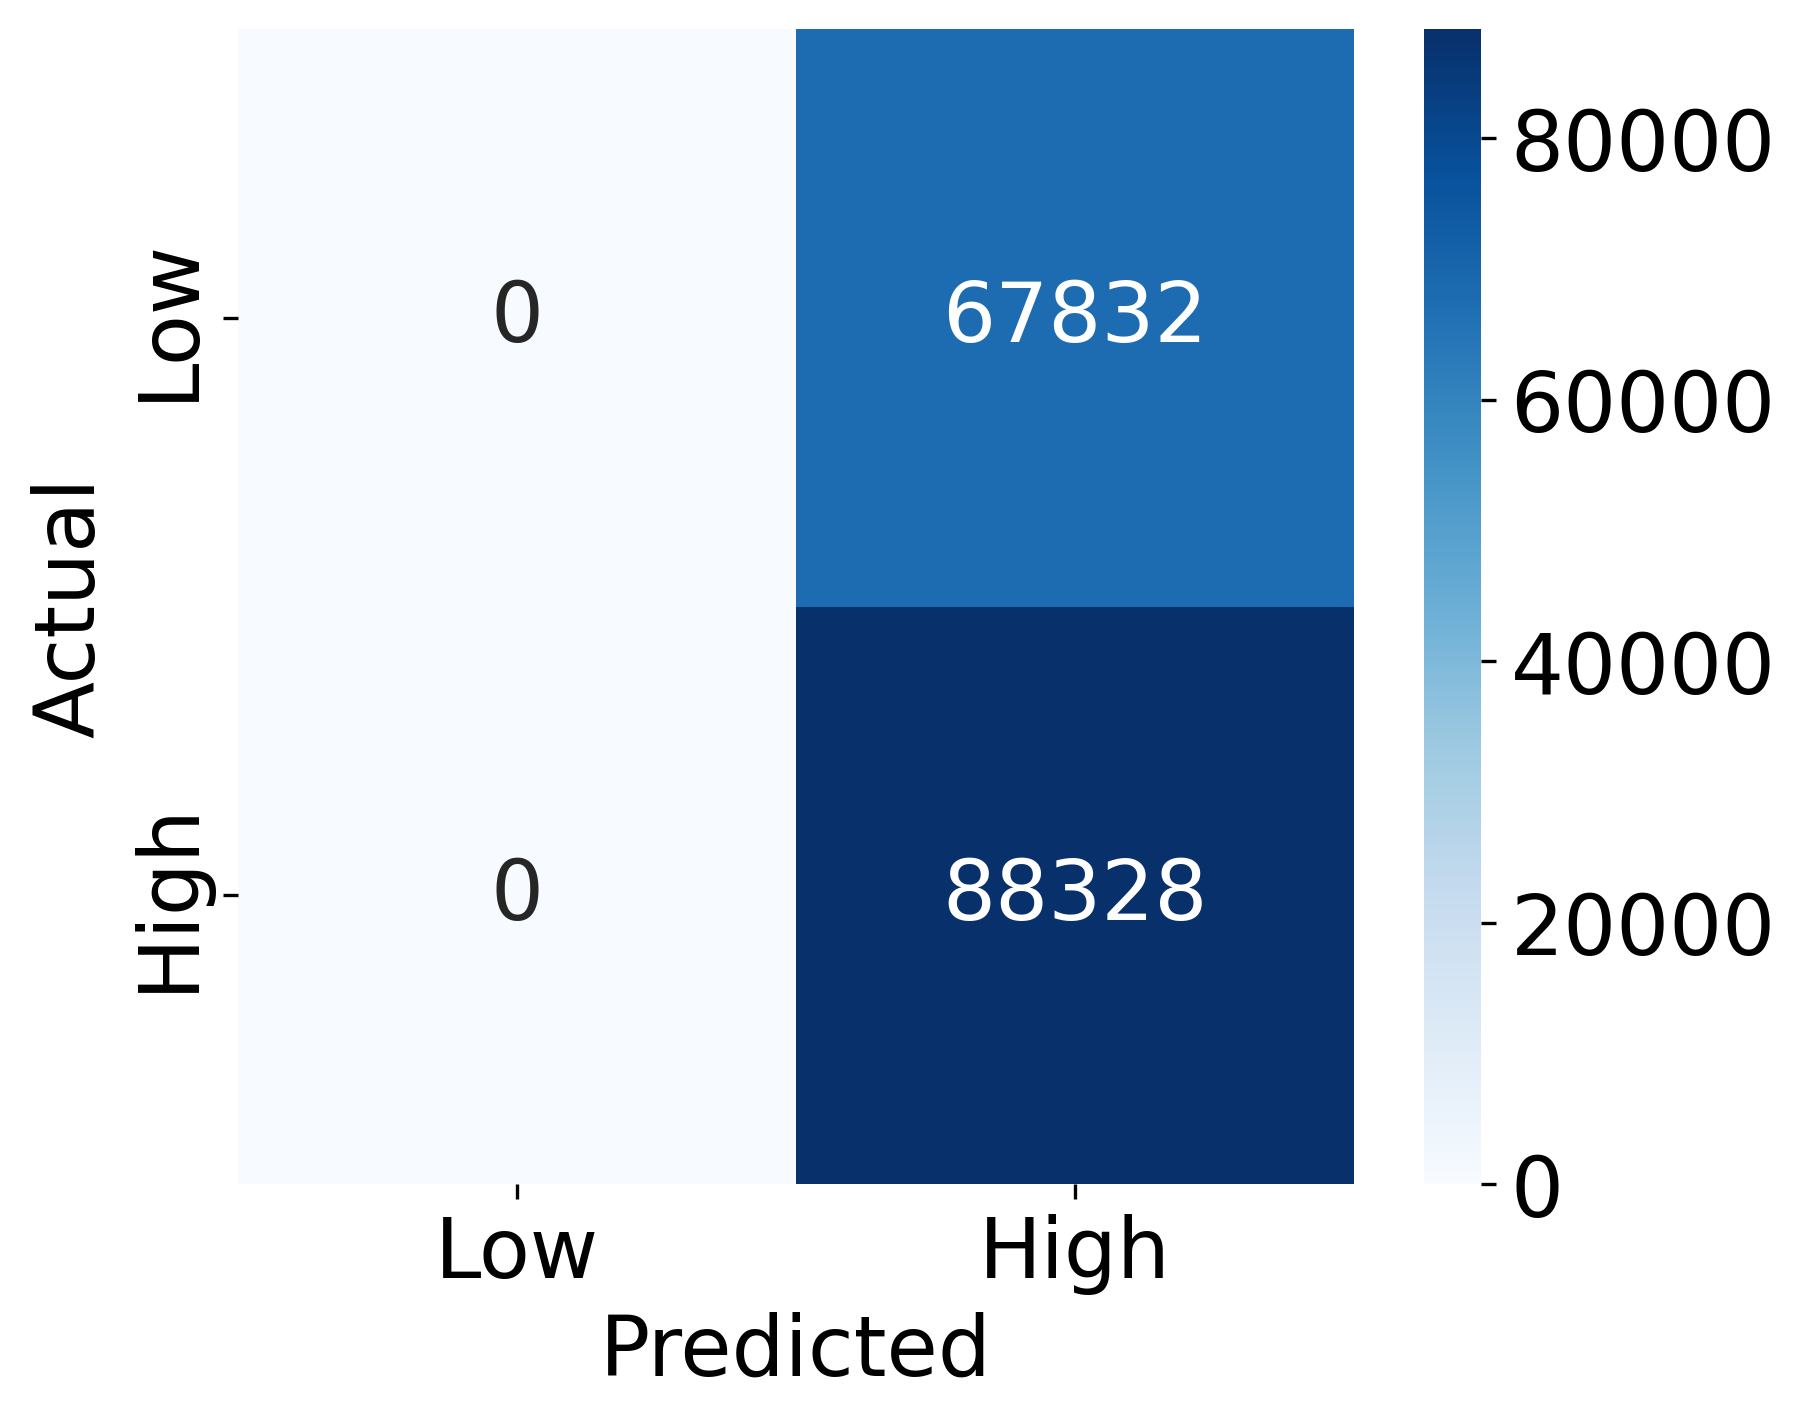

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_true and y_pred are already defined and possibly one-hot encoded
y_true = np.array(y_test)
y_pred = model.predict(x_test)

# If y_true or y_pred are one-hot encoded, flatten them
y_true = np.argmax(y_true, axis=1)  # Convert to label indices if one-hot encoded
y_pred = np.argmax(y_pred, axis=1)  # Convert to label indices if one-hot encoded

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix using Seaborn heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
# plt.title('Confusion Matrix')
plt.show()

4880/4880 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step


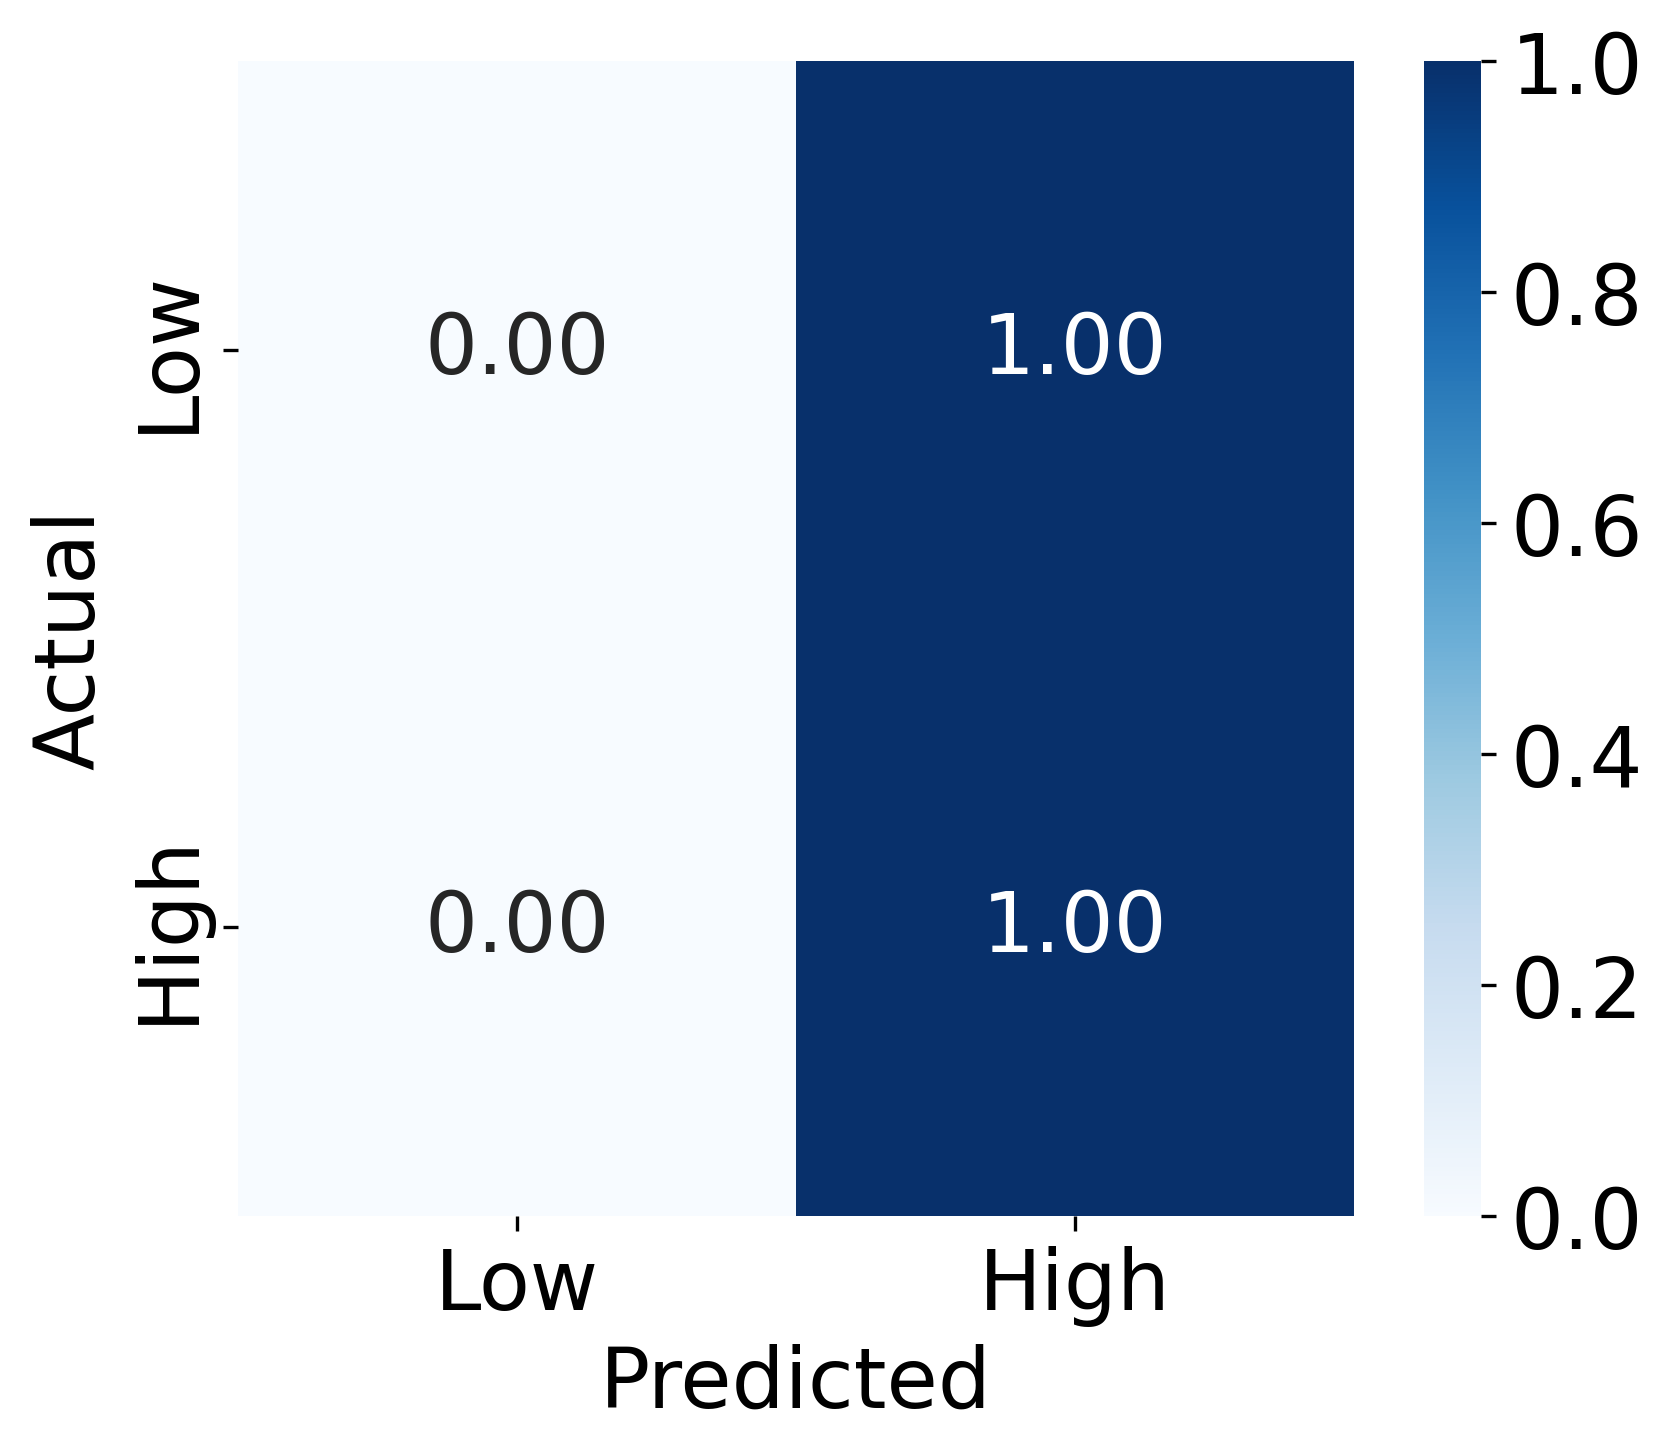

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_true and y_pred are already defined and possibly one-hot encoded
y_true = np.array(y_test)
y_pred = model.predict(x_test)

# If y_true or y_pred are one-hot encoded, flatten them
y_true = np.argmax(y_true, axis=1)  # Convert to label indices if one-hot encoded
y_pred = np.argmax(y_pred, axis=1)  # Convert to label indices if one-hot encoded

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot normalized confusion matrix using Seaborn heatmap
plt.figure(figsize=(6, 5))
ax = sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues',
                 xticklabels=['Low', 'High'],
                 yticklabels=['Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
#plt.title('Normalized Confusion Matrix')
plt.show()

## LSTM

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define input shape based on X_train
input_shape = (X_train.shape[1], X_train.shape[2])  # Assuming 3D shape for LSTM (timesteps, features)

# Build a simple LSTM model
model = Sequential()

# LSTM layer
model.add(LSTM(32, activation='tanh', return_sequences=False, input_shape=input_shape))  # Single LSTM layer

# Dense hidden layer
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(2, activation='softmax'))  # Assuming 2 output classes

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)

# Train the model
H = model.fit(
    X_train, Y_train,
    batch_size=100,
    epochs=20,
    verbose=1,
    validation_data=(x_test, y_test),
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
4685/4685 ━━━━━━━━━━━━━━━━━━━━ 53s 11ms/step - accuracy: 0.5781 - loss: 0.6779 - val_accuracy: 0.5990 - val_loss: 0.6652
Epoch 2/20
4685/4685 ━━━━━━━━━━━━━━━━━━━━ 49s 10ms/step - accuracy: 0.6027 - loss: 0.6621 - val_accuracy: 0.6097 - val_loss: 0.6502
Epoch 3/20
4685/4685 ━━━━━━━━━━━━━━━━━━━━ 50s 11ms/step - accuracy: 0.6114 - loss: 0.6519 - val_accuracy: 0.6095 - val_loss: 0.6504
Epoch 4/20
4685/4685 ━━━━━━━━━━━━━━━━━━━━ 50s 11ms/step - accuracy: 0.6153 - loss: 0.6465 - val_accuracy: 0.6258 - val_loss: 0.6375
Epoch 5/20
4685/4685 ━━━━━━━━━━━━━━━━━━━━ 49s 10ms/step - accuracy: 0.6200 - loss: 0.6427 - val_accuracy: 0.6294 - val_loss: 0.6338
Epoch 6/20
4685/4685 ━━━━━━━━━━━━━━━━━━━━ 49s 10ms/step - accuracy: 0.6271 - loss: 0.6365 - val_accuracy: 0.6301 - val_loss: 0.6315
Epoch 7/20
4685/4685 ━━━━━━━━━━━━━━━━━━━━ 49s 10ms/step - accuracy: 0.6301 - loss: 0.6328 - val_accuracy: 0.6365 - val_loss: 0.6261
Epoch 8/20
4685/4685 ━━━━━━━━━━━━━━━━━━━━ 49s 10ms/step - accuracy: 0.6347 -

In [ ]:

from keras.models import save_model

model.save("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/Model/Other/LSTM.h5")


In [ ]:
from keras.models import load_model

LSTM = load_model("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/Model/Other/LSTM.h5")

In [ ]:
from keras.models import load_model

score = LSTM.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4880/4880 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.6636 - loss: 0.5947
Test loss: 0.5897848606109619
Test accuracy: 0.6721119284629822


In [ ]:
y_true = np.array(y_test)
y_pred = LSTM.predict(x_test)

4880/4880 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step


**Classification report of CNN model**

In [ ]:
y_pred = np.squeeze(y_pred)
y_pred = np.array(y_pred >= 0.5, dtype=int)  # Use 'int' instead of 'np.int'

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.54      0.59     67832
           1       0.69      0.77      0.73     88328

   micro avg       0.67      0.67      0.67    156160
   macro avg       0.67      0.66      0.66    156160
weighted avg       0.67      0.67      0.67    156160
 samples avg       0.67      0.67      0.67    156160



4880/4880 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step


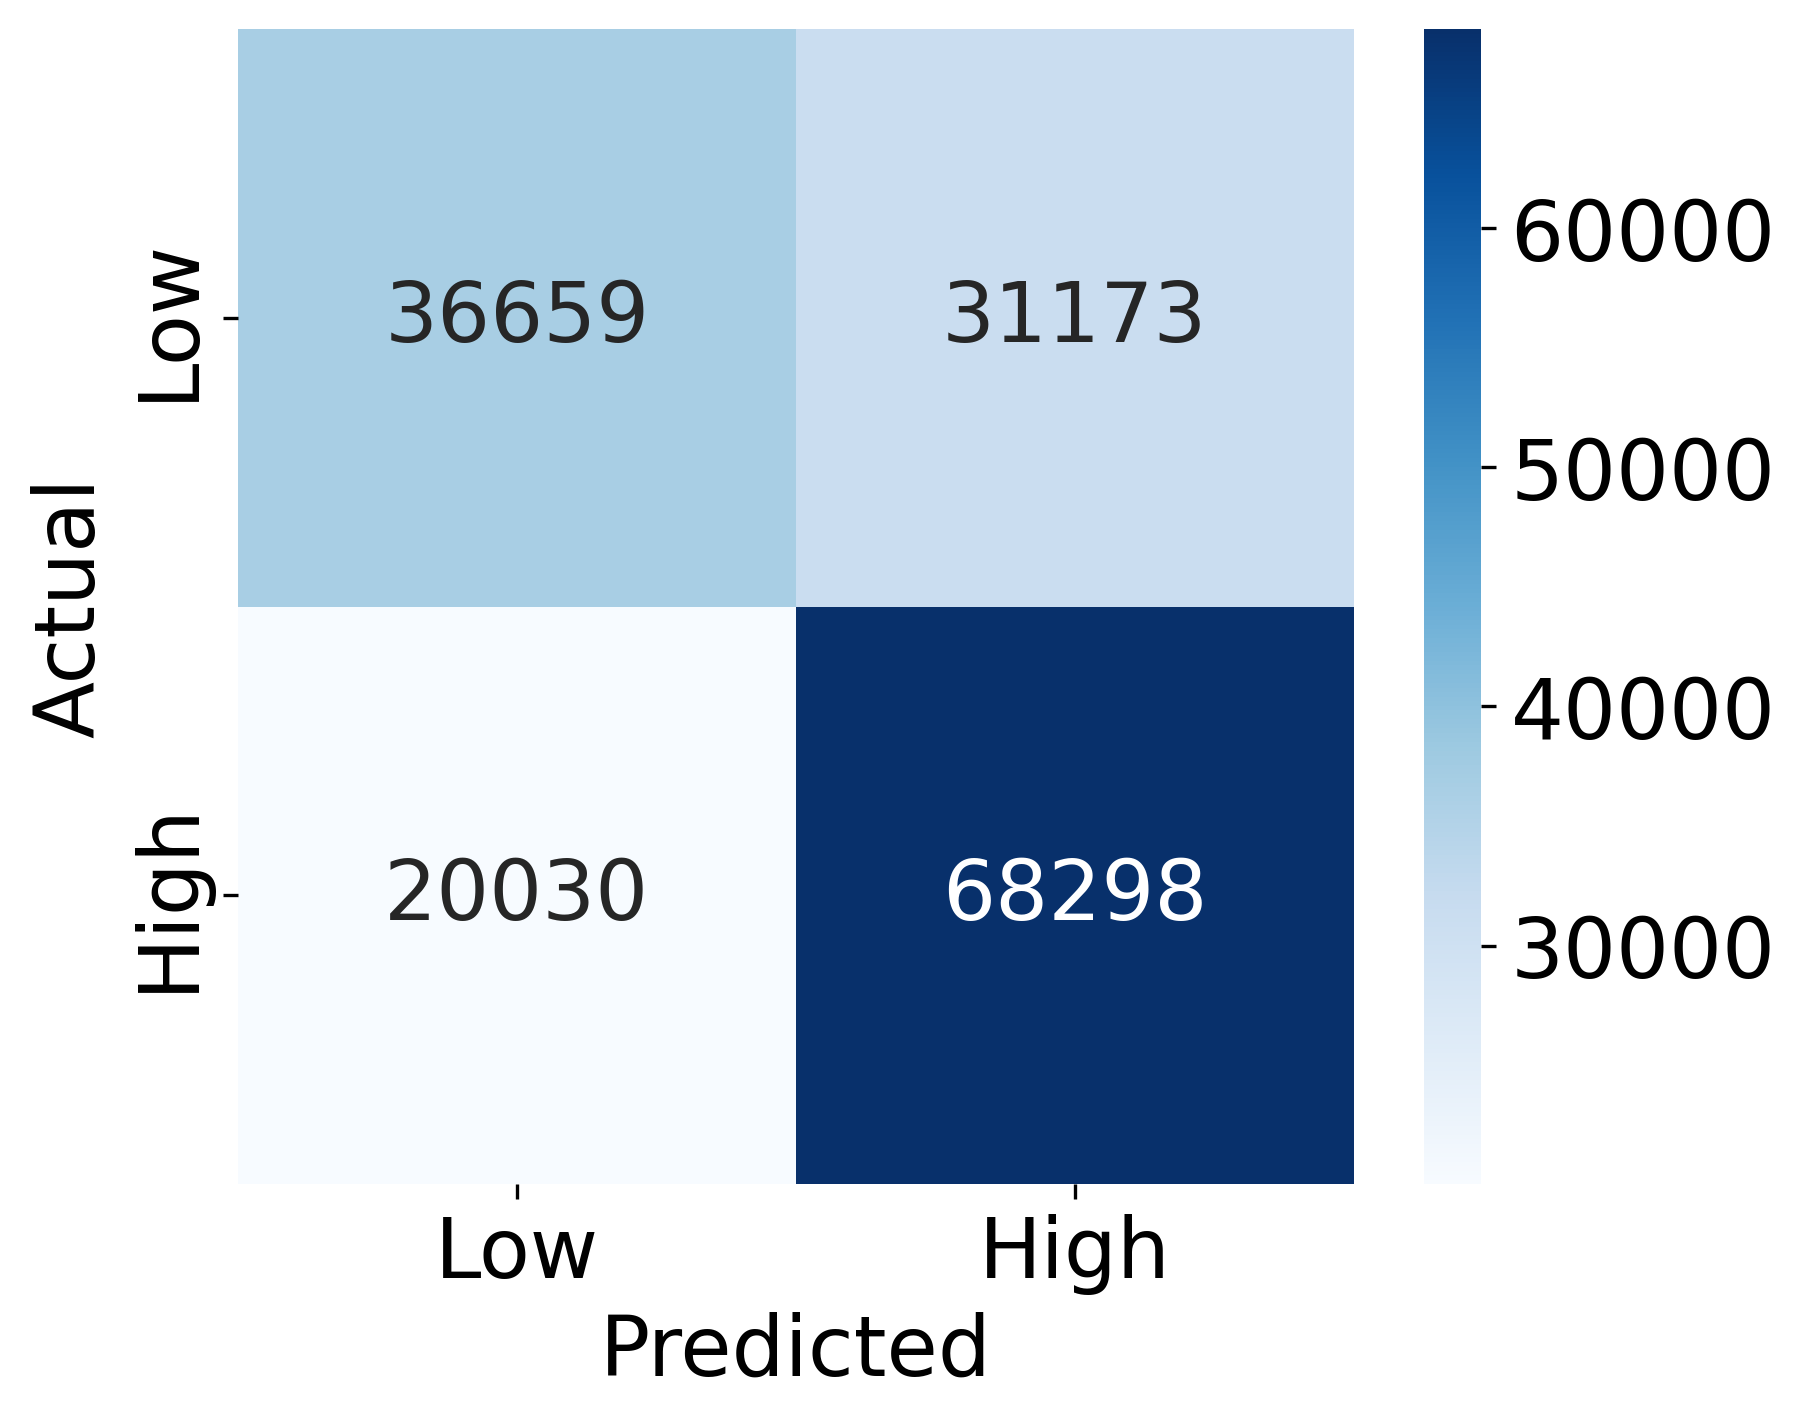

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_true and y_pred are already defined and possibly one-hot encoded
y_true = np.array(y_test)
y_pred = LSTM.predict(x_test)

# If y_true or y_pred are one-hot encoded, flatten them
y_true = np.argmax(y_true, axis=1)  # Convert to label indices if one-hot encoded
y_pred = np.argmax(y_pred, axis=1)  # Convert to label indices if one-hot encoded

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix using Seaborn heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
# plt.title('Confusion Matrix')
plt.show()

4880/4880 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step


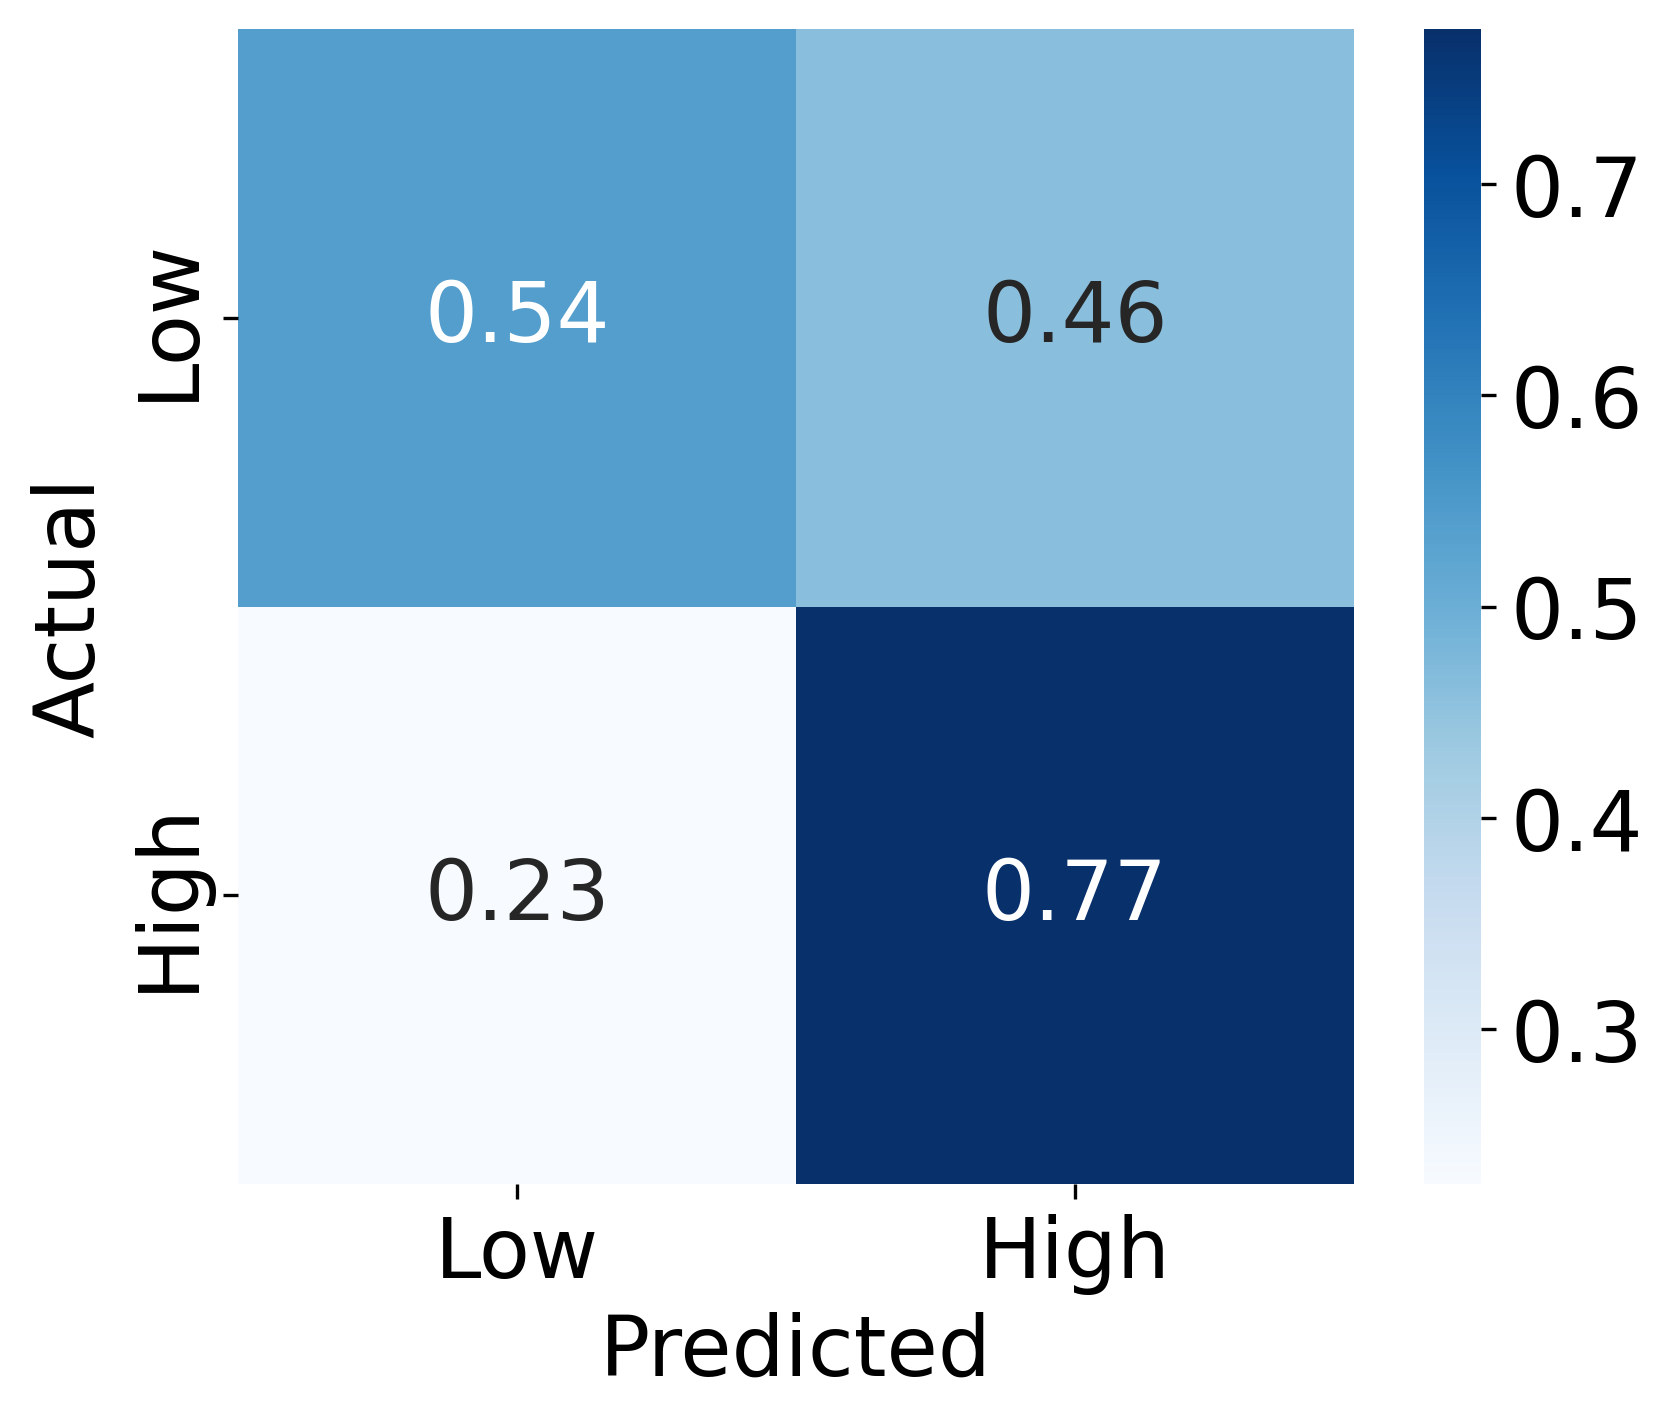

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_true and y_pred are already defined and possibly one-hot encoded
y_true = np.array(y_test)
y_pred = LSTM.predict(x_test)

# If y_true or y_pred are one-hot encoded, flatten them
y_true = np.argmax(y_true, axis=1)  # Convert to label indices if one-hot encoded
y_pred = np.argmax(y_pred, axis=1)  # Convert to label indices if one-hot encoded

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot normalized confusion matrix using Seaborn heatmap
plt.figure(figsize=(6, 5))
ax = sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues',
                 xticklabels=['Low', 'High'],
                 yticklabels=['Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
#plt.title('Normalized Confusion Matrix')
plt.show()

## GRU

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define input shape based on X_train
input_shape = (X_train.shape[1], X_train.shape[2])  # Assuming 3D shape for GRU (timesteps, features)

# Build a simple GRU model
model = Sequential()

# GRU layer
model.add(GRU(32, activation='tanh', return_sequences=False, input_shape=input_shape))  # Single GRU layer

# Dense hidden layer
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(2, activation='softmax'))  # Assuming 2 output classes

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)

# Train the model
H = model.fit(
    X_train, Y_train,
    batch_size=100,
    epochs=20,
    verbose=1,
    validation_data=(x_test, y_test),
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
4685/4685 ━━━━━━━━━━━━━━━━━━━━ 52s 11ms/step - accuracy: 0.5656 - loss: 0.6822 - val_accuracy: 0.5738 - val_loss: 0.6785
Epoch 2/20
4685/4685 ━━━━━━━━━━━━━━━━━━━━ 50s 11ms/step - accuracy: 0.5818 - loss: 0.6753 - val_accuracy: 0.5908 - val_loss: 0.6678
Epoch 3/20
4685/4685 ━━━━━━━━━━━━━━━━━━━━ 49s 10ms/step - accuracy: 0.6021 - loss: 0.6613 - val_accuracy: 0.6125 - val_loss: 0.6505
Epoch 4/20
4685/4685 ━━━━━━━━━━━━━━━━━━━━ 50s 11ms/step - accuracy: 0.6202 - loss: 0.6486 - val_accuracy: 0.6315 - val_loss: 0.6375
Epoch 5/20
4685/4685 ━━━━━━━━━━━━━━━━━━━━ 51s 11ms/step - accuracy: 0.6321 - loss: 0.6371 - val_accuracy: 0.6449 - val_loss: 0.6254
Epoch 6/20
4685/4685 ━━━━━━━━━━━━━━━━━━━━ 49s 10ms/step - accuracy: 0.6413 - loss: 0.6275 - val_accuracy: 0.6495 - val_loss: 0.6192
Epoch 7/20
4685/4685 ━━━━━━━━━━━━━━━━━━━━ 49s 10ms/step - accuracy: 0.6491 - loss: 0.6203 - val_accuracy: 0.6523 - val_loss: 0.6152
Epoch 8/20
4685/4685 ━━━━━━━━━━━━━━━━━━━━ 49s 10ms/step - accuracy: 0.6524 -

In [ ]:

from keras.models import save_model

model.save("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/Model/Other/GRU.h5")


In [ ]:
from keras.models import load_model

GRU = load_model("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/Model/Other/GRU.h5")

In [ ]:
from keras.models import load_model

score = GRU.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4880/4880 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.6837 - loss: 0.5797
Test loss: 0.5811702013015747
Test accuracy: 0.6833568215370178


In [ ]:
y_true = np.array(y_test)
y_pred = GRU.predict(x_test)

4880/4880 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step


**Classification report of CNN model**

In [ ]:
y_pred = np.squeeze(y_pred)
y_pred = np.array(y_pred >= 0.5, dtype=int)  # Use 'int' instead of 'np.int'

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.50      0.58     67832
           1       0.68      0.83      0.75     88328

   micro avg       0.68      0.68      0.68    156160
   macro avg       0.68      0.66      0.66    156160
weighted avg       0.68      0.68      0.67    156160
 samples avg       0.68      0.68      0.68    156160



4880/4880 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step


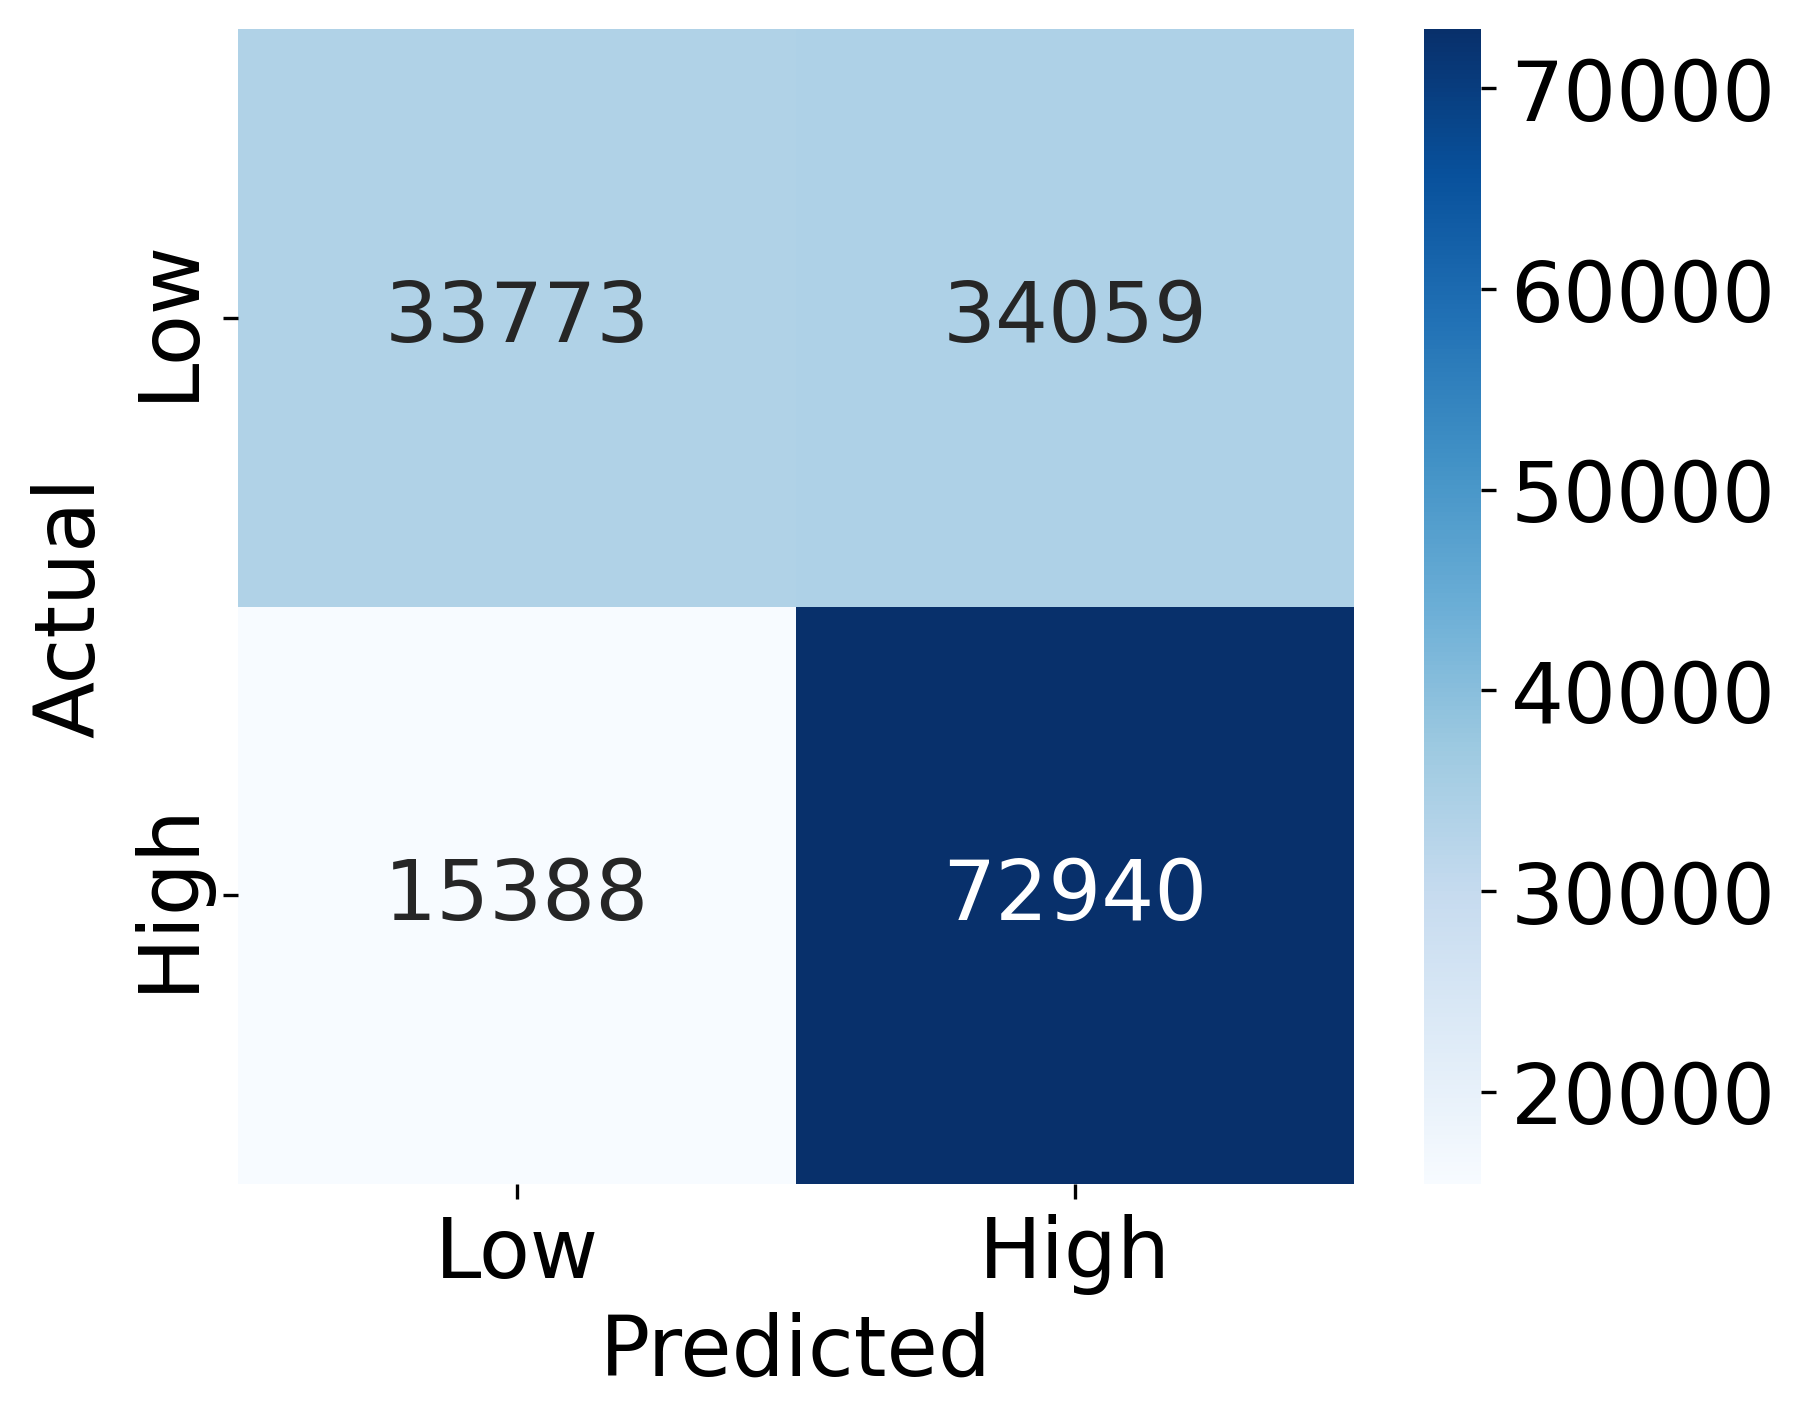

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_true and y_pred are already defined and possibly one-hot encoded
y_true = np.array(y_test)
y_pred = GRU.predict(x_test)

# If y_true or y_pred are one-hot encoded, flatten them
y_true = np.argmax(y_true, axis=1)  # Convert to label indices if one-hot encoded
y_pred = np.argmax(y_pred, axis=1)  # Convert to label indices if one-hot encoded

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix using Seaborn heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
# plt.title('Confusion Matrix')
plt.show()

4880/4880 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step


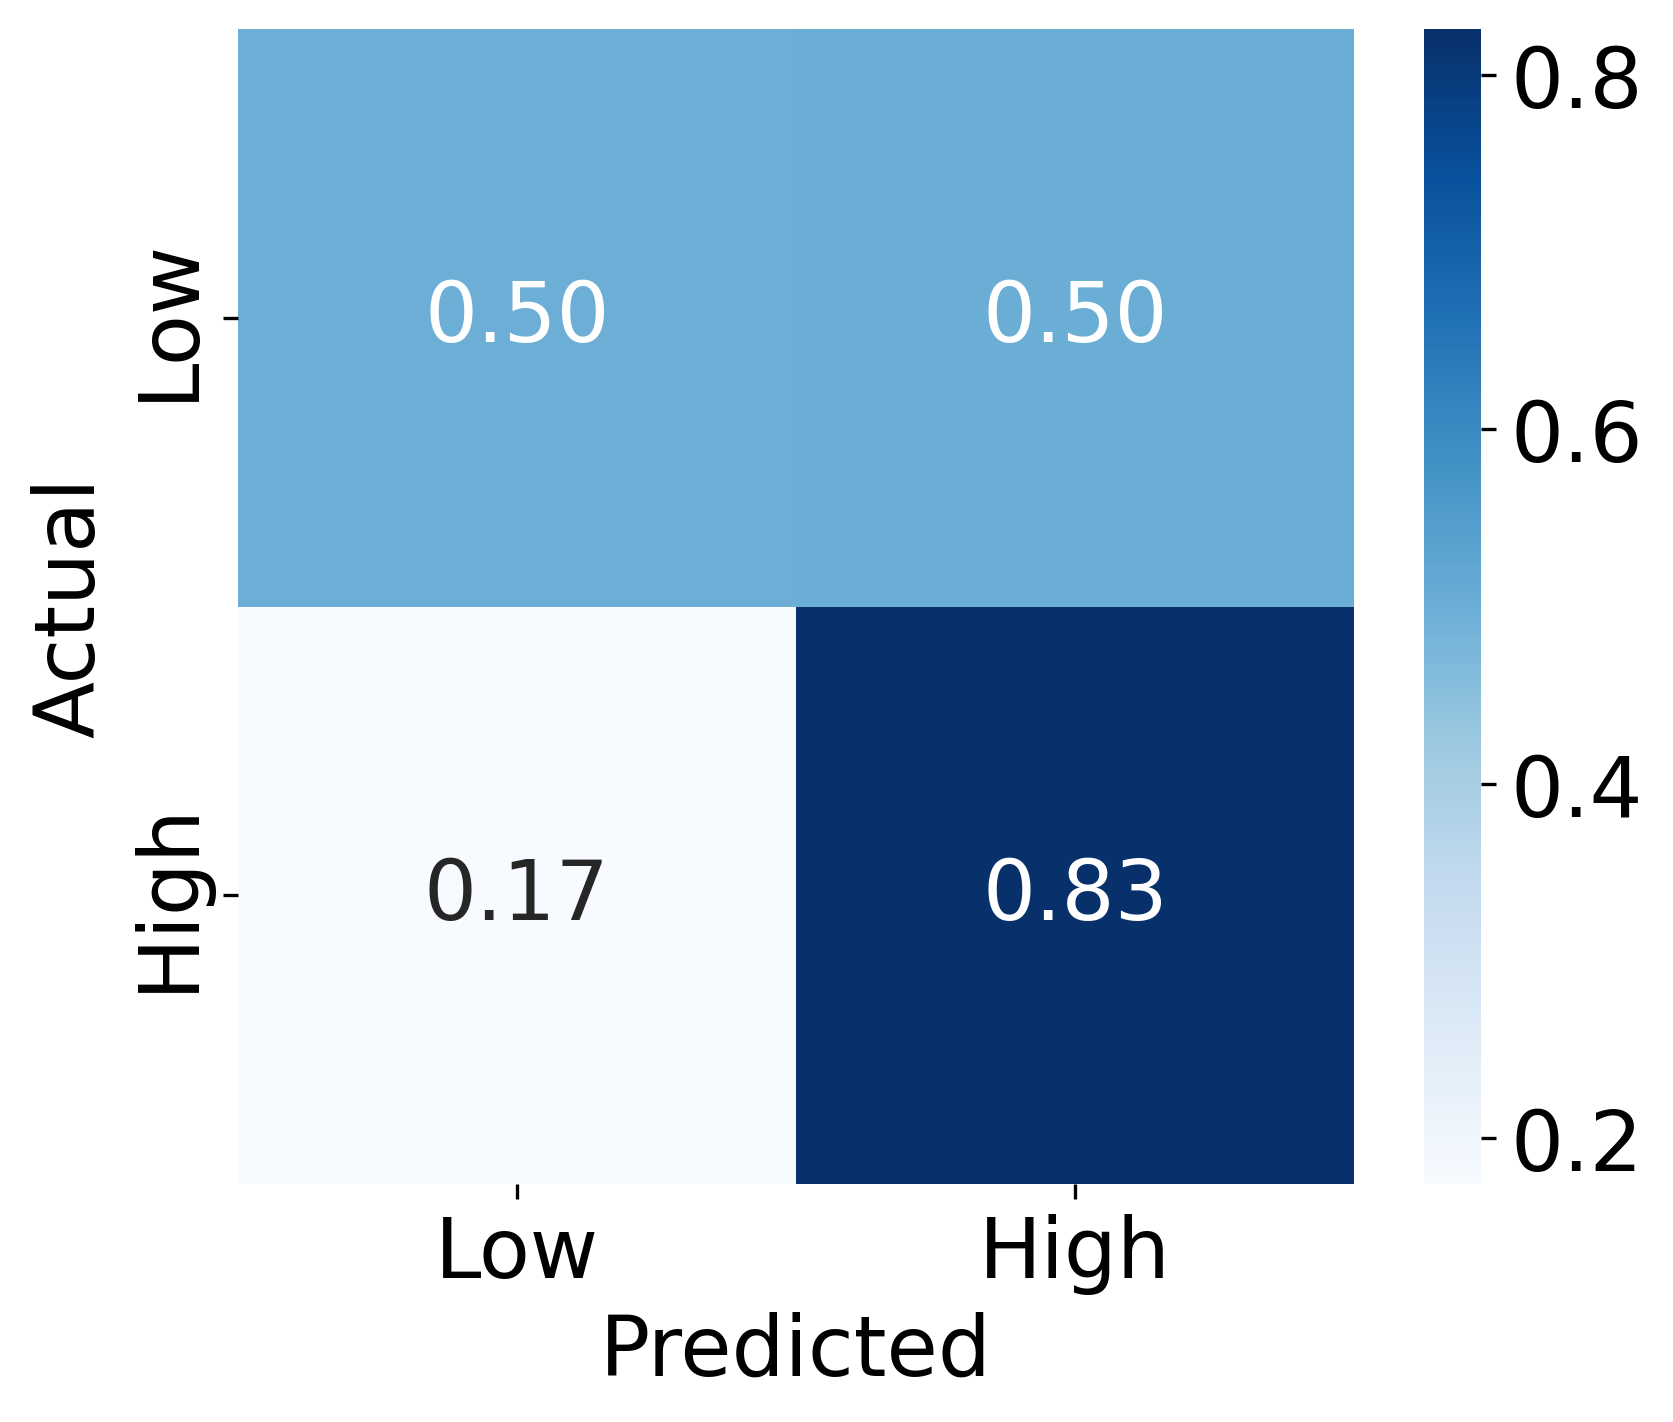

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_true and y_pred are already defined and possibly one-hot encoded
y_true = np.array(y_test)
y_pred = GRU.predict(x_test)

# If y_true or y_pred are one-hot encoded, flatten them
y_true = np.argmax(y_true, axis=1)  # Convert to label indices if one-hot encoded
y_pred = np.argmax(y_pred, axis=1)  # Convert to label indices if one-hot encoded

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot normalized confusion matrix using Seaborn heatmap
plt.figure(figsize=(6, 5))
ax = sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues',
                 xticklabels=['Low', 'High'],
                 yticklabels=['Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
#plt.title('Normalized Confusion Matrix')
plt.show()

## TMF

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, LayerNormalization, MultiHeadAttention, Flatten
from tensorflow.keras.models import Model

# Define the Transformer block
def transformer_block(inputs, head_size, num_heads, ff_dim, dropout=0.1):
    # Multi-Head Attention
    attention_output = MultiHeadAttention(num_heads=num_heads, key_dim=head_size)(inputs, inputs)
    attention_output = Dropout(dropout)(attention_output)
    attention_output = LayerNormalization(epsilon=1e-6)(attention_output + inputs)  # Residual connection

    # Feed-Forward Network
    ffn_output = Dense(ff_dim, activation="relu")(attention_output)
    ffn_output = Dense(inputs.shape[-1])(ffn_output)
    ffn_output = Dropout(dropout)(ffn_output)
    return LayerNormalization(epsilon=1e-6)(ffn_output + attention_output)  # Residual connection

# Define the TMF Transformer Model
def create_tmf_model(input_shape, head_size=64, num_heads=2, ff_dim=64, num_transformer_blocks=2, mlp_units=[32], dropout=0.1, num_classes=2):
    inputs = Input(shape=input_shape)
    x = inputs

    # Transformer blocks
    for _ in range(num_transformer_blocks):
        x = transformer_block(x, head_size, num_heads, ff_dim, dropout)

    # Flatten for classification
    x = Flatten()(x)

    # Dense MLP layers
    for units in mlp_units:
        x = Dense(units, activation="relu")(x)
        x = Dropout(dropout)(x)

    # Output layer
    outputs = Dense(num_classes, activation="softmax")(x)

    # Create model
    model = Model(inputs, outputs)
    return model

# Define input shape
input_shape = (X_train.shape[1], X_train.shape[2])  # (timesteps, features)

# Create the TMF model
model = create_tmf_model(
    input_shape=input_shape,
    head_size=64,          # Size of attention head
    num_heads=2,           # Number of attention heads
    ff_dim=64,             # Feed-forward network dimension
    num_transformer_blocks=2,  # Number of transformer blocks
    mlp_units=[32],        # Dense layer units
    dropout=0.1,           # Dropout rate
    num_classes=2          # Number of output classes
)

# Compile the model
model.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    metrics=["accuracy"]
)

# Train the model
H = model.fit(
    X_train, Y_train,
    batch_size=64,
    epochs=20,
    validation_data=(x_test, y_test),
    verbose=1
)

Epoch 1/20
7320/7320 ━━━━━━━━━━━━━━━━━━━━ 49s 4ms/step - accuracy: 0.5659 - loss: 0.6850 - val_accuracy: 0.5656 - val_loss: 0.6846
Epoch 2/20
7320/7320 ━━━━━━━━━━━━━━━━━━━━ 26s 4ms/step - accuracy: 0.5654 - loss: 0.6846 - val_accuracy: 0.5656 - val_loss: 0.6845
Epoch 3/20
7320/7320 ━━━━━━━━━━━━━━━━━━━━ 26s 4ms/step - accuracy: 0.5657 - loss: 0.6845 - val_accuracy: 0.5656 - val_loss: 0.6845
Epoch 4/20
7320/7320 ━━━━━━━━━━━━━━━━━━━━ 26s 4ms/step - accuracy: 0.5653 - loss: 0.6846 - val_accuracy: 0.5656 - val_loss: 0.6845
Epoch 5/20
7320/7320 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - accuracy: 0.5657 - loss: 0.6845 - val_accuracy: 0.5656 - val_loss: 0.6846
Epoch 6/20
7320/7320 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - accuracy: 0.5654 - loss: 0.6846 - val_accuracy: 0.5656 - val_loss: 0.6845
Epoch 7/20
7320/7320 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - accuracy: 0.5661 - loss: 0.6844 - val_accuracy: 0.5656 - val_loss: 0.6845
Epoch 8/20
7320/7320 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - accuracy: 0.5673 - loss: 0

In [ ]:

from keras.models import save_model

model.save("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/Model/Other/TMF.h5")


In [ ]:
from keras.models import load_model

score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4880/4880 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.5639 - loss: 0.6850
Test loss: 0.6845013499259949
Test accuracy: 0.565625011920929


In [ ]:
y_true = np.array(y_test)
y_pred = model.predict(x_test)

4880/4880 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step


**Classification report of CNN model**

In [ ]:
y_pred = np.squeeze(y_pred)
y_pred = np.array(y_pred >= 0.5, dtype=int)  # Use 'int' instead of 'np.int'

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     67832
           1       0.57      1.00      0.72     88328

   micro avg       0.57      0.57      0.57    156160
   macro avg       0.28      0.50      0.36    156160
weighted avg       0.32      0.57      0.41    156160
 samples avg       0.57      0.57      0.57    156160



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


4880/4880 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step


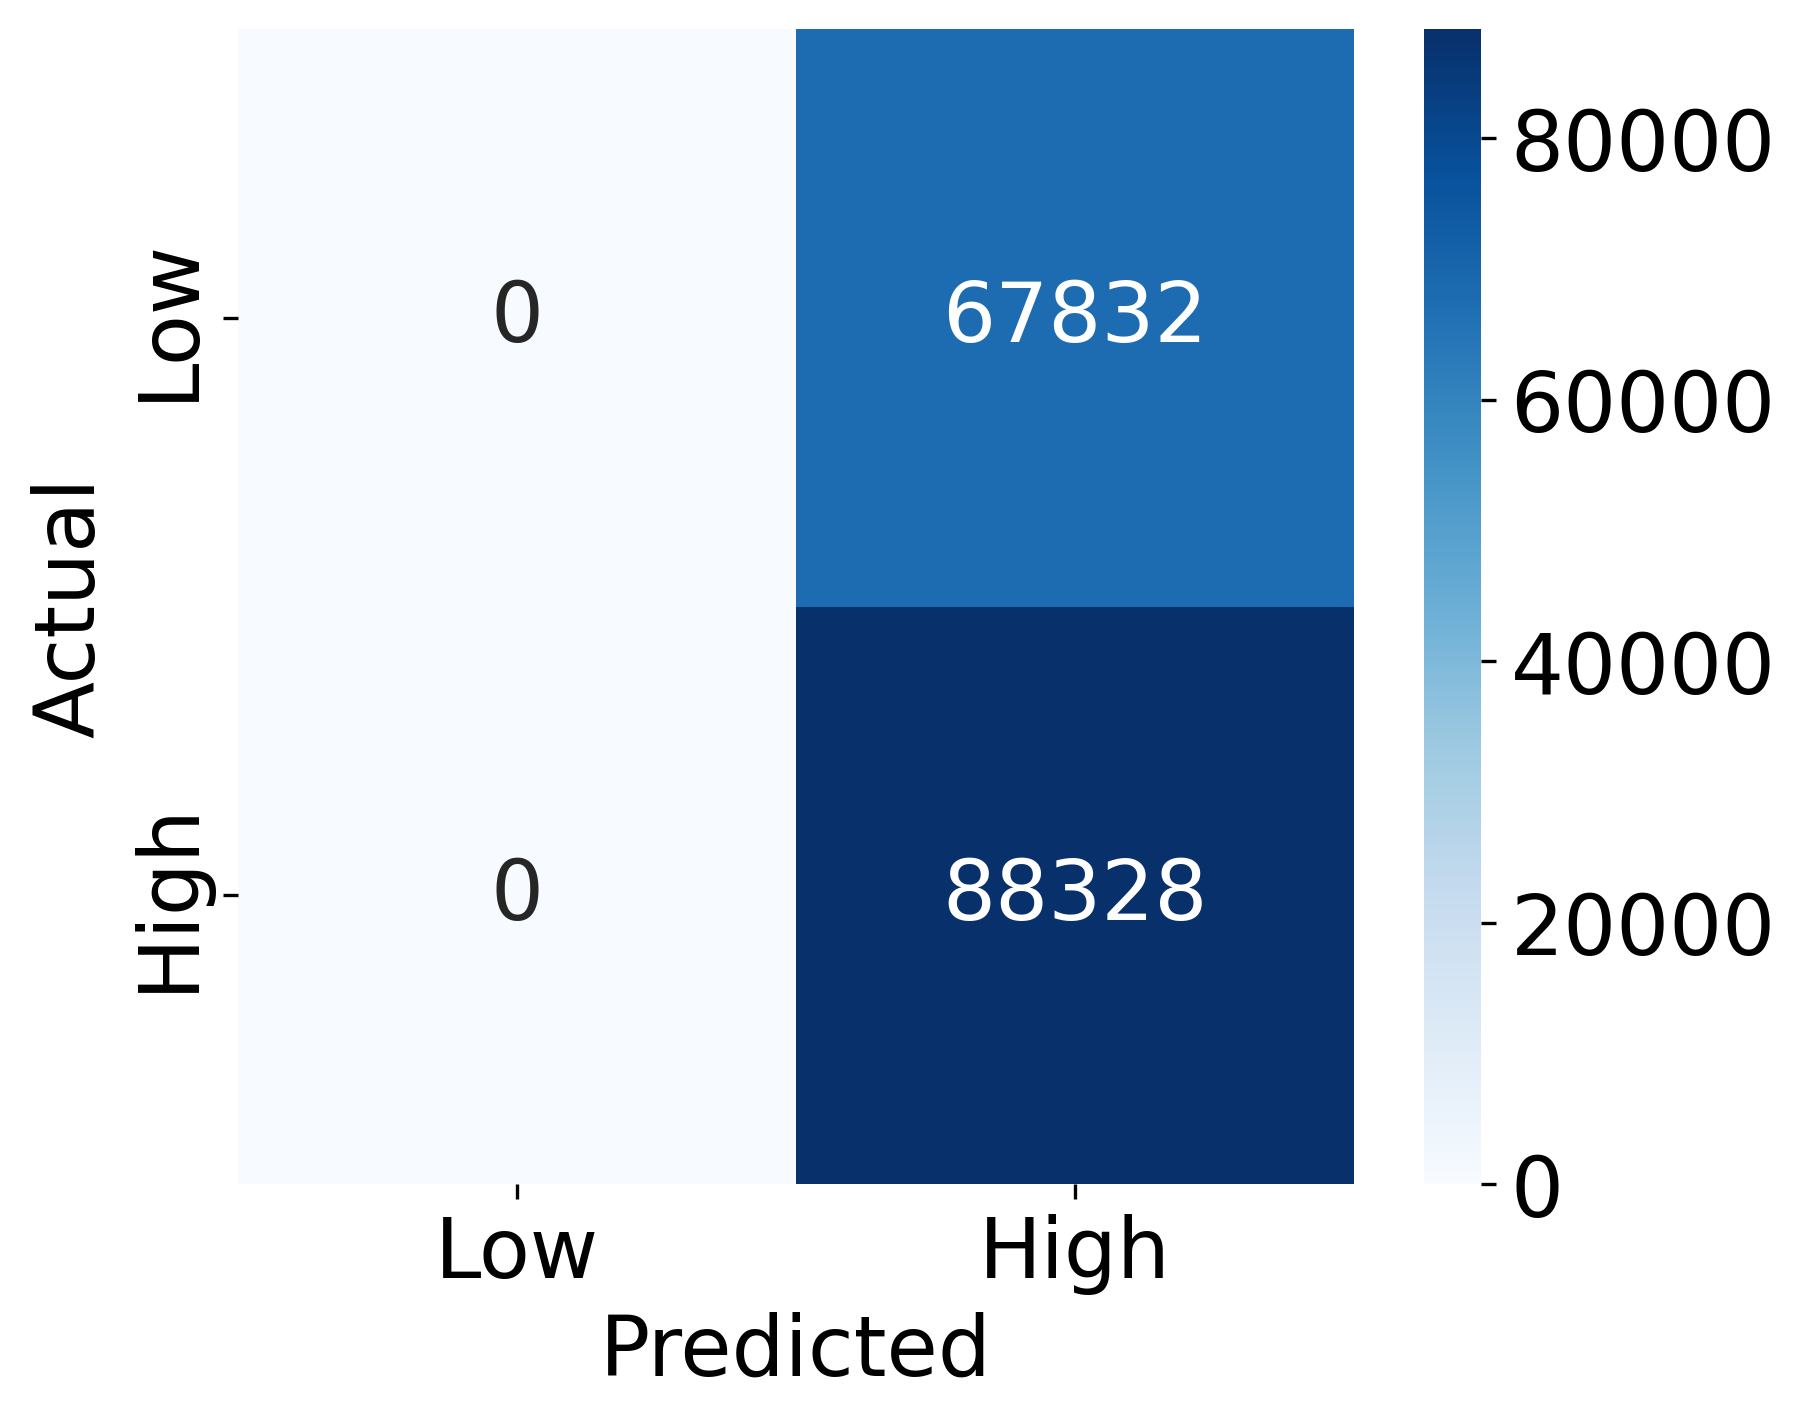

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_true and y_pred are already defined and possibly one-hot encoded
y_true = np.array(y_test)
y_pred = model.predict(x_test)

# If y_true or y_pred are one-hot encoded, flatten them
y_true = np.argmax(y_true, axis=1)  # Convert to label indices if one-hot encoded
y_pred = np.argmax(y_pred, axis=1)  # Convert to label indices if one-hot encoded

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix using Seaborn heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
# plt.title('Confusion Matrix')
plt.show()

4880/4880 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step


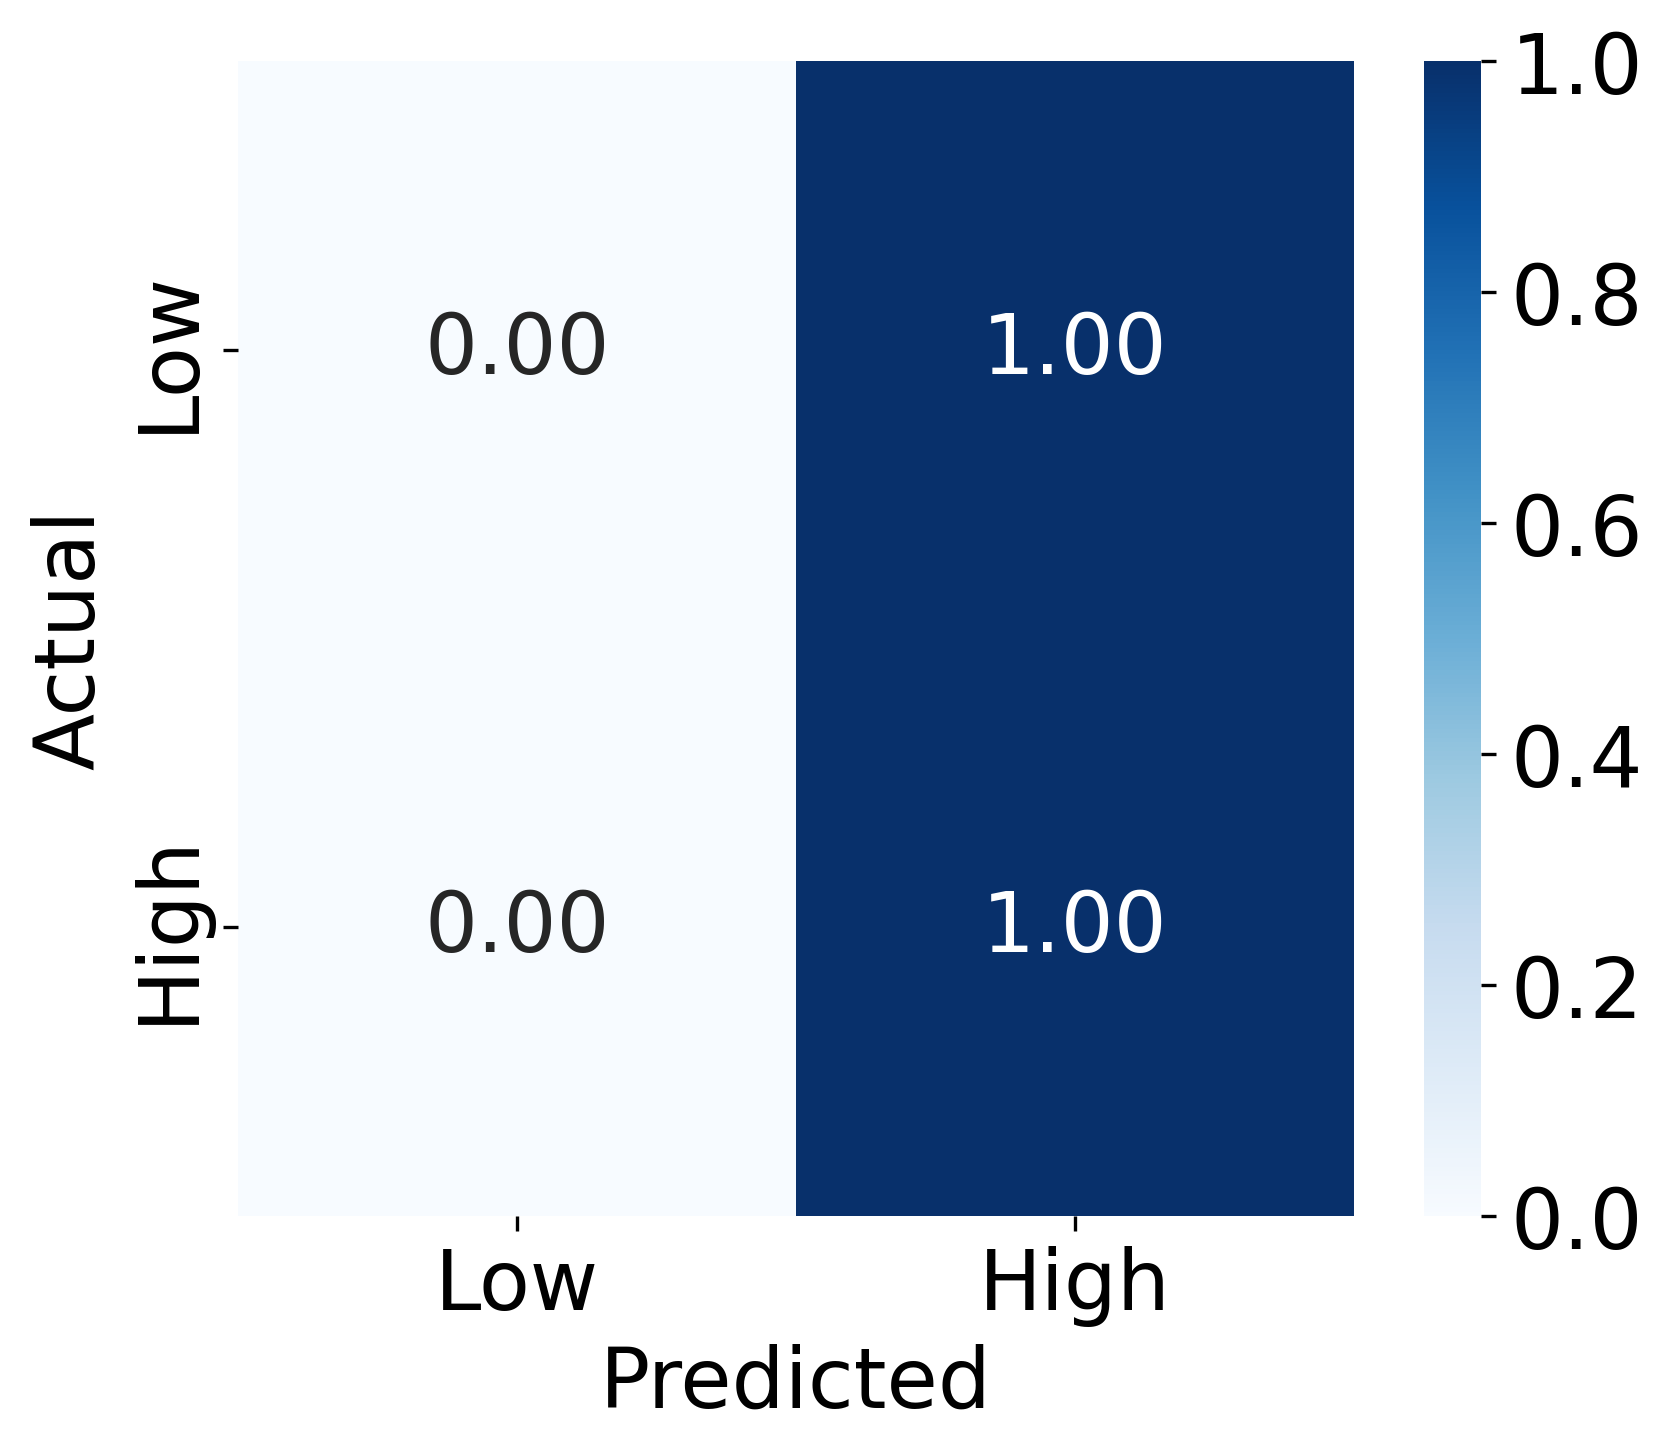

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_true and y_pred are already defined and possibly one-hot encoded
y_true = np.array(y_test)
y_pred = model.predict(x_test)

# If y_true or y_pred are one-hot encoded, flatten them
y_true = np.argmax(y_true, axis=1)  # Convert to label indices if one-hot encoded
y_pred = np.argmax(y_pred, axis=1)  # Convert to label indices if one-hot encoded

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot normalized confusion matrix using Seaborn heatmap
plt.figure(figsize=(6, 5))
ax = sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues',
                 xticklabels=['Low', 'High'],
                 yticklabels=['Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
#plt.title('Normalized Confusion Matrix')
plt.show()

## Proposed

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 200, 1)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_19 (Conv1D)        │ (None, 200, 32)        │            224 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_15    │ (None, 200, 32)        │            128 │ conv1d_19[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_8 (Activation) │ (None, 200, 32)        │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_20 (Conv1D)        │ (None, 200, 32)        │          6,176 │ activation_8[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_21 (Conv1D)        │ (None, 200, 32)        │             64 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_16    │ (None, 200, 32)        │            128 │ conv1d_20[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_4 (Add)               │ (None, 200, 32)        │              0 │ conv1d_21[0][0],       │
│                           │                        │                │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_9 (Activation) │ (None, 200, 32)        │              0 │ add_4[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_10          │ (None, 100, 32)        │              0 │ activation_9[0][0]     │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_22 (Conv1D)        │ (None, 100, 64)        │         12,352 │ max_pooling1d_10[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_17    │ (None, 100, 64)        │            256 │ conv1d_22[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_10             │ (None, 100, 64)        │              0 │ batch_normalization_1… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_23 (Conv1D)        │ (None, 100, 64)        │         24,640 │ activation_10[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_24 (Conv1D)        │ (None, 100, 64)        │          2,112 │ max_pooling1d_10[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_18    │ (None, 100, 64)        │            256 │ conv1d_23[0][0]        │
│ (BatchNormalization) 

 Total params: 1,232,546 (4.70 MB)

 Trainable params: 1,230,626 (4.69 MB)

 Non-trainable params: 1,920 (7.50 KB)

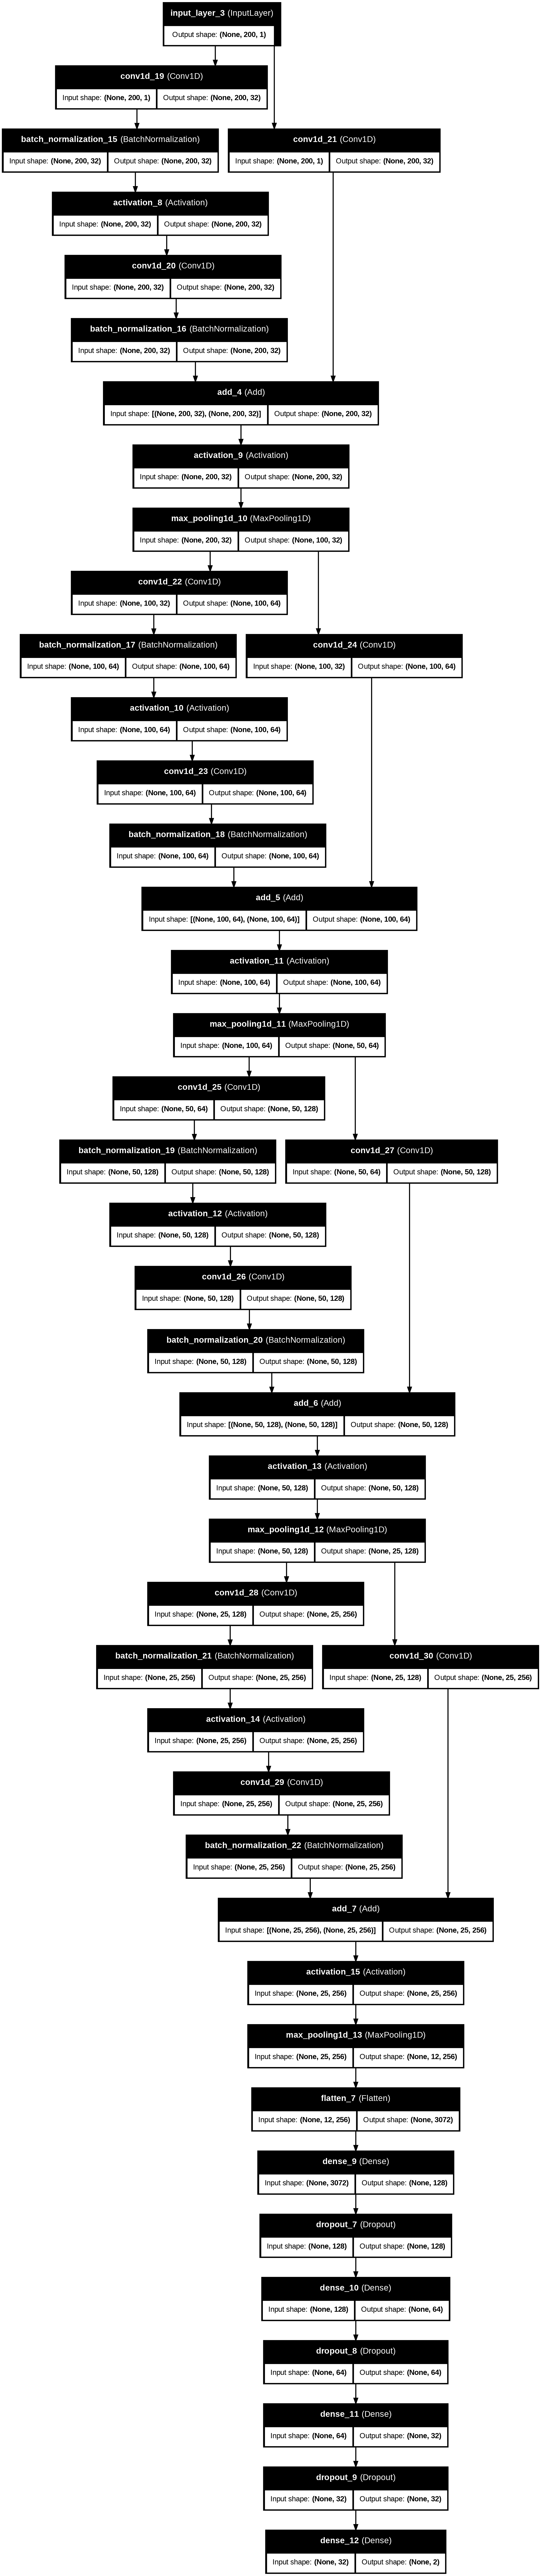

In [ ]:
from keras.layers import Input, Conv1D, BatchNormalization, MaxPooling1D, Flatten, Dense, Dropout, concatenate, Add, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import plot_model

# Input shape
input_shape = (X_train.shape[1], 1)

# Input layer
input_layer = Input(input_shape)

# Residual block function
def residual_block(x, filters, kernel_size, pool_size=2):
    shortcut = x
    conv = Conv1D(filters, kernel_size, padding='same', activation=None)(x)
    conv = BatchNormalization()(conv)
    conv = Activation('relu')(conv)
    conv = Conv1D(filters, kernel_size, padding='same', activation=None)(conv)
    conv = BatchNormalization()(conv)
    shortcut = Conv1D(filters, 1, padding='same', activation=None)(shortcut)  # Adjust dimensions
    x = Add()([shortcut, conv])
    x = Activation('relu')(x)
    x = MaxPooling1D(pool_size)(x)
    return x

# Build residual blocks
x = residual_block(input_layer, 32, 6)
x = residual_block(x, 64, 6)
x = residual_block(x, 128, 6)
x = residual_block(x, 256, 6)

# Global average pooling for better generalization
gap = Flatten()(x)

# Fully connected layers
dense1 = Dense(128, activation='relu')(gap)
drop1 = Dropout(0.25)(dense1)

dense2 = Dense(64, activation='relu')(drop1)
drop2 = Dropout(0.25)(dense2)

dense3 = Dense(32, activation='relu')(drop2)
drop3 = Dropout(0.25)(dense3)

# Output layer
output_layer = Dense(2, activation='softmax')(drop3)

# Build the model
model = Model(input_layer, output_layer)
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model summary
model.summary()

# Plot the model architecture
plot_model(model, to_file='enhanced_model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
from tensorflow import keras

# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# check points and early stopping
from keras.callbacks import ModelCheckpoint,EarlyStopping

model_name = "CNN"
filepath = "/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/Model/Test/Test/History/" + model_name + "weights-improvement-{epoch:02d}-{accuracy:.4f}.keras"
print(filepath)
checkpoint = ModelCheckpoint(filepath, monitor='accuracy', verbose=1, save_best_only=True, mode='max')
es = EarlyStopping(monitor='accuracy', mode='max', verbose=1, patience=10)
callbacks_list = [es, checkpoint]

/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/Model/Test/Test/History/CNNweights-improvement-{epoch:02d}-{accuracy:.4f}.keras


In [ ]:

# Train the model
H = model.fit(X_train, Y_train,
          batch_size=100,
          epochs=100,
          verbose=1,
          validation_data=(x_test, y_test),
          callbacks= callbacks_list)


Epoch 1/100
4685/4685 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6163 - loss: 0.6486
Epoch 1: accuracy improved from -inf to 0.65992, saving model to /content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/Model/Test/Test/History/CNNweights-improvement-01-0.6599.keras
4685/4685 ━━━━━━━━━━━━━━━━━━━━ 51s 8ms/step - accuracy: 0.6163 - loss: 0.6485 - val_accuracy: 0.7230 - val_loss: 0.5360
Epoch 2/100
4677/4685 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7279 - loss: 0.5246
Epoch 2: accuracy improved from 0.65992 to 0.74072, saving model to /content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/Model/Test/Test/History/CNNweights-improvement-02-0.7407.keras
4685/4685 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - accuracy: 0.7279 - loss: 0.5245 - val_accuracy: 0.7754 - val_loss: 0.4575
Epoch 3/100
4680/4685 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7861 - loss: 0.4399
Epoch 3: accuracy improved from 0.74072 to 0.79535, saving model to /content/drive

In [ ]:

from keras.models import save_model

model.save("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/Model/Test/Test/model.h5")


In [ ]:
from keras.models import load_model

model_loaded = load_model("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/Model/Test/Test/model.h5")

In [ ]:
from sklearn.metrics import accuracy_score

# Get model predictions
y_pred = model_loaded.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class predictions
y_true = np.argmax(y_test, axis=1)          # Convert one-hot encoded labels to class indices

# Compute accuracy for each class
class_accuracies = {}
for class_label in np.unique(y_true):
    indices = np.where(y_true == class_label)
    class_accuracy = accuracy_score(y_true[indices], y_pred_classes[indices])
    class_accuracies[class_label] = class_accuracy

# Print the test accuracies
for class_label, accuracy in class_accuracies.items():
    print(f'Test Accuracy for Class {class_label}: {accuracy * 100:.2f}%')

4880/4880 ━━━━━━━━━━━━━━━━━━━━ 81s 16ms/step
Test Accuracy for Class 0: 94.97%
Test Accuracy for Class 1: 97.40%


In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)

# Print the test accuracy
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

4880/4880 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9630 - loss: 0.1256
Test Accuracy: 96.35%


In [ ]:
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4880/4880 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9630 - loss: 0.1256
Test loss: 0.12484993785619736
Test accuracy: 0.9634669423103333


In [ ]:

import pickle

# Specify the correct file path
history_file_path = '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/Model/Test/Test/History/history.pkl'

# Save the model history to the file
with open(history_file_path, 'wb') as file_pi:
    pickle.dump(H, file_pi)


In [ ]:
import pickle

# Correct path with file name and extension
history_filepath = '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/Model/Test/Test/History/history.pkl'

# Load the history from the file
with open(history_filepath, 'rb') as file:
    load_history = pickle.load(file)

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 50 variables whereas the saved optimizer has 98 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


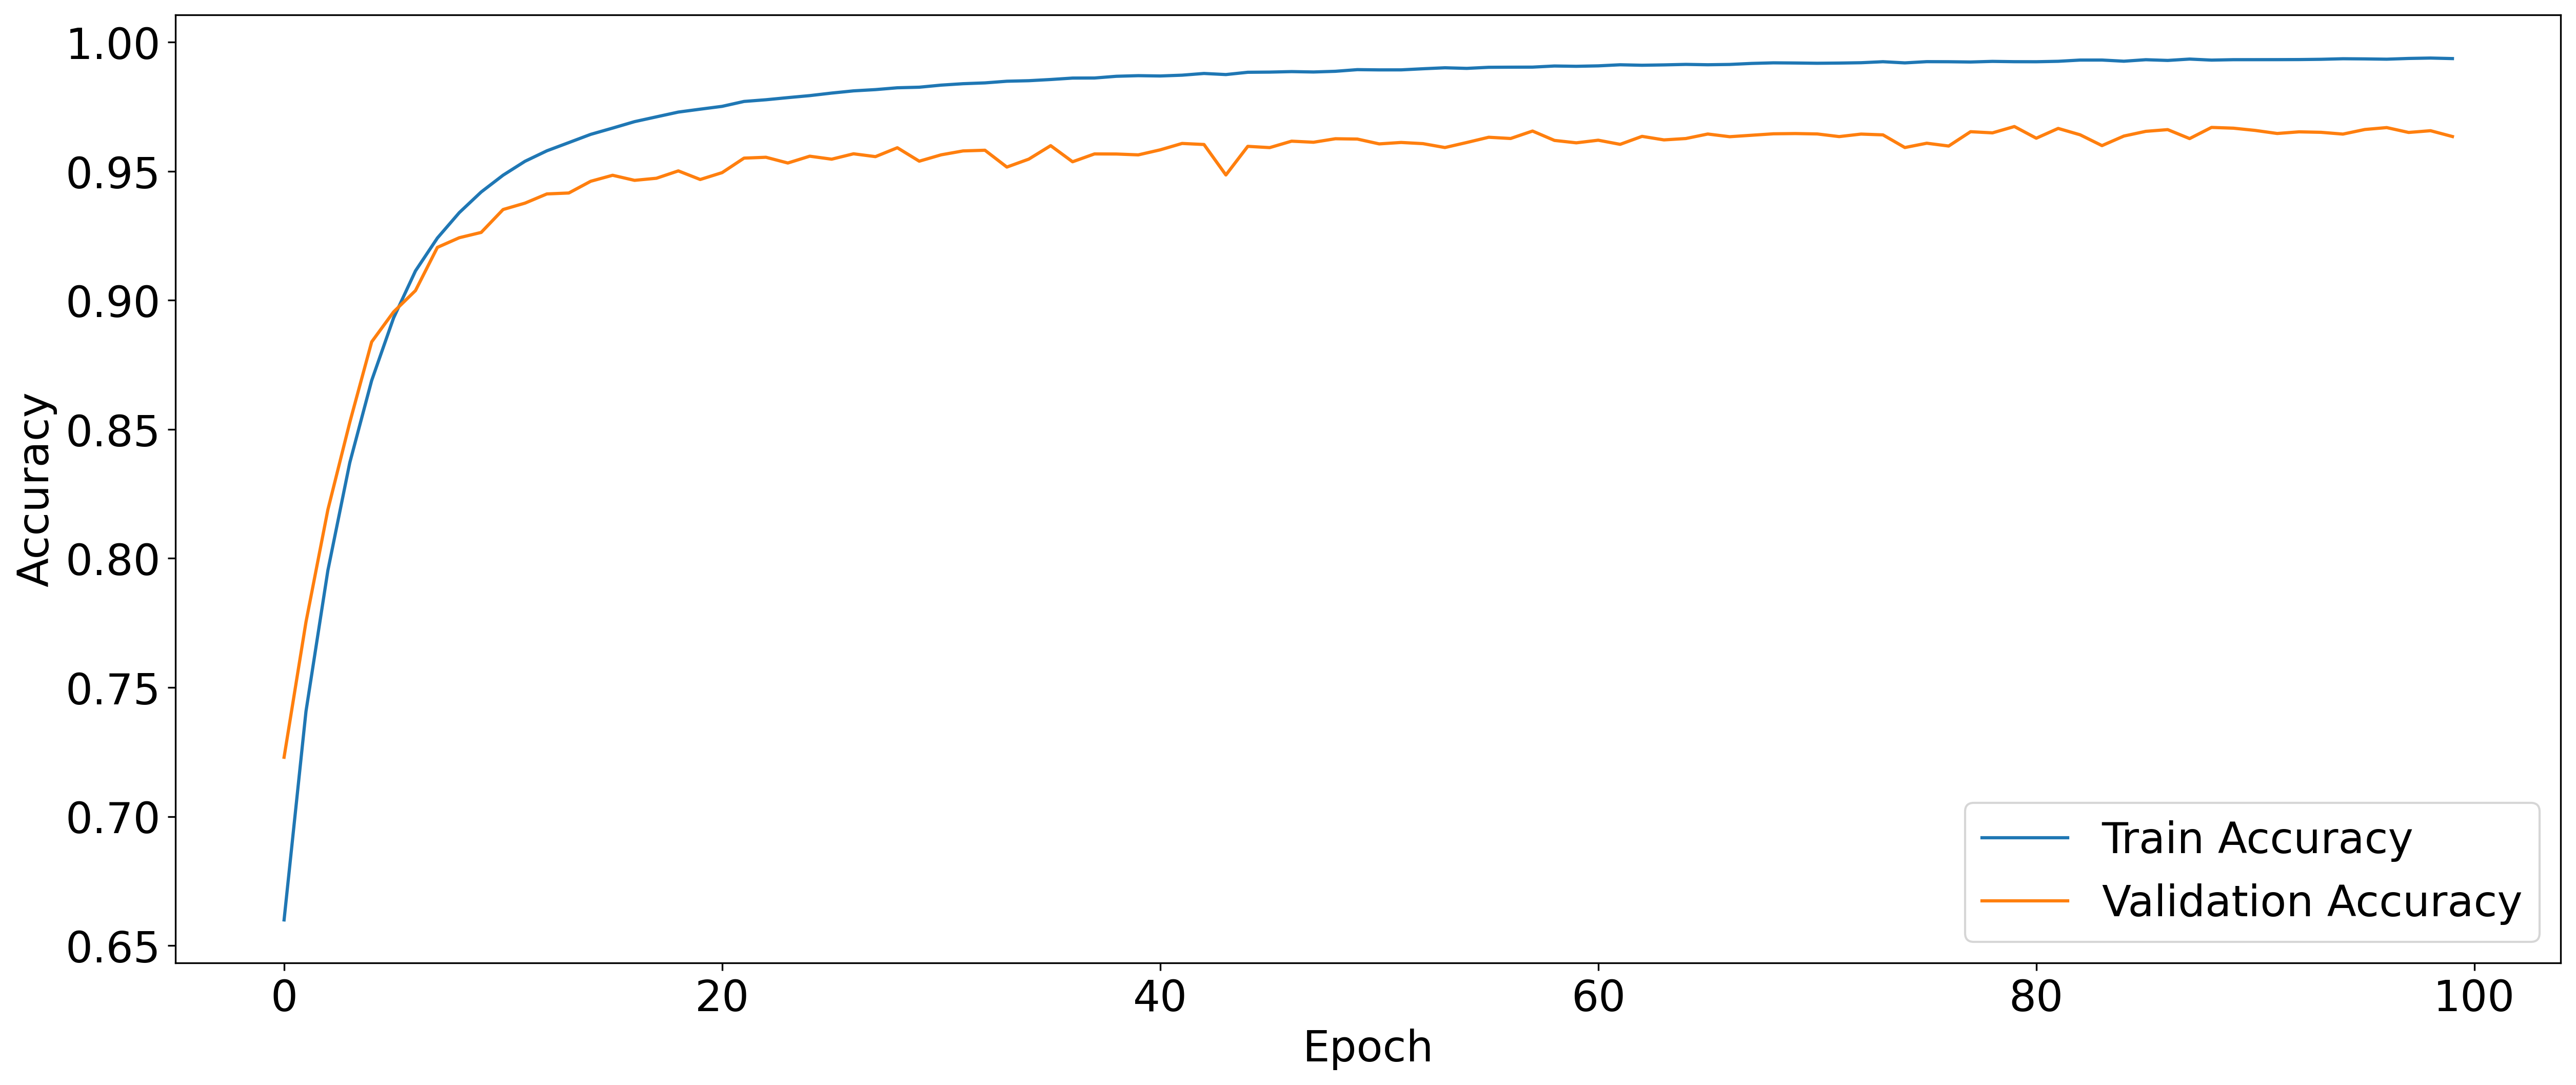

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20, 8)
plt.rcParams["font.size"] = 20

# Access accuracy and validation accuracy using the 'history' attribute
plt.plot(load_history.history['accuracy'], label='Train Accuracy')
plt.plot(load_history.history['val_accuracy'], label='Validation Accuracy')

#plt.title('CNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from keras.models import load_model

model_loaded = load_model("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/EEG-Brain/Model/Test/Test/model.h5")

In [ ]:
"""
import numpy as np
from sklearn.metrics import accuracy_score

# Define the number of bootstrap iterations
n_bootstraps = 1000
confidence_level = 0.95

# Create a function to calculate confidence intervals
def calculate_confidence_interval(data, confidence=0.95):
    lower_percentile = (1 - confidence) / 2 * 100
    upper_percentile = (1 + confidence) / 2 * 100
    lower_bound = np.percentile(data, lower_percentile)
    upper_bound = np.percentile(data, upper_percentile)
    return lower_bound, upper_bound

# Perform bootstrap
accuracies = []
for _ in range(n_bootstraps):
    # Resample with replacement from the test set
    indices = np.random.choice(range(len(x_test)), size=len(x_test), replace=True)
    x_resampled = x_test[indices]
    y_resampled = y_test[indices]

    # Make predictions on the resampled data
    predictions = model_loaded.predict(x_resampled)
    y_pred = np.argmax(predictions, axis=1)  # Convert to class labels if needed

    # Ensure y_resampled is also in label format (convert if necessary)
    if y_resampled.ndim > 1 and y_resampled.shape[1] > 1:  # If one-hot encoded
        y_resampled = np.argmax(y_resampled, axis=1)

    # Calculate accuracy
    acc = accuracy_score(y_resampled, y_pred)
    accuracies.append(acc)

# Calculate the confidence interval
lower, upper = calculate_confidence_interval(accuracies, confidence=confidence_level)
print(f"Confidence interval for accuracy: {lower:.4f} - {upper:.4f}")
"""

'\nimport numpy as np\nfrom sklearn.metrics import accuracy_score\n\n# Define the number of bootstrap iterations\nn_bootstraps = 1000\nconfidence_level = 0.95\n\n# Create a function to calculate confidence intervals\ndef calculate_confidence_interval(data, confidence=0.95):\n    lower_percentile = (1 - confidence) / 2 * 100\n    upper_percentile = (1 + confidence) / 2 * 100\n    lower_bound = np.percentile(data, lower_percentile)\n    upper_bound = np.percentile(data, upper_percentile)\n    return lower_bound, upper_bound\n\n# Perform bootstrap\naccuracies = []\nfor _ in range(n_bootstraps):\n    # Resample with replacement from the test set\n    indices = np.random.choice(range(len(x_test)), size=len(x_test), replace=True)\n    x_resampled = x_test[indices]\n    y_resampled = y_test[indices]\n    \n    # Make predictions on the resampled data\n    predictions = model_loaded.predict(x_resampled)\n    y_pred = np.argmax(predictions, axis=1)  # Convert to class labels if needed\n    \n  

In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Define the number of bootstrap iterations
n_bootstraps = 10
confidence_level = 0.95

# Function to calculate confidence intervals
def calculate_confidence_interval(data, confidence=0.95):
    lower_percentile = (1 - confidence) / 2 * 100
    upper_percentile = (1 + confidence) / 2 * 100
    lower_bound = np.percentile(data, lower_percentile)
    upper_bound = np.percentile(data, upper_percentile)
    return lower_bound, upper_bound

# Perform bootstrap
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for _ in range(n_bootstraps):
    # Resample with replacement from the test set
    indices = np.random.choice(range(len(x_test)), size=len(x_test), replace=True)
    x_resampled = x_test[indices]
    y_resampled = y_test[indices]

    # Make predictions on the resampled data
    predictions = model_loaded.predict(x_resampled)
    y_pred = np.argmax(predictions, axis=1)  # Convert to class labels if needed

    # Ensure y_resampled is also in label format (convert if necessary)
    if y_resampled.ndim > 1 and y_resampled.shape[1] > 1:  # If one-hot encoded
        y_resampled = np.argmax(y_resampled, axis=1)

    # Calculate metrics
    accuracy_scores.append(accuracy_score(y_resampled, y_pred))
    precision_scores.append(precision_score(y_resampled, y_pred, average='weighted'))
    recall_scores.append(recall_score(y_resampled, y_pred, average='weighted'))
    f1_scores.append(f1_score(y_resampled, y_pred, average='weighted'))

# Calculate confidence intervals
accuracy_ci = calculate_confidence_interval(accuracy_scores, confidence=confidence_level)
precision_ci = calculate_confidence_interval(precision_scores, confidence=confidence_level)
recall_ci = calculate_confidence_interval(recall_scores, confidence=confidence_level)
f1_ci = calculate_confidence_interval(f1_scores, confidence=confidence_level)

# Print results
print(f"Confidence interval for accuracy: {accuracy_ci[0]:.4f} - {accuracy_ci[1]:.4f}")
print(f"Confidence interval for precision: {precision_ci[0]:.4f} - {precision_ci[1]:.4f}")
print(f"Confidence interval for recall: {recall_ci[0]:.4f} - {recall_ci[1]:.4f}")
print(f"Confidence interval for F1 score: {f1_ci[0]:.4f} - {f1_ci[1]:.4f}")

4880/4880 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step
4880/4880 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step
4880/4880 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step
4880/4880 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step
4880/4880 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step
4880/4880 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step
4880/4880 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step
4880/4880 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step
4880/4880 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step
4880/4880 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step
Confidence interval for accuracy: 0.9629 - 0.9646
Confidence interval for precision: 0.9629 - 0.9646
Confidence interval for recall: 0.9629 - 0.9646
Confidence interval for F1 score: 0.9629 - 0.9645


In [ ]:
from keras.models import load_model

score = model_loaded.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4880/4880 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9630 - loss: 0.1256
Test loss: 0.12484993785619736
Test accuracy: 0.9634669423103333


In [ ]:
y_true = np.array(y_test)
y_pred = model_loaded.predict(x_test)

4880/4880 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


In [ ]:
y_pred = np.squeeze(y_pred)
y_pred = np.array(y_pred >= 0.5, dtype=int)  # Use 'int' instead of 'np.int'

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96     67832
           1       0.96      0.97      0.97     88328

   micro avg       0.96      0.96      0.96    156160
   macro avg       0.96      0.96      0.96    156160
weighted avg       0.96      0.96      0.96    156160
 samples avg       0.96      0.96      0.96    156160



4880/4880 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step


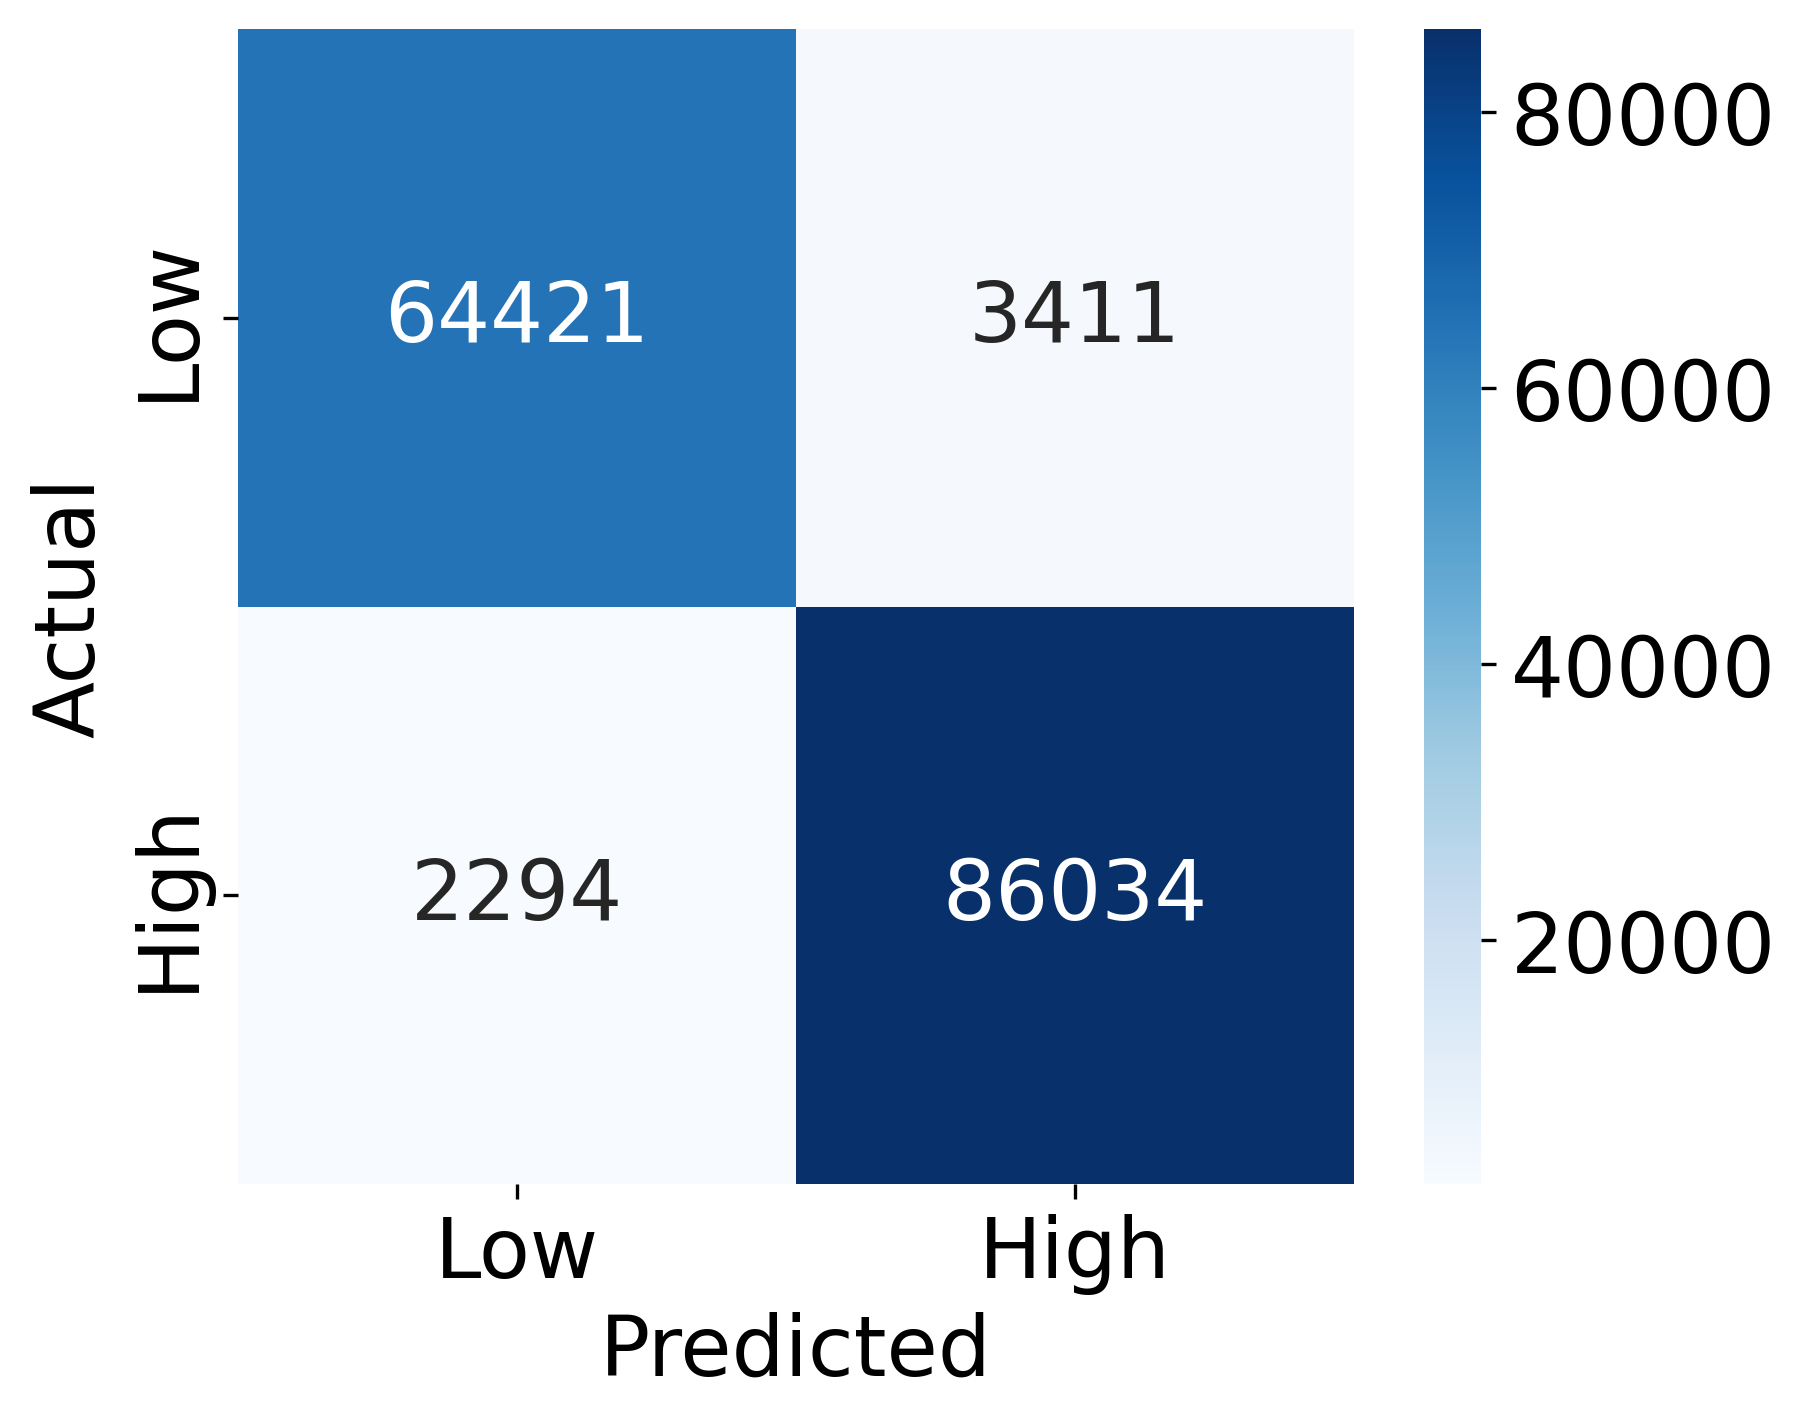

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_true and y_pred are already defined and possibly one-hot encoded
y_true = np.array(y_test)
y_pred = model_loaded.predict(x_test)

# If y_true or y_pred are one-hot encoded, flatten them
y_true = np.argmax(y_true, axis=1)  # Convert to label indices if one-hot encoded
y_pred = np.argmax(y_pred, axis=1)  # Convert to label indices if one-hot encoded

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix using Seaborn heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
# plt.title('Confusion Matrix')
plt.show()

4880/4880 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step


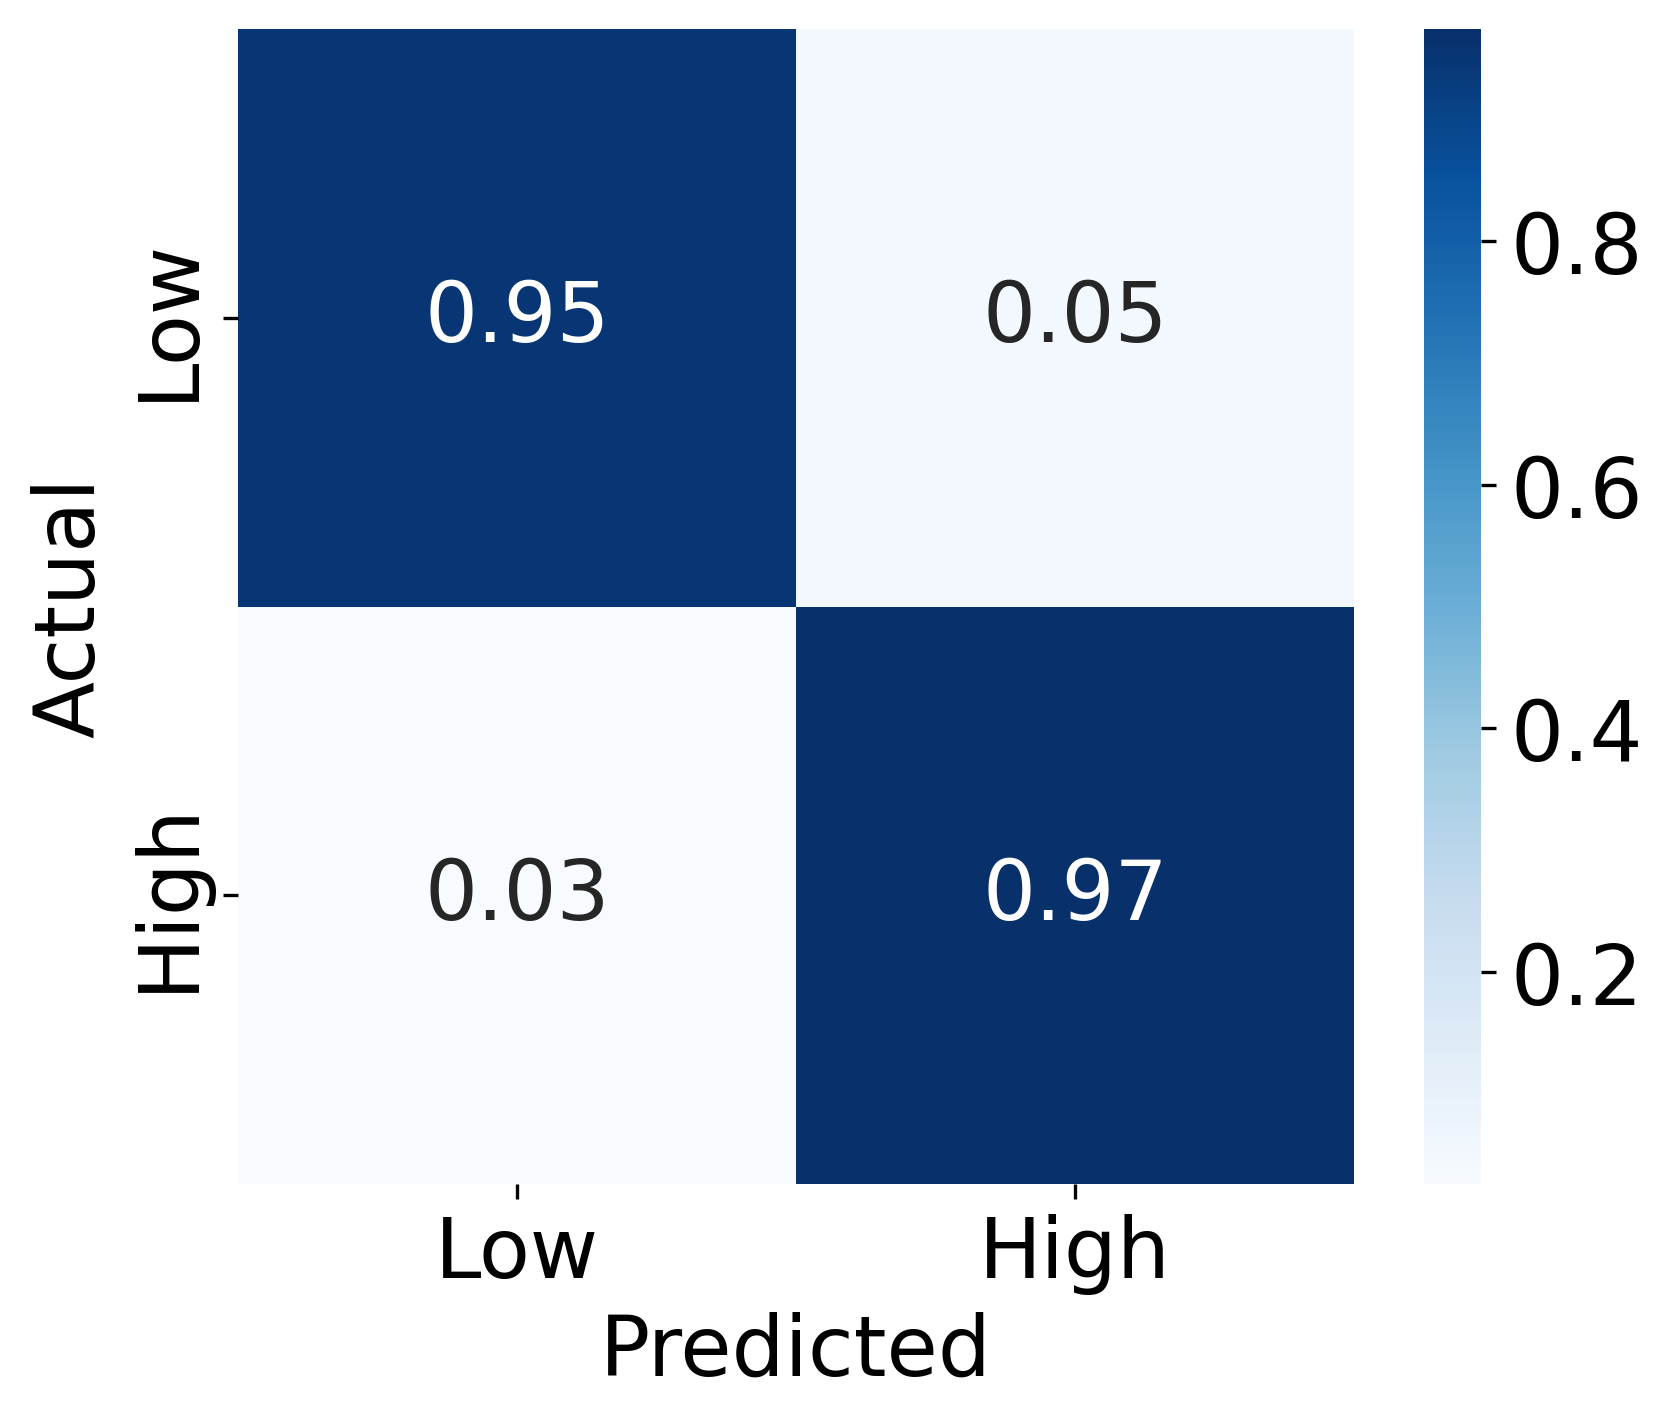

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_true and y_pred are already defined and possibly one-hot encoded
y_true = np.array(y_test)
y_pred = model_loaded.predict(x_test)

# If y_true or y_pred are one-hot encoded, flatten them
y_true = np.argmax(y_true, axis=1)  # Convert to label indices if one-hot encoded
y_pred = np.argmax(y_pred, axis=1)  # Convert to label indices if one-hot encoded

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot normalized confusion matrix using Seaborn heatmap
plt.figure(figsize=(6, 5))
ax = sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues',
                 xticklabels=['Low', 'High'],
                 yticklabels=['Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
#plt.title('Normalized Confusion Matrix')
plt.show()